# Introduction - Goals & Objective

Briefing:  https://docs.google.com/document/d/1qeFNL-lqe54XxJoNIzDXQ3zg2lovyZYwv0Q3bY6-p24/preview



Reference:

- Insight Business:
  - look at the: Revised Goals Projek & Objective Projek
- Data Visualization:
  - https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/

## Introduction

Projek ini adalah tugas dari materi Data Wrangling and SQL Pacmann AI batch 14. Pada projek ini akan dilakukan eksplorasi dan pengolahan data, kemudian analisa data. Dataset yang digunakan dalam projek kali ini berasal dari Kaggle oleh OLIST dengan judul: Brazilian E-Commerce Public Dataset by Olist.

Link dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


## Goals Projek & Objective Projek

Goals dalam projek ini ada tiga, yaitu:
1. Analisis Annual and Monthly Revenue dan Order
- Objective: Analisis Total Revenue dan total order yang telah dilakukan setiap tahun dan bulan. Selain itu juga dilihat total revenue dan total order berdasarkan order status, payment type, top 5 city dan top 5 product category
2. Analisis Annual and Monthly Customer Activity
- Objective: Analisis rata-rata customer yang aktif, customer baru, customer repeat order dan rata-rata customer order tiap bulan dan tiap tahun.
3. Perbandingan Revenue dari Customer Baru dan Customer Repeat Order
- Objective: Membandingkan Revenue dari Customer Baru dan Customer Repeat Order

<!--
https://www.pipedrive.com/en/blog/sales-data

=> Analisis sales growth and customer growth

→ sales revenue
https://www.leadsquared.com/learn/sales/sales-growth/

  - Revenue & order tiap bulan-tahun & tiap tahun
  - jangan lupa cari pct of change nya untuk tahu growth nya

→ Annual Customer Activity Growth Analysis
https://www.everafter.ai/glossary/customer-growth-rate
- Jadi bandingin monthly active user (MAU), new customer, repeating customer dan average order per customer di tiap bulan-tahun
- Bandingin rata-rata monthly active user & new customer
Lihat repeating order nya
- Table: Customer, orders

  → Lihat user growth nya tiap tahun (setiap state dan top 5 city)
  - Table: customers, orders, order_payments


→ Ratio of sales made to new vs existing customer
- https://stackoverflow.com/questions/57823209/calculate-recurring-customer
- https://www.datacamp.com/tutorial/customer-life-time-value

  →  Customer lifetime value
  - https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#:~:text=Customer%20Lifetime%20Value%20%3D%20(Customer%20Value,purchases%20to%20determine%20customer%20value. -->

# Initialization

## Mount Drive

In [ ]:
# Mounting Google Drive
# Untuk bisa membaca file di google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
# Import Libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Read CSV files

In [ ]:
# Read All Dataset
customer = pd.read_csv('customers_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
product = pd.read_csv('product_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')

#### customers

In [ ]:
# Lihat data
customer.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
# Lihat data type dan missing values
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### geolocation

In [ ]:
# Lihat data
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
# Lihat data type dan missing values
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### order_items

In [ ]:
# Lihat data
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
# Lihat data type dan missing values
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### order_payments

In [ ]:
# Lihat data
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
# Lihat data type dan missing values
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### order_reviews

In [ ]:
# Lihat data
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
# Lihat data type dan missing values
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### orders

In [ ]:
# Lihat data
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
# Lihat data type dan missing values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### product

In [ ]:
# Lihat data
product.head()

no                        product_id product_category_name  \
0   0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery   
1   1  3aa071139cb16b67ca9e5dea641aaa2f                   art   
2   2  96bd76ec8810374ed1b65e291975717f        sports_leisure   
3   3  cef67bcfe19066a932b7673e239eb23d                  baby   
4   4  9dc1a7de274444849c219cff195d0b71            housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
# Lihat data type dan missing values
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no                          32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [ ]:
# product[['product_category_name']] = product[['product_category_name']].fillna(value='null')

# prod_col_name = ['product_name_lenght', 'product_description_lenght',
#                  'product_photos_qty', 'product_weight_g', 'product_length_cm',
#                  'product_height_cm', 'product_width_cm']
# product[prod_col_name] = product[prod_col_name].fillna(value=0)

#### sellers

In [ ]:
# Lihat data
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
# Lihat data type dan missing values
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## Sqlite initialization

In [ ]:
# membuat sql connection ke database
conn = sqlite3.connect("/content/drive/MyDrive/project/database_olist.db")
c = conn.cursor()

## Insert data

In [ ]:
# Insert data customer to table customer
customer.to_sql('customer', conn, if_exists='append', index = False)

99441

In [ ]:
# Insert data order_items to table order_items
order_items.to_sql('order_items', conn, if_exists='append', index = False)

112650

In [ ]:
# Insert data order_payments to table order_payments
order_payments.to_sql('order_payments', conn, if_exists='append', index = False)

103886

In [ ]:
# Insert data order_reviews to table order_reviews
order_reviews.to_sql('order_reviews', conn, if_exists='append', index = False)

99224

In [ ]:
# Insert data orders to table orders
orders.to_sql('orders', conn, if_exists='append', index = False)

99441

In [ ]:
# Insert data product to table product
product.to_sql('product', conn, if_exists='append', index = False)

32951

In [ ]:
# Insert data sellers to table sellers
sellers.to_sql('sellers', conn, if_exists='append', index = False)

3095

In [ ]:
# Insert data geolocation to table geolocation
geolocation.to_sql('geolocation', conn, if_exists='append', index = False)

1000163

## Query Test

In [ ]:
# customer table
query_customer = pd.read_sql_query('''
                          select * from orders limit 5;
                          ''',
                          conn)
example1 = pd.DataFrame(query_customer)
example1


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

# Data Wrangling

(Joining or Combining dataset)

## Join data that has product and price product

In [ ]:
# Query data yang diperlukan
query_data_ord_prod = pd.read_sql_query(
                          '''
                          SELECT
                            o.order_id as order_id,
                            o.customer_id as customer_id,
                            o.order_status as order_status,
                            order_purchase_timestamp,
                            order_approved_at,
                            order_delivered_carrier_date,
                            order_delivered_customer_date,
                            order_estimated_delivery_date,
                            oi.order_item_id,
                            oi.product_id,
                            oi.price,
                            prod.product_category_name,
                            op.payment_sequential,
                            op.payment_type,
                            op.payment_installments,
                            op.payment_value,
                            c.customer_unique_id,
                            c.customer_zip_code_prefix,
                            c.customer_city,
                            c.customer_state
                          FROM orders as o
                          LEFT JOIN order_items as oi
                          ON o.order_id = oi.order_id
                          LEFT JOIN product as prod
                          ON oi.product_id = prod.product_id
                          LEFT JOIN order_payments as op
                          ON o.order_id = op.order_id
                          LEFT JOIN customer as c
                          ON o.customer_id = c.customer_id;
                          ''',
                          conn)
data_ord_prod = pd.DataFrame(query_data_ord_prod)
data_ord_prod.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00            1.0   
1           2017-10-18 00:00:00            1.0   
2           2017-10-18 00:00:00            1.0   
3           2018-08-13 00:00:00            1.0   
4           2018-09-04 00:00:00            1.0   

                         product_id   price product_category_name  \
0  87285b34884572647811a353c7ac498a   29.99            housewares   
1  87285b34884572647811a353c7ac498a   29.99            housewares   
2  87285b34884572647811a353c7ac498a   29.99            housewares   
3  595fac2a385ac33a80bd5114aec74eb8  118.70             perfumery   
4  aa4383b373c6aca5d8797843e5594415  159.90                  auto   

   payment_sequential payment_type  payment_installments  payment_value  \
0                 1.0  credit_card                   1.0          18.12   
1                 2.0      voucher                   1.0          18.59   
2                 3.0      voucher                   1.0           2.00   
3                 1.0       boleto                   1.0         141.46   
4                 1.0  credit_card                   3.0         179.12   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813     barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265    vianopolis   

  customer_state  
0             SP  
1             SP  
2             SP  
3             BA  
4             GO

In [ ]:
# Lihat tipe data dan missing values
data_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  price                          117604 non-null  float64
 11  product_category_name          115906 non-null  object 
 12  payment_sequential            

## Save data_combined & data_ord_prod to csv

In [ ]:
# save data_ord_prod ke csv
data_ord_prod.to_csv('data_ord_prod.csv')

In [ ]:
# Read data_ord_prod.csv
df_ord_prod = pd.read_csv('data_ord_prod.csv')
df_ord_prod.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2017-10-02 11:07:15          2017-10-04 19:55:00   
2  2017-10-02 11:07:15          2017-10-04 19:55:00   
3  2018-07-26 03:24:27          2018-07-26 14:31:00   
4  2018-08-08 08:55:23          2018-08-08 13:50:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
1           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
2           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
3           2018-08-07 15:27:45           2018-08-13 00:00:00            1.0   
4           2018-08-17 18:06:29           2018-09-04 00:00:00            1.0   

   ...   price  product_category_name payment_sequential  payment_type  \
0  ...   29.99             housewares                1.0   credit_card   
1  ...   29.99             housewares                2.0       voucher   
2  ...   29.99             housewares                3.0       voucher   
3  ...  118.70              perfumery                1.0        boleto   
4  ...  159.90                   auto                1.0   credit_card   

  payment_installments  payment_value                customer_unique_id  \
0                  1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                  1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                  1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                  1.0         141.46  af07308b275d755c9edb36a90c618231   
4                  3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

  customer_zip_code_prefix  customer_city customer_state  
0                     3149      sao paulo             SP  
1                     3149      sao paulo             SP  
2                     3149      sao paulo             SP  
3                    47813      barreiras             BA  
4                    75265     vianopolis             GO  

[5 rows x 21 columns]

In [ ]:
# Close connection dan cursor
conn.close()
# c.close()

## Check Data Joined

In [ ]:
# Check di df_ord_prod ada berapa order_id
df_ord_prod['order_id'].nunique()

99441

# Data Understanding

## Data Type and Missing Values

In [ ]:
# Melihat data type dan missing values secara sekilas
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     118434 non-null  int64  
 1   order_id                       118434 non-null  object 
 2   customer_id                    118434 non-null  object 
 3   order_status                   118434 non-null  object 
 4   order_purchase_timestamp       118434 non-null  object 
 5   order_approved_at              118258 non-null  object 
 6   order_delivered_carrier_date   116360 non-null  object 
 7   order_delivered_customer_date  115037 non-null  object 
 8   order_estimated_delivery_date  118434 non-null  object 
 9   order_item_id                  117604 non-null  float64
 10  product_id                     117604 non-null  object 
 11  price                          117604 non-null  float64
 12  product_category_name         

In [ ]:
# Persentase missing value pada tiap kolom
df_ord_prod.isnull().sum().sort_values(ascending=False)/len(df_ord_prod)*100

order_delivered_customer_date    2.868264
product_category_name            2.134522
order_delivered_carrier_date     1.751186
product_id                       0.700812
order_item_id                    0.700812
price                            0.700812
order_approved_at                0.148606
payment_type                     0.002533
payment_value                    0.002533
payment_installments             0.002533
payment_sequential               0.002533
customer_city                    0.000000
customer_zip_code_prefix         0.000000
customer_unique_id               0.000000
Unnamed: 0                       0.000000
order_id                         0.000000
order_estimated_delivery_date    0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
customer_state                   0.000000
dtype: float64

In [ ]:
# Mengecek missing values pada kolom 'product_category_name'
df_ord_prod[df_ord_prod['product_category_name'].isnull()].sample(10)

Unnamed: 0                          order_id  \
34880        34880  b533dea24ada4dc5c1a9041d25d7c812   
33682        33682  22474d84064cd7eb4a907ba3fd8a6398   
81663        81663  1768e7971ac449abce2917f608c8a69f   
90301        90301  23e9d59ee7ad86ca85f8fc571420345e   
9806          9806  672ab3776d5b25e586521469609ae774   
15204        15204  90e258ad907d8401c4f1107ea9e55f1b   
97193        97193  18b9bf2dbee620dc2f5b9d4a747c2819   
79478        79478  3257d333ee8b3f21786b6270940d1fd4   
115686      115686  ac2dcc9201c601c1030aa6daa7337f95   
27050        27050  b516594d49d0cab100b01fd7bc0b981f   

                             customer_id order_status  \
34880   3a4ccb2c6fb972d301b8f9edfbf81fbd    delivered   
33682   85f03d59e05ad20dc077b89342b9f710    delivered   
81663   989b74c3570c64316628830fe692dc3a  unavailable   
90301   73a19b7529a6ba668ac8926f83450270    delivered   
9806    8c8b3a28c07f67148f86f297604b9875     canceled   
15204   358a7b26ad67e3a183c191ed367e64b3  unavailable   
97193   4503c41733789f4f0af38507c43a0e75    delivered   
79478   cd8aebe5962e539f7dd48e3587e3cd77  unavailable   
115686  964a1b658f1aff1ca42fc6adbec6a304    delivered   
27050   88977a0c1c4b9ee4ca5d6f12df4107ac    delivered   

       order_purchase_timestamp    order_approved_at  \
34880       2016-10-08 21:12:48  2016-10-11 04:56:40   
33682       2017-01-25 09:09:46  2017-01-25 09:22:26   
81663       2017-03-15 13:20:25  2017-03-15 13:20:25   
90301       2018-01-02 15:05:15  2018-01-02 15:13:32   
9806        2017-05-10 11:52:51                  NaN   
15204       2017-09-25 16:03:27  2017-09-25 16:15:19   
97193       2017-11-20 10:59:08  2017-11-20 11:27:19   
79478       2017-02-13 17:18:58  2017-02-15 02:50:25   
115686      2018-01-17 14:14:21  2018-01-17 14:29:53   
27050       2018-01-08 21:44:26  2018-01-10 10:32:47   

       order_delivered_carrier_date order_delivered_customer_date  \
34880           2016-10-21 12:37:01           2016-10-28 16:31:34   
33682           2017-01-31 10:18:50           2017-02-02 16:56:10   
81663                           NaN                           NaN   
90301           2018-01-08 21:47:00           2018-01-15 13:24:17   
9806                            NaN                           NaN   
15204                           NaN                           NaN   
97193           2017-11-22 21:33:06           2017-12-27 16:53:32   
79478                           NaN                           NaN   
115686          2018-01-18 20:12:41           2018-01-23 22:59:28   
27050           2018-01-11 23:23:38           2018-01-19 00:54:00   

       order_estimated_delivery_date  order_item_id  ...   price  \
34880            2016-12-02 00:00:00            1.0  ...   15.90   
33682            2017-03-02 00:00:00            1.0  ...  279.90   
81663            2017-04-12 00:00:00            NaN  ...     NaN   
90301            2018-01-29 00:00:00            1.0  ...  122.99   
9806             2017-05-26 00:00:00            NaN  ...     NaN   
15204            2017-10-31 00:00:00            NaN  ...     NaN   
97193            2017-12-12 00:00:00            1.0  ...   15.00   
79478            2017-03-14 00:00:00            NaN  ...     NaN   
115686           2018-02-19 00:00:00            2.0  ...  122.99   
27050            2018-02-06 00:00:00            1.0  ...  157.77   

        product_category_name payment_sequential  payment_type  \
34880                     NaN                1.0        boleto   
33682                     NaN                1.0   credit_card   
81663                     NaN                1.0   credit_card   
90301                     NaN                1.0   credit_card   
9806                      NaN                1.0        boleto   
15204                     NaN                1.0   credit_card   
97193                     NaN                1.0   credit_card   
79478                     NaN                1.0        boleto   
115686                    NaN              

In [ ]:
# Mengecek missing values pada data
sample_prod_null = df_ord_prod[df_ord_prod['product_category_name'].isnull()]
print('Total rows that has null product cat name: ', sample_prod_null.shape[0])
print('Total order_id that has null product cat name: ', sample_prod_null['order_id'].nunique())
print('Total order_id: ', df_ord_prod['order_id'].nunique())

Total rows that has null product cat name:  2528
Total order_id that has null product cat name:  2226
Total order_id:  99441


## Statistical Summary of Data

### Numerical Columns

In [ ]:
# Numeric colomn
df_ord_prod.describe()

Unnamed: 0  order_item_id          price  payment_sequential  \
count  118434.000000  117604.000000  117604.000000       118431.000000   
mean    59216.500000       1.195920     120.822849            1.094207   
std     34189.095228       0.697721     184.477367            0.728290   
min         0.000000       1.000000       0.850000            1.000000   
25%     29608.250000       1.000000      39.900000            1.000000   
50%     59216.500000       1.000000      74.900000            1.000000   
75%     88824.750000       1.000000     134.900000            1.000000   
max    118433.000000      21.000000    6735.000000           29.000000   

       payment_installments  payment_value  customer_zip_code_prefix  
count         118431.000000  118431.000000             118434.000000  
mean               2.937398     172.849395              35034.264392  
std                2.774164     268.259831              29819.290218  
min                0.000000       0.000000               1003.000000  
25%                1.000000      60.860000              11310.000000  
50%                2.000000     108.200000              24240.000000  
75%                4.000000     189.245000              58464.500000  
max               24.000000   13664.080000              99990.000000

### Categorical columns

In [ ]:
# Object Columns
df_ord_prod.describe(include='object')

order_id                       customer_id  \
count                             118434                            118434   
unique                             99441                             99441   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   

       order_status order_purchase_timestamp    order_approved_at  \
count        118434                   118434               118258   
unique            8                    98875                90733   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115038                       63                   63   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        116360                        115037   
unique                        81018                         95664   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   

       order_estimated_delivery_date                        product_id  \
count                         118434                            117604   
unique                           459                             32951   
top              2017-12-20 00:00:00  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                             656                               536   

       product_category_name payment_type                customer_unique_id  \
count                 115906       118431                            118434   
unique                    73            5                             96096   
top           bed_bath_table  credit_card  9a736b248f67d166d2fbb006bcb877c3   
freq                   11823        87286                                75   

       customer_city customer_state  
count         118434         118434  
unique          4119             27  
top        sao paulo             SP  
freq           18738          49967

## Pengecekan Outlier


<Axes: >

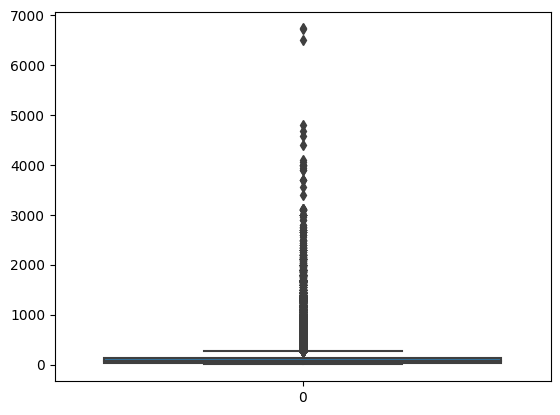

In [ ]:
# Visualisasi outlier kolom price
sns.boxplot(df_ord_prod['price'])

<Axes: >

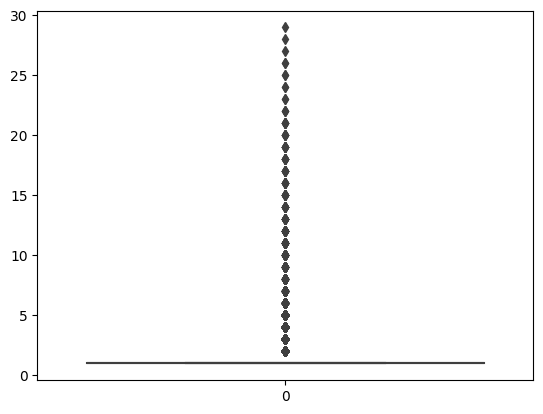

In [ ]:
# Visualisasi outlier kolom payment_sequential
sns.boxplot(df_ord_prod['payment_sequential'])

<Axes: >

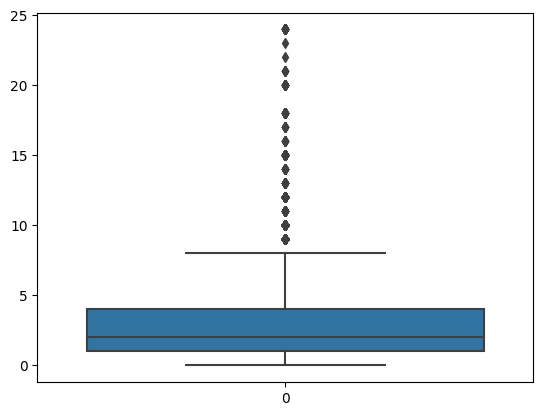

In [ ]:
# Visualisasi outlier kolom payment_installments
sns.boxplot(df_ord_prod['payment_installments'])

<Axes: >

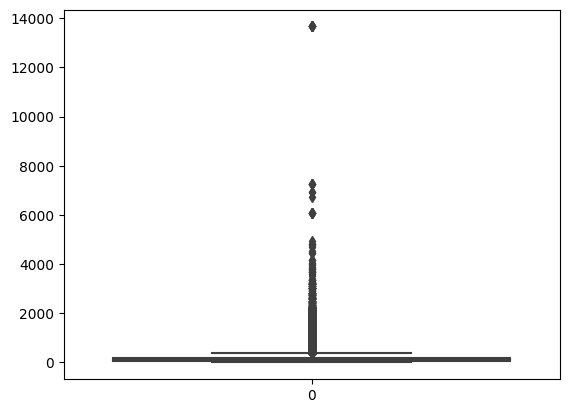

In [ ]:
# Visualisasi outlier kolom payment_value
sns.boxplot(df_ord_prod['payment_value'])

## Pengecekan Data Duplikat


In [ ]:
# Mengecek data duplicate
df_ord_prod[df_ord_prod.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, price, product_category_name, payment_sequential, payment_type, payment_installments, payment_value, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

[0 rows x 21 columns]

Tidak ada data duplicate

## Got Deeper - Pengecekan Values pada kolom

### Lihat data pada payment_value dengan value 0, price <= 1 dan payment_installments = 0

In [ ]:
df_ord_prod[df_ord_prod['payment_value'] == 0]

Unnamed: 0                          order_id  \
503            503  45ed6e85398a87c253db47c2d9f48216   
1352          1352  00b1cb0320190ca0daa2c88b35206009   
30879        30879  fa65dad1b0e818e3ccc5cb0e39231352   
30880        30880  fa65dad1b0e818e3ccc5cb0e39231352   
38541        38541  6ccb433e00daae1283ccc956189c82ae   
47586        47586  4637ca194b6387e2d538dc89b124b0ee   
47962        47962  c8c528189310eaa44a745b8d9d26908b   
102033      102033  b23878b3e8eb4d25a158f57d96331b18   
115451      115451  8bcbe01d44d147f901cd3192671144db   

                             customer_id order_status  \
503     8eab8f9b3c744b76b65f7a2c0c8f2d6c    delivered   
1352    3532ba38a3fd242259a514ac2b6ae6b6     canceled   
30879   9af2372a1e49340278e7c1ef8d749f34      shipped   
30880   9af2372a1e49340278e7c1ef8d749f34      shipped   
38541   843b211abe7b0264dd4a69eafc5bdf43    delivered   
47586   a73c1f73f5772cf801434bf984b0b1a7     canceled   
47962   197a2a6a77da93f678ea0d379f21da0a     canceled   
102033  648121b599d98c420ef93f6135f8c80c    delivered   
115451  f2def7f64f36952f2f5a9791f0285f34    delivered   

       order_purchase_timestamp    order_approved_at  \
503         2017-06-08 21:18:45  2017-06-08 21:30:18   
1352        2018-08-28 15:26:39                  NaN   
30879       2017-04-20 12:45:34  2017-04-22 09:10:13   
30880       2017-04-20 12:45:34  2017-04-22 09:10:13   
38541       2017-10-26 23:51:35  2017-10-27 00:46:58   
47586       2018-09-03 14:14:25                  NaN   
47962       2018-08-28 20:05:14                  NaN   
102033      2017-05-27 19:20:24  2017-05-27 19:35:17   
115451      2018-01-24 23:24:14  2018-01-24 23:37:20   

       order_delivered_carrier_date order_delivered_customer_date  \
503             2017-06-09 08:35:18           2017-06-22 17:44:53   
1352                            NaN                           NaN   
30879           2017-04-24 11:31:17                           NaN   
30880           2017-04-24 11:31:17                           NaN   
38541           2017-10-27 19:53:03           2017-11-08 18:47:00   
47586                           NaN                           NaN   
47962                           NaN                           NaN   
102033          2017-05-29 04:49:37           2017-06-07 08:53:10   
115451          2018-01-30 22:43:30           2018-02-02 21:26:42   

       order_estimated_delivery_date  order_item_id  ...   price  \
503              2017-07-10 00:00:00            1.0  ...   56.99   
1352             2018-09-12 00:00:00            NaN  ...     NaN   
30879            2017-05-18 00:00:00            1.0  ...  392.55   
30880            2017-05-18 00:00:00            1.0  ...  392.55   
38541            2017-11-22 00:00:00            1.0  ...   94.00   
47586            2018-09-10 00:00:00            NaN  ...     NaN   
47962            2018-09-11 00:00:00            NaN  ...     NaN   
102033           2017-06-29 00:00:00            1.0  ...  135.30   
115451           2018-02-21 00:00:00            1.0  ...   59.00   

        product_category_name payment_sequential  payment_type  \
503                 perfumery                3.0       voucher   
1352                      NaN                1.0   not_defined   
30879            garden_tools               13.0       voucher   
30880            garden_tools               14.0       voucher   
38541          sports_leisure                4.0       voucher   
47586                     NaN                1.0   not_defined   
47962                     NaN                1.0   not_defined   
102033         consoles_games                4.0       voucher   
115451             stationery                4.0       voucher   

       payment_installments  payment_value                customer_unique_id  \
503                     1.0            0.0  e4000306cf2f63714e6bb70dd20a6592   
1352                    1.0            0.0  4fa4365000c7090fcb8cad5713c6d3db   
30879                   1.0            0.0

cek kembali payment type not_defined

In [ ]:
df_ord_prod[df_ord_prod['price'] <= 1]

Unnamed: 0                          order_id  \
62634       62634  c5bdd8ef3c0ec420232e668302179113   
84506       84506  3ee6513ae7ea23bdfab5b9ab60bffcb5   
99047       99047  6e864b3f0ec71031117ad4cf46b7f2a1   

                            customer_id order_status order_purchase_timestamp  \
62634  5af78bf1a82a2660d1e3fd78c645f58f    delivered      2018-04-27 12:37:10   
84506  161b6d415e8b3413c6609c70cf405b5a    delivered      2018-04-24 11:01:06   
99047  9f9d249355f63c5c1216a82b802452c1    delivered      2018-04-24 20:15:21   

         order_approved_at order_delivered_carrier_date  \
62634  2018-04-28 02:55:22          2018-04-30 15:38:00   
84506  2018-04-26 03:55:26          2018-04-26 13:28:00   
99047  2018-04-24 20:33:18          2018-04-25 13:36:00   

      order_delivered_customer_date order_estimated_delivery_date  \
62634           2018-05-05 16:22:05           2018-05-23 00:00:00   
84506           2018-05-07 23:21:11           2018-05-17 00:00:00   
99047           2018-05-04 19:32:53           2018-05-18 00:00:00   

       order_item_id  ... price            product_category_name  \
62634            2.0  ...  0.85  construction_tools_construction   
84506            1.0  ...  0.85  construction_tools_construction   
99047            1.0  ...  0.85  construction_tools_construction   

      payment_sequential  payment_type payment_installments  payment_value  \
62634                1.0        boleto                  1.0          54.20   
84506                1.0        boleto                  1.0          19.08   
99047                1.0   credit_card                  1.0          19.08   

                     customer_unique_id customer_zip_code_prefix  \
62634  f006d7920bd71c252f61ec355eb50dcb                     6712   
84506  d80730c15c647bc8f2ad77c908ba5ca9                    13189   
99047  b38211bd797f4fdd81a98b9d1754b606                    25215   

         customer_city customer_state  
62634            cotia             SP  
84506      hortolandia             SP  
99047  duque de caxias             RJ  

[3 rows x 21 columns]

In [ ]:
df_ord_prod[df_ord_prod['payment_installments'] == 0]

Unnamed: 0                          order_id  \
75796       75796  744bade1fcf9ff3f31d860ace076d422   
78915       78915  1a57108394169c0b47d8f876acc9ba2d   
78916       78916  1a57108394169c0b47d8f876acc9ba2d   

                            customer_id order_status order_purchase_timestamp  \
75796  5e5794daaa13f73e2f1cdb4114529843    delivered      2018-04-22 11:34:42   
78915  48ebb06cf56dba9d009230cc751bb195    delivered      2018-05-15 16:25:14   
78916  48ebb06cf56dba9d009230cc751bb195    delivered      2018-05-15 16:25:14   

         order_approved_at order_delivered_carrier_date  \
75796  2018-04-24 19:04:46          2018-04-24 03:14:34   
78915  2018-05-15 16:36:52          2018-05-17 12:37:00   
78916  2018-05-15 16:36:52          2018-05-17 12:37:00   

      order_delivered_customer_date order_estimated_delivery_date  \
75796           2018-04-27 20:55:28           2018-05-16 00:00:00   
78915           2018-05-24 15:45:41           2018-06-06 00:00:00   
78916           2018-05-24 15:45:41           2018-06-06 00:00:00   

       order_item_id  ...  price  product_category_name payment_sequential  \
75796            1.0  ...  45.90              telephony                2.0   
78915            1.0  ...  41.69             housewares                2.0   
78916            2.0  ...  41.69             housewares                2.0   

       payment_type payment_installments  payment_value  \
75796   credit_card                  0.0          58.69   
78915   credit_card                  0.0         129.94   
78916   credit_card                  0.0         129.94   

                     customer_unique_id customer_zip_code_prefix  \
75796  f54cea27c80dc09bfe07b1cf1e01b845                     5263   
78915  9925e1d7dff0d807355599dee04830ab                    44001   
78916  9925e1d7dff0d807355599dee04830ab                    44001   

          customer_city customer_state  
75796         sao paulo             SP  
78915  feira de santana             BA  
78916  feira de santana             BA  

[3 rows x 21 columns]

### Cek setiap value pada data kategorikal

['order_status', 'product_category_name', 'payment_type', 'customer_city', 'customer_state', 'order_item_id']

In [ ]:
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     118434 non-null  int64  
 1   order_id                       118434 non-null  object 
 2   customer_id                    118434 non-null  object 
 3   order_status                   118434 non-null  object 
 4   order_purchase_timestamp       118434 non-null  object 
 5   order_approved_at              118258 non-null  object 
 6   order_delivered_carrier_date   116360 non-null  object 
 7   order_delivered_customer_date  115037 non-null  object 
 8   order_estimated_delivery_date  118434 non-null  object 
 9   order_item_id                  117604 non-null  float64
 10  product_id                     117604 non-null  object 
 11  price                          117604 non-null  float64
 12  product_category_name         

In [ ]:
# Check value 'order_status'
df_ord_prod['order_status'].value_counts()

delivered      115038
shipped          1245
canceled          745
unavailable       650
processing        375
invoiced          373
created             5
approved            3
Name: order_status, dtype: int64

In [ ]:
# Check value 'product_category_name'
df_ord_prod['product_category_name'].value_counts()

bed_bath_table                                   11823
health_beauty                                     9975
sports_leisure                                    8945
furniture_decor                                   8744
computers_accessories                             8082
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicals                                   14
pc_gamer                                            10
fashion_childrens_clothes                            8
security_and_services                                2
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
# Check value 'payment_type'
df_ord_prod['payment_type'].value_counts()

credit_card    87286
boleto         23037
voucher         6407
debit_card      1698
not_defined        3
Name: payment_type, dtype: int64

Coba cek kembali data yang not_defined apakah sama dengan voucher atau tidak

In [ ]:
# Check value 'customer_city'
df_ord_prod['customer_city'].value_counts().head()

sao paulo         18738
rio de janeiro     8252
belo horizonte     3272
brasilia           2473
curitiba           1820
Name: customer_city, dtype: int64

In [ ]:
# Check value 'customer_state'
df_ord_prod['customer_state'].value_counts()

SP    49967
RJ    15420
MG    13738
RS     6521
PR     6017
SC     4328
BA     4071
DF     2489
GO     2443
ES     2347
PE     1894
CE     1560
MT     1129
PA     1122
MA      851
MS      849
PB      643
PI      575
RN      572
AL      460
SE      403
TO      340
RO      292
AM      172
AC       95
AP       84
RR       52
Name: customer_state, dtype: int64

In [ ]:
# Check value 'order_item_id'
df_ord_prod['order_item_id'].value_counts()

# order item id: sequential number identifying number of items included in the same order.

1.0     103057
2.0      10239
3.0       2376
4.0        986
5.0        469
6.0        262
7.0         60
8.0         36
9.0         28
10.0        25
11.0        17
12.0        13
13.0         8
14.0         7
15.0         5
16.0         3
17.0         3
18.0         3
19.0         3
20.0         3
21.0         1
Name: order_item_id, dtype: int64

### Cek data yang memiliki price diatas $3000

In [ ]:
df_ord_prod[df_ord_prod['price'] >= 3000]

Unnamed: 0                          order_id  \
3178          3178  b239ca7cd485940b31882363b52e6674   
4132          4132  f5136e38d1a14a4dbd87dff67da82701   
4241          4241  1d54db601b417ccdfd3b7071955e6cc7   
9029          9029  80dfedb6d17bf23539beeef3c768f4d7   
9030          9030  80dfedb6d17bf23539beeef3c768f4d7   
9971          9971  31e50461be6957a749166e97af082d0a   
13810        13810  426a9742b533fc6fed17d1fd6d143d7e   
23117        23117  68101694e5c5dc7330c91e1bbc36214f   
26332        26332  0812eb902a67711a1cb742b3cdaa65ae   
27190        27190  3a4b013e014723cc38c9faa8ffdc6387   
33775        33775  fefacc66af859508bf1a7934eab1e97f   
40383        40383  d3f66901a6743e15f9311547cc623b91   
44696        44696  53c71d3953507c6239ff73917ed358c9   
48074        48074  199af31afc78c699f0dbf71fb178d4d4   
48090        48090  8dbc85d1447242f3b127dda390d56e19   
63493        63493  a96610ab360d42a2e5335a3998b4718a   
67872        67872  86c4eab1571921a6a6e248ed312f5a5a   
74883        74883  94fca82966c05ba707f4e7dc0c50aa3c   
79412        79412  f398a143c0fe171d965db2096cf064cf   
79413        79413  f398a143c0fe171d965db2096cf064cf   
80661        80661  41b7766bb1df487d17fb9725b78ff509   
82950        82950  a53e05ecd2ed1f46a2b8e1f5828be7c6   
87707        87707  9de73f3e6157169ad6c32b9f313c7dcb   
87708        87708  9de73f3e6157169ad6c32b9f313c7dcb   
96204        96204  df85c824523500d4066a0dbdb5d95bed   
102069      102069  9a3966c23190dbdbaabed08e8429c006   
105233      105233  e85c92ee6a3ba1ef47e41c23286314d9   
117519      117519  43bdbd9dc0931d72befdf4765af6c442   

                             customer_id order_status  \
3178    e9b0d0eb3015ef1c9ce6cf5b9dcbee9f    delivered   
4132    3fd6777bbce08a352fddd04e4a7cc8f6    delivered   
4241    7e7d2271d6f55b03b0bd4615c5f2de6e    delivered   
9029    926b6a6fb8b6081e00b335edaf578d35    delivered   
9030    926b6a6fb8b6081e00b335edaf578d35    delivered   
9971    a95f4bbcf95262b073e4afa481b59ff8    delivered   
13810   1afc82cd60e303ef09b4ef9837c9505c    delivered   
23117   35a413c7ca3c69756cb75867d6311c0d    delivered   
26332   c6e2731c5b391845f6800c97401a43a9    delivered   
27190   e7c905bf4bb13543e8df947af4f3d9e9    delivered   
33775   f48d464a0baaea338cb25f816991ab1f    delivered   
40383   19b32919fa1198aefc0773ee2e46e693    delivered   
44696   26dcb450c4b5b390e79e6d5d0f2c6535    delivered   
48074   24bbf5fd2f2e1b359ee7de94defc4a15    delivered   
48090   3d979689f636322c62418b6346b1c6d2    delivered   
63493   df55c14d1476a9a3467f131269c2477f    delivered   
67872   c6695e3b1e48680db36b487419fb0398    delivered   
74883   803cd9b04f9cd252c6a83a2ecdbc22c3    delivered   
79412   46bb3c0b1a65c8399d0363cefbcc4f37    delivered   
79413   46bb3c0b1a65c8399d0363cefbcc4f37    delivered   
80661   31e83c01fce824d0ff786fcd48dad009    delivered   
82950   addc91fdf9c2b3045497b57fc710e820    delivered   
87707   eb7a157e8da9c488cd4ddc48711f1097    delivered   
87708   eb7a157e8da9c488cd4ddc48711f1097    delivered   
96204   39d6658037b1b5a07d0a24d423f0bd19    delivered   
102069  3be2c536886b2ea4668eced3a80dd0bb    delivered   
105233  66657bf1753d82d0a76f2c4719ab8b85    delivered   
117519  3c7c62e8d38fb18a33a45db8021f2d69    delivered   

       order_purchase_timestamp    order_approved_at  \
3178        2018-07-29 08:39:48  2018-07-30 08:15:14   
4132        2017-05-24 18:14:34  2017-05-26 02:45:17   
4241        2018-04-27 05:57:39  2018-04-28 10:29:50   
9029        2017-04-18 20:37:26  2017-04-18 20:50:13   
9030        2017-04-18 20:37:26  2017-04-18 20:50:13   
9971        2018-02-09 14:43:53  2018-02-09 16:50:06   
13810       2018-08-03 21:10:16  2018-08-06 14:24:28   
23117       2018-03-29 10:31:29  2018-03-31 08:27:27   
26332       2017-02-12 20:37:36  2017-02-12 20:45:12   
27190       2018-04-09 11:32:37  2018-04-10 07:35:20   
33775       2018-07-25 18:10:17  2018-07-27 04:05:13   
40383       2018-03-21 15:06:34  2018-03-22 17:48:31   
4

Ada payment_value yang lebih sedikit dari price

### Cek data yang memiliki payment_value kurang dari price

In [ ]:
pay_val = df_ord_prod[df_ord_prod['payment_value'] < df_ord_prod['price']]
pay_val.sample(5)

Unnamed: 0                          order_id  \
92949        92949  dad3424b01751c6e21da6a7351174ca0   
90929        90929  ae33ac637d8999d976657ff3ab5c106a   
82754        82754  30afdf98bd76676a199127199643a168   
100584      100584  57d86c396c1d48482e96e9e4a0e14ffb   
38451        38451  f12388e0e8c7694fc38c8de19261054c   

                             customer_id order_status  \
92949   6c4961fd4b4f7102b656ae5d8f2ee517    delivered   
90929   c4a84cf3df4df3a4ca3f7d8856169ba8    delivered   
82754   6c298afb86c5e59ab2304f486948f306    delivered   
100584  f90a7fee0ba9a9b8c9ccefa13c5abe4f    delivered   
38451   de481cb60487d1171ef850f3d818467c    delivered   

       order_purchase_timestamp    order_approved_at  \
92949       2018-01-22 21:18:23  2018-01-22 21:34:58   
90929       2018-02-14 12:38:50  2018-02-14 12:50:27   
82754       2017-11-16 02:19:05  2017-11-16 02:30:20   
100584      2018-02-18 09:37:19  2018-02-18 09:50:26   
38451       2018-02-24 18:03:19  2018-02-26 17:30:05   

       order_delivered_carrier_date order_delivered_customer_date  \
92949           2018-01-23 17:18:47           2018-02-01 01:45:48   
90929           2018-02-15 16:08:22           2018-02-22 20:28:56   
82754           2017-11-22 18:32:00           2017-11-24 18:14:35   
100584          2018-02-27 16:59:03           2018-03-19 16:13:00   
38451           2018-02-28 13:05:51           2018-04-18 13:08:46   

       order_estimated_delivery_date  order_item_id  ...   price  \
92949            2018-02-26 00:00:00            1.0  ...   42.90   
90929            2018-03-08 00:00:00            2.0  ...   84.90   
82754            2017-12-05 00:00:00            1.0  ...   38.90   
100584           2018-03-20 00:00:00            1.0  ...   35.49   
38451            2018-03-23 00:00:00            1.0  ...  138.00   

                  product_category_name payment_sequential  payment_type  \
92949                    sports_leisure                4.0       voucher   
90929                         telephony                1.0   credit_card   
82754   construction_tools_construction                2.0       voucher   
100584                   sports_leisure                1.0   credit_card   
38451                        housewares                7.0       voucher   

       payment_installments  payment_value                customer_unique_id  \
92949                   1.0           5.35  101e0b7303b708b2499c34ae43e3793b   
90929                   1.0          50.48  203148662a1b637a67c219d8ada39a93   
82754                   1.0          21.80  fbc40999bcade307ef3c517bc3ad3fad   
100584                  3.0          31.92  5d7ad010ab7afbb2d2b16b78c8c2e339   
38451                   1.0           0.23  31628ac4d85d1c46ebf7dad444adcbe3   

       customer_zip_code_prefix   customer_city customer_state  
92949                     95555  capao da canoa             RS  
90929                     30510  belo horizonte             MG  
82754                     27930           macae             RJ  
100584                    94430          viamao             RS  
38451                     23970          paraty             RJ  

[5 rows x 21 columns]

In [ ]:
pay_val['payment_type'].value_counts()

voucher        3846
credit_card    2576
debit_card        3
Name: payment_type, dtype: int64

Kenapa payment value kurang dari price nya bisa jadi karena diskon, berdasarkan payment type yang dilakukan.

### Cek data yang memiliki payment_value diatas $5000

In [ ]:
df_ord_prod[df_ord_prod['payment_value'] >= 5000]

Unnamed: 0                          order_id  \
4132         4132  f5136e38d1a14a4dbd87dff67da82701   
15820       15820  03caa2c082116e1d31e67e9ae3700499   
15821       15821  03caa2c082116e1d31e67e9ae3700499   
15822       15822  03caa2c082116e1d31e67e9ae3700499   
15823       15823  03caa2c082116e1d31e67e9ae3700499   
15824       15824  03caa2c082116e1d31e67e9ae3700499   
15825       15825  03caa2c082116e1d31e67e9ae3700499   
15826       15826  03caa2c082116e1d31e67e9ae3700499   
15827       15827  03caa2c082116e1d31e67e9ae3700499   
26332       26332  0812eb902a67711a1cb742b3cdaa65ae   
33775       33775  fefacc66af859508bf1a7934eab1e97f   
38581       38581  2cc9089445046817a7539d90805e6e5a   
38582       38582  2cc9089445046817a7539d90805e6e5a   
38583       38583  2cc9089445046817a7539d90805e6e5a   
38584       38584  2cc9089445046817a7539d90805e6e5a   
38585       38585  2cc9089445046817a7539d90805e6e5a   
38586       38586  2cc9089445046817a7539d90805e6e5a   
79195       79195  736e1922ae60d0d6a89247b851902527   
79196       79196  736e1922ae60d0d6a89247b851902527   
79197       79197  736e1922ae60d0d6a89247b851902527   
79198       79198  736e1922ae60d0d6a89247b851902527   

                            customer_id order_status order_purchase_timestamp  \
4132   3fd6777bbce08a352fddd04e4a7cc8f6    delivered      2017-05-24 18:14:34   
15820  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15821  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15822  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15823  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15824  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15825  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15826  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
15827  1617b1357756262bfa56ab541c47bc16    delivered      2017-09-29 15:24:52   
26332  c6e2731c5b391845f6800c97401a43a9    delivered      2017-02-12 20:37:36   
33775  f48d464a0baaea338cb25f816991ab1f    delivered      2018-07-25 18:10:17   
38581  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
38582  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
38583  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
38584  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
38585  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
38586  05455dfa7cd02f13d132aa7a6a9729c6    delivered      2017-11-24 11:03:35   
79195  ec5b2ba62e574342386871631fafd3fc    delivered      2018-07-15 14:49:44   
79196  ec5b2ba62e574342386871631fafd3fc    delivered      2018-07-15 14:49:44   
79197  ec5b2ba62e574342386871631fafd3fc    delivered      2018-07-15 14:49:44   
79198  ec5b2ba62e574342386871631fafd3fc    delivered      2018-07-15 14:49:44   

         order_approved_at order_delivered_carrier_date  \
4132   2017-05-26 02:45:17          2017-05-26 11:20:47   
15820  2017-10-02 15:28:20          2017-10-10 15:43:17   
15821  2017-10-02 15:28:20          2017-10-10 15:43:17   
15822  2017-10-02 15:28:20          2017-10-10 15:43:17   
15823  2017-10-02 15:28:20          2017-10-10 15:43:17   
15824  2017-10-02 15:28:20          2017-10-10 15:43:17   
15825  2017-10-02 15:28:20          2017-10-10 15:43:17   
15826  2017-10-02 15:28:20          2017-10-10 15:43:17   
15827  2017-10-02 15:28:20          2017-10-10 15:43:17   
26332  2017-02-12 20:45:12          2017-02-16 09:23:13   
33775  2018-07-27 04:05:13          2018-08-03 14:42:00   
38581  2017-11-28 12:55:46          2017-12-06 11:52:14   
38582  2017-11-28 12:55:46          2017-12-06 11:52:14   
38583  2017-11-28 12:55:46          2017-12-06 11:52:14   
38584  2017-11-28 12:55:46          2017-12-06 11:52:14   
38585  2017-11-28 12:55:46          2017-12-06 11:52:14   
38586  201

### Cek data yang memiliki payment_sequential diatas 10

payment_sequential = a customer may pay an order with more than one payment method. If he does so, a sequence will be created to

In [ ]:
pay_seq = df_ord_prod[df_ord_prod['payment_sequential'] >= 10]
pay_seq_ord = pay_seq.set_index("order_id")
pay_seq_ord = pay_seq.drop_duplicates(subset=['order_id'], keep='last')
pay_seq_ord

Unnamed: 0                          order_id  \
9114          9114  285c2e15bebd4ac83635ccc563dc71f4   
11121        11121  27a940efdd448db29463b53ea0cfa2f4   
11138        11138  4069c489933782af79afcd3a0e4d693c   
20594        20594  21577126c19bf11a0b91592e5844ba78   
20820        20820  654da57158d96035814657b5143bb11b   
21783        21783  1a611328643ae11146ba09a4425d2e12   
22864        22864  1e6f350c900ca357945126e20117d293   
27232        27232  4bfcba9e084f46c8e3cb49b0fa6e6159   
30895        30895  fa65dad1b0e818e3ccc5cb0e39231352   
32276        32276  fedcd9f7ccdc8cba3a18defedd1a5547   
33932        33932  67d83bd36ec2c7fb557742fb58837659   
35944        35944  0bbb3f7791a87d0307555e57da3a1ff1   
42578        42578  4fb76fa13b108a0d0478483421b0992c   
46113        46113  d2e18fcf7ecfd667af457a9e7034c86a   
51635        51635  f8a8d05d951ce7e359dfd0c67f1de017   
51929        51929  465c2e1bee4561cb39e0db8c5993aafc   
55264        55264  48f2d0b950703bfb145b7c3c0641b4bb   
59324        59324  1be51feefcd481bee3118900e6777057   
60600        60600  b0f913cb83681e8a8563b96b641b3e1b   
65386        65386  c6492b842ac190db807c15aff21a7dd6   
83958        83958  370e2e6c1a9fd451eb7f0852daa3b006   
85081        85081  895ab968e7bb0d5659d16cd74cd1650c   
87806        87806  73df5d6adbeea12c8ae03df93f346e86   
92385        92385  ccf804e764ed5650cd8759557269dc13   
93251        93251  3c58bffb70dcf45f12bdf66a3c215905   
93844        93844  6d58638e32674bebee793a47ac4cbadc   
95512        95512  364f451ee38a4268d7c15d317021eb35   
100457      100457  ccc1762fa4bea334f80983e3f3a933b6   
102443      102443  ee9ca989fc93ba09a6eddc250ce01742   
106425      106425  d744783ed2ace06cac647a9e64dcbcfd   
107039      107039  68986e4324f6a21481df4e6e89abcf01   
114298      114298  4689b1816de42507a7d63a4617383c59   
115808      115808  cf101c3abd3c061ca9f78c1bbb1125af   
117058      117058  1d9a9731b9c10fc9cba74e6f74782e8b   

                             customer_id order_status  \
9114    b246eeed30b362c09d867b9e598bee51    delivered   
11121   3b3a94e8869494140c9338cf3034a920    delivered   
11138   5d6ddc4e70e7d06e3b32e2ebd658de6c    delivered   
20594   1eebfdb7083031b40f727fb71f6cd5b2    delivered   
20820   7edaf2c4de16b035306651cc8840587a    delivered   
21783   2cde5a202365766c4eeabc925e58225f    delivered   
22864   521ecef28ca5c3c9f3f816c2712fb016    delivered   
27232   de832e8dbb1f588a47013e53feaa67cc    delivered   
30895   9af2372a1e49340278e7c1ef8d749f34      shipped   
32276   13aa59158da63ba0e93ec6ac2c07aacb    delivered   
33932   7cfe09e5bc5e9f1fab1a57d8ddd8eaee    delivered   
35944   126e796f3f459d75233ffae11eda5001    delivered   
42578   5152585f73b24d675bd2e8316b4fa99d    delivered   
46113   2b0bd5eca653853a14cd538cc974a7d0    delivered   
51635   b5a6e22f1c0652b0471c302536e40159   processing   
51929   63b964e79dee32a3587651701a2b8dbf    delivered   
55264   ce68dcdb0fbc1b4172d23c2427cc635e  unavailable   
59324   0fce8fa7269758a9711ebafed7c8bf65    delivered   
60600   5967895f1299e02b1b0cb7a8ef4a437b    delivered   
65386   6ee2f17e3b6c33d6a9557f280edd2925    delivered   
83958   55f7adf99fd2a2c01af34e2dfa272c9f    delivered   
85081   270c23a11d024a44c896d1894b261a83    delivered   
87806   c7e04083bffe04edab6d27fb982dc6cc    delivered   
92385   92cd3ec6e2d643d4ebd0e3d6238f69e2    delivered   
93251   7bb57d182bdc11653fac1593436df8bf    delivered   
93844   2ba91e12e5e4c9f56b82b86d9031d329    delivered   
95512   23924b2105c5376cd6204757c8b68752    delivered   
100457  2b8139c2d4525cf24d1193894346b2fe    delivered   
102443  eed931d3a5222a9a511d18be7fd2a5ba    delivered   
106425  fd123d346a17cdf5e37a2a85501069bf    delivered   
107039  86cc80fef09f7f39df4b0dbce48e81cb    delivered   
114298  d1ea705f2fdd8f98eff86c2691652e60    delivered   
115808  351e40989da90e70487765f6ea15d54b    delivered   
117058  c98632bdc4c3bd2066cdea237cf8f468    delivered   

       order_purchase_timestamp    order_approved_a

### Cek data yang memiliki payment_installments di atas 15

payment_installments = number of installments chosen by the customer.

In [ ]:
pay_inst = df_ord_prod[df_ord_prod['payment_installments'] >= 15]
pay_inst_ord = pay_inst.set_index("order_id")
pay_inst_ord = pay_inst.drop_duplicates(subset=['order_id'], keep='last')
pay_inst_ord

Unnamed: 0                          order_id  \
1634          1634  76754c0e642c8f99a8c3fcb8a14ac700   
1950          1950  6596197a74edd396e3d34c53eff4ad6f   
4772          4772  fb4c654f040642300a388f17ee02be7f   
4787          4787  a594e1f484d5b84270ff28ad578632d2   
4797          4797  196a79cd1b9ff7ad77dfaa9d4c46d04c   
...            ...                               ...   
113657      113657  ca47b8674b4881264380ff336ae5c195   
114047      114047  859f516f2fc3f95772e63c5757ab0d5b   
115491      115491  e861307609af3dd1a985ad0972fb9c16   
116061      116061  3c8cf606bf1e8d2c586198c6a9eaf99a   
116656      116656  c40c104dd1bde11aba73864c16a42f21   

                             customer_id order_status  \
1634    f6c39f83de772dd502809cee2fee4c41    delivered   
1950    524d1030b6d659f0aa5e03f459a89b34    delivered   
4772    d9e3358d714896d16cbc712a46559861    delivered   
4787    944da8dc6dbfd378263bb8bd8b4acb76    delivered   
4797    7fef0997cc98db48b91fdcb9841e909c    delivered   
...                                  ...          ...   
113657  9a91fb951e7fd3f4adf713cff82acf3d    delivered   
114047  dd1c72ced80394a61dbef422c1c45b6e    delivered   
115491  6967af003c642a30a79242f2756a73d5    delivered   
116061  072c5ee6f5062ed623be67fb0abd8fef    delivered   
116656  80cf55a439bbb373aea40a08515fb39b    delivered   

       order_purchase_timestamp    order_approved_at  \
1634        2017-10-26 09:31:45  2017-10-26 09:49:20   
1950        2018-02-07 20:18:57  2018-02-07 20:33:02   
4772        2017-11-25 16:49:00  2017-11-25 16:57:26   
4787        2018-03-12 15:12:33  2018-03-12 15:38:09   
4797        2018-02-05 10:36:40  2018-02-05 10:50:30   
...                         ...                  ...   
113657      2018-04-10 18:42:25  2018-04-10 18:55:12   
114047      2017-11-25 14:46:39  2017-11-25 14:56:30   
115491      2018-03-19 13:00:04  2018-03-19 13:49:15   
116061      2018-03-28 00:34:21  2018-03-29 00:30:13   
116656      2017-08-29 13:34:52  2017-08-29 13:45:13   

       order_delivered_carrier_date order_delivered_customer_date  \
1634            2017-10-26 21:33:09           2017-11-01 21:17:43   
1950            2018-02-09 16:44:31           2018-02-15 15:38:45   
4772            2017-11-27 20:35:53           2017-12-04 22:52:24   
4787            2018-03-14 20:03:23           2018-04-11 10:52:23   
4797            2018-02-08 23:17:13           2018-03-06 21:38:42   
...                             ...                           ...   
113657          2018-04-11 21:57:34           2018-04-13 22:26:33   
114047          2017-11-27 14:27:13           2017-12-07 19:27:05   
115491          2018-03-23 15:16:40           2018-03-31 13:08:25   
116061          2018-04-02 15:46:45           2018-04-12 20:51:48   
116656          2017-08-31 19:42:03           2017-09-05 19:32:17   

       order_estimated_delivery_date  order_item_id  ...    price  \
1634             2017-11-22 00:00:00            1.0  ...  1437.00   
1950             2018-03-05 00:00:00            1.0  ...   325.00   
4772             2017-12-18 00:00:00            1.0  ...   189.90   
4787             2018-04-06 00:00:00            1.0  ...   179.00   
4797             2018-03-13 00:00:00            1.0  ...   369.95   
...                              ...            ...  ...      ...   
113657           2018-04-26 00:00:00            1.0  ...   599.00   
114047           2017-12-28 00:00:00            1.0  ...   589.00   
115491           2018-04-27 00:00:00            1.0  ...   989.00   
116061           2018-04-30 00:00:00            2.0  ...   169.00   
116656           2017-09-18 00:00:00            1.0  ...  1200.00   

        product_category_name payment_sequential  payment_type  \
1634                computers                1.0   credit_card   
1950            health_beauty                1.0   credit_card   
4772                telephony                1.0   credit_card   
4787             garden_tools                1.0   cred

### Cek data yang payment type not_defined dan order_status canceled

In [ ]:
df_ord_prod[df_ord_prod['payment_type'] == 'not_defined']

Unnamed: 0                          order_id  \
1352         1352  00b1cb0320190ca0daa2c88b35206009   
47586       47586  4637ca194b6387e2d538dc89b124b0ee   
47962       47962  c8c528189310eaa44a745b8d9d26908b   

                            customer_id order_status order_purchase_timestamp  \
1352   3532ba38a3fd242259a514ac2b6ae6b6     canceled      2018-08-28 15:26:39   
47586  a73c1f73f5772cf801434bf984b0b1a7     canceled      2018-09-03 14:14:25   
47962  197a2a6a77da93f678ea0d379f21da0a     canceled      2018-08-28 20:05:14   

      order_approved_at order_delivered_carrier_date  \
1352                NaN                          NaN   
47586               NaN                          NaN   
47962               NaN                          NaN   

      order_delivered_customer_date order_estimated_delivery_date  \
1352                            NaN           2018-09-12 00:00:00   
47586                           NaN           2018-09-10 00:00:00   
47962                           NaN           2018-09-11 00:00:00   

       order_item_id  ... price  product_category_name payment_sequential  \
1352             NaN  ...   NaN                    NaN                1.0   
47586            NaN  ...   NaN                    NaN                1.0   
47962            NaN  ...   NaN                    NaN                1.0   

       payment_type payment_installments  payment_value  \
1352    not_defined                  1.0            0.0   
47586   not_defined                  1.0            0.0   
47962   not_defined                  1.0            0.0   

                     customer_unique_id customer_zip_code_prefix  \
1352   4fa4365000c7090fcb8cad5713c6d3db                     1151   
47586  968fac81e2c44fb6c1e3ac2a45e6a102                     4685   
47962  6ba987d564bad1f9da8e14b9d3b71c8f                     8042   

       customer_city customer_state  
1352       sao paulo             SP  
47586      sao paulo             SP  
47962      sao paulo             SP  

[3 rows x 21 columns]

In [ ]:
df_ord_prod[df_ord_prod['order_status'] == 'canceled'].sample(5)

Unnamed: 0                          order_id  \
69379        69379  90dea0577f835cee1385c71345f7a1d9   
90926        90926  fc3c882665c98c9b737a7b1b3aa6c553   
102736      102736  119d388c6a2ceb03620dcd86c45f65a5   
77846        77846  ded456690bcb2ffd4def86541479037f   
72217        72217  a190e742e89ce74773221a6d4cba6f10   

                             customer_id order_status  \
69379   81d302f82bb3b158fba1d63e779461de     canceled   
90926   01866d949d55c81c28d255114948b72b     canceled   
102736  9ab223471e12c827aefff3c0af9483a3     canceled   
77846   e72188520e7450d41369c84fed0a4b68     canceled   
72217   bfdd83e144a491776d882b2743b93704     canceled   

       order_purchase_timestamp    order_approved_at  \
69379       2017-08-30 16:05:34  2017-08-30 16:15:23   
90926       2018-04-17 18:41:50  2018-04-17 18:55:18   
102736      2017-11-15 10:43:14  2017-11-15 10:56:12   
77846       2018-08-24 06:58:50  2018-08-24 11:45:18   
72217       2017-03-25 05:12:19  2017-03-25 06:25:10   

       order_delivered_carrier_date order_delivered_customer_date  \
69379                           NaN                           NaN   
90926                           NaN                           NaN   
102736                          NaN                           NaN   
77846                           NaN                           NaN   
72217                           NaN                           NaN   

       order_estimated_delivery_date  order_item_id  ...  price  \
69379            2017-09-12 00:00:00            1.0  ...  81.99   
90926            2018-05-04 00:00:00            1.0  ...  28.90   
102736           2017-12-05 00:00:00            1.0  ...  85.00   
77846            2018-08-29 00:00:00            1.0  ...  47.90   
72217            2017-05-05 00:00:00            1.0  ...  61.60   

        product_category_name payment_sequential  payment_type  \
69379               telephony                1.0   credit_card   
90926          bed_bath_table                1.0   credit_card   
102736             housewares                1.0   credit_card   
77846                    baby                1.0   credit_card   
72217          sports_leisure                1.0    debit_card   

       payment_installments  payment_value                customer_unique_id  \
69379                   1.0          89.82  8755519aac69312c193111ff21e42b30   
90926                   1.0          37.78  7ce5c1a457d7d23a2fca222d8f3d37e3   
102736                  3.0         101.19  35939cf85d11299a5322582f0ec20f7e   
77846                   3.0          56.40  1dafa806240ea5b3e51122493796dd4c   
72217                   1.0          82.48  75313f5c563454af28ad2467c0cc47b9   

       customer_zip_code_prefix  customer_city customer_state  
69379                      2330      sao paulo             SP  
90926                      4911      sao paulo             SP  
102736                    14340      brodowski             SP  
77846                      5814      sao paulo             SP  
72217                     51240         recife             PE  

[5 rows x 21 columns]

### Cek price, payment_value, payment_installments, payment_sequential & payment_type yang null

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['price'].isnull()].sample(10)

Unnamed: 0                          order_id  \
115479      115479  5a14c8b3d919a4ef3f3428b0459c47b2   
97215        97215  3e7ca74af2e30d9f16183f5c9d65ef85   
75489        75489  4493ce8729200aed0eca9d3ae8bcc57c   
97115        97115  51bda649419be0084a39cb53e9c6f262   
54563        54563  7622da48f027d5659a0d7b0a43597354   
75936        75936  b9fffd14dc2869d69f441ff3c8f34bab   
8782          8782  b5359909123fa03c50bdb0cfed07f098   
89183        89183  858f8fbff9d717450f931fc6e9d15029   
38404        38404  16b8c07980cc1e47a31ebb35d9222807   
16576        16576  ebcb685bc1704615fc22e5a0b73f2dc7   

                             customer_id order_status  \
115479  666094835d60d986eb87350b31efdcae     canceled   
97215   fdb9a2ae0b1ecf02a74a34e53f41d653  unavailable   
75489   fdb7c8642c7871242f295fde2b25bad6  unavailable   
97115   089dc72259b7eb053d3bd3323e2fffb3  unavailable   
54563   b73059b796c2abebd783eb6af533b1a2  unavailable   
75936   ef9b40908237d483aab345ed6b7a977c  unavailable   
8782    438449d4af8980d107bf04571413a8e7      created   
89183   b159734fd8a05b497cb4907056824f6b  unavailable   
38404   d4c730f60fa6479e35ab867cdd3c8a9b  unavailable   
16576   a4747f37f033452617ad330896f582c6  unavailable   

       order_purchase_timestamp    order_approved_at  \
115479      2017-05-29 23:53:39                  NaN   
97215       2017-08-13 13:53:18  2017-08-15 03:25:25   
75489       2017-02-02 10:43:43  2017-02-02 10:50:18   
97115       2017-11-17 13:16:42  2017-11-17 13:55:28   
54563       2017-07-09 14:27:44  2017-07-09 14:43:05   
75936       2017-04-08 19:52:40  2017-04-08 20:05:15   
8782        2017-12-05 01:07:52                  NaN   
89183       2017-10-10 12:09:59  2017-10-10 12:29:53   
38404       2017-05-31 13:14:22  2017-05-31 13:30:16   
16576       2017-05-24 19:10:03  2017-05-26 02:35:26   

       order_delivered_carrier_date order_delivered_customer_date  \
115479                          NaN                           NaN   
97215                           NaN                           NaN   
75489                           NaN                           NaN   
97115                           NaN                           NaN   
54563                           NaN                           NaN   
75936                           NaN                           NaN   
8782                            NaN                           NaN   
89183                           NaN                           NaN   
38404                           NaN                           NaN   
16576                           NaN                           NaN   

       order_estimated_delivery_date  order_item_id  ... price  \
115479           2017-06-23 00:00:00            NaN  ...   NaN   
97215            2017-09-01 00:00:00            NaN  ...   NaN   
75489            2017-03-13 00:00:00            NaN  ...   NaN   
97115            2017-11-30 00:00:00            NaN  ...   NaN   
54563            2017-07-21 00:00:00            NaN  ...   NaN   
75936            2017-05-02 00:00:00            NaN  ...   NaN   
8782             2018-01-11 00:00:00            NaN  ...   NaN   
89183            2017-11-08 00:00:00            NaN  ...   NaN   
38404            2017-06-23 00:00:00            NaN  ...   NaN   
16576            2017-06-13 00:00:00            NaN  ...   NaN   

        product_category_name payment_sequential  payment_type  \
115479                    NaN                1.0   credit_card   
97215                     NaN                1.0        boleto   
75489                     NaN                1.0   credit_card   
97115                     NaN                1.0   credit_card   
54563                     NaN                1.0   credit_card   
75936                     NaN                1.0   credit_card   
8782                      NaN                1.0   credit_card   
89183                     NaN                1.0   credit_card   
38404                     NaN                1.0   credit_card   

In [ ]:
df_ord_prod['price'].mean()

120.82284879765996

In [ ]:
df_ord_prod['price'].median()

74.9

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['payment_installments'].isnull()]

Unnamed: 0                          order_id  \
36657       36657  bfbd0f9bdef84302105ad712db648a6c   
36658       36658  bfbd0f9bdef84302105ad712db648a6c   
36659       36659  bfbd0f9bdef84302105ad712db648a6c   

                            customer_id order_status order_purchase_timestamp  \
36657  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36658  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36659  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   

         order_approved_at order_delivered_carrier_date  \
36657  2016-09-15 12:16:38          2016-11-07 17:11:53   
36658  2016-09-15 12:16:38          2016-11-07 17:11:53   
36659  2016-09-15 12:16:38          2016-11-07 17:11:53   

      order_delivered_customer_date order_estimated_delivery_date  \
36657           2016-11-09 07:47:38           2016-10-04 00:00:00   
36658           2016-11-09 07:47:38           2016-10-04 00:00:00   
36659           2016-11-09 07:47:38           2016-10-04 00:00:00   

       order_item_id  ...  price  product_category_name payment_sequential  \
36657            1.0  ...  44.99          health_beauty                NaN   
36658            2.0  ...  44.99          health_beauty                NaN   
36659            3.0  ...  44.99          health_beauty                NaN   

       payment_type payment_installments  payment_value  \
36657           NaN                  NaN            NaN   
36658           NaN                  NaN            NaN   
36659           NaN                  NaN            NaN   

                     customer_unique_id customer_zip_code_prefix  \
36657  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36658  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36659  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   

              customer_city customer_state  
36657  sao joaquim da barra             SP  
36658  sao joaquim da barra             SP  
36659  sao joaquim da barra             SP  

[3 rows x 21 columns]

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['payment_sequential'].isnull()]

Unnamed: 0                          order_id  \
36657       36657  bfbd0f9bdef84302105ad712db648a6c   
36658       36658  bfbd0f9bdef84302105ad712db648a6c   
36659       36659  bfbd0f9bdef84302105ad712db648a6c   

                            customer_id order_status order_purchase_timestamp  \
36657  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36658  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36659  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   

         order_approved_at order_delivered_carrier_date  \
36657  2016-09-15 12:16:38          2016-11-07 17:11:53   
36658  2016-09-15 12:16:38          2016-11-07 17:11:53   
36659  2016-09-15 12:16:38          2016-11-07 17:11:53   

      order_delivered_customer_date order_estimated_delivery_date  \
36657           2016-11-09 07:47:38           2016-10-04 00:00:00   
36658           2016-11-09 07:47:38           2016-10-04 00:00:00   
36659           2016-11-09 07:47:38           2016-10-04 00:00:00   

       order_item_id  ...  price  product_category_name payment_sequential  \
36657            1.0  ...  44.99          health_beauty                NaN   
36658            2.0  ...  44.99          health_beauty                NaN   
36659            3.0  ...  44.99          health_beauty                NaN   

       payment_type payment_installments  payment_value  \
36657           NaN                  NaN            NaN   
36658           NaN                  NaN            NaN   
36659           NaN                  NaN            NaN   

                     customer_unique_id customer_zip_code_prefix  \
36657  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36658  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36659  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   

              customer_city customer_state  
36657  sao joaquim da barra             SP  
36658  sao joaquim da barra             SP  
36659  sao joaquim da barra             SP  

[3 rows x 21 columns]

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['payment_value'].isnull()]

Unnamed: 0                          order_id  \
36657       36657  bfbd0f9bdef84302105ad712db648a6c   
36658       36658  bfbd0f9bdef84302105ad712db648a6c   
36659       36659  bfbd0f9bdef84302105ad712db648a6c   

                            customer_id order_status order_purchase_timestamp  \
36657  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36658  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36659  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   

         order_approved_at order_delivered_carrier_date  \
36657  2016-09-15 12:16:38          2016-11-07 17:11:53   
36658  2016-09-15 12:16:38          2016-11-07 17:11:53   
36659  2016-09-15 12:16:38          2016-11-07 17:11:53   

      order_delivered_customer_date order_estimated_delivery_date  \
36657           2016-11-09 07:47:38           2016-10-04 00:00:00   
36658           2016-11-09 07:47:38           2016-10-04 00:00:00   
36659           2016-11-09 07:47:38           2016-10-04 00:00:00   

       order_item_id  ...  price  product_category_name payment_sequential  \
36657            1.0  ...  44.99          health_beauty                NaN   
36658            2.0  ...  44.99          health_beauty                NaN   
36659            3.0  ...  44.99          health_beauty                NaN   

       payment_type payment_installments  payment_value  \
36657           NaN                  NaN            NaN   
36658           NaN                  NaN            NaN   
36659           NaN                  NaN            NaN   

                     customer_unique_id customer_zip_code_prefix  \
36657  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36658  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36659  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   

              customer_city customer_state  
36657  sao joaquim da barra             SP  
36658  sao joaquim da barra             SP  
36659  sao joaquim da barra             SP  

[3 rows x 21 columns]

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['payment_type'].isnull()]

Unnamed: 0                          order_id  \
36657       36657  bfbd0f9bdef84302105ad712db648a6c   
36658       36658  bfbd0f9bdef84302105ad712db648a6c   
36659       36659  bfbd0f9bdef84302105ad712db648a6c   

                            customer_id order_status order_purchase_timestamp  \
36657  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36658  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   
36659  86dc2ffce2dfff336de2f386a786e574    delivered      2016-09-15 12:16:38   

         order_approved_at order_delivered_carrier_date  \
36657  2016-09-15 12:16:38          2016-11-07 17:11:53   
36658  2016-09-15 12:16:38          2016-11-07 17:11:53   
36659  2016-09-15 12:16:38          2016-11-07 17:11:53   

      order_delivered_customer_date order_estimated_delivery_date  \
36657           2016-11-09 07:47:38           2016-10-04 00:00:00   
36658           2016-11-09 07:47:38           2016-10-04 00:00:00   
36659           2016-11-09 07:47:38           2016-10-04 00:00:00   

       order_item_id  ...  price  product_category_name payment_sequential  \
36657            1.0  ...  44.99          health_beauty                NaN   
36658            2.0  ...  44.99          health_beauty                NaN   
36659            3.0  ...  44.99          health_beauty                NaN   

       payment_type payment_installments  payment_value  \
36657           NaN                  NaN            NaN   
36658           NaN                  NaN            NaN   
36659           NaN                  NaN            NaN   

                     customer_unique_id customer_zip_code_prefix  \
36657  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36658  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   
36659  830d5b7aaa3b6f1e9ad63703bec97d23                    14600   

              customer_city customer_state  
36657  sao joaquim da barra             SP  
36658  sao joaquim da barra             SP  
36659  sao joaquim da barra             SP  

[3 rows x 21 columns]

### Cek data yang memiliki product_category_name null

In [ ]:
df_ord_prod.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2017-10-02 11:07:15          2017-10-04 19:55:00   
2  2017-10-02 11:07:15          2017-10-04 19:55:00   
3  2018-07-26 03:24:27          2018-07-26 14:31:00   
4  2018-08-08 08:55:23          2018-08-08 13:50:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
1           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
2           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
3           2018-08-07 15:27:45           2018-08-13 00:00:00            1.0   
4           2018-08-17 18:06:29           2018-09-04 00:00:00            1.0   

   ...   price  product_category_name payment_sequential  payment_type  \
0  ...   29.99             housewares                1.0   credit_card   
1  ...   29.99             housewares                2.0       voucher   
2  ...   29.99             housewares                3.0       voucher   
3  ...  118.70              perfumery                1.0        boleto   
4  ...  159.90                   auto                1.0   credit_card   

  payment_installments  payment_value                customer_unique_id  \
0                  1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                  1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                  1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                  1.0         141.46  af07308b275d755c9edb36a90c618231   
4                  3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

  customer_zip_code_prefix  customer_city customer_state  
0                     3149      sao paulo             SP  
1                     3149      sao paulo             SP  
2                     3149      sao paulo             SP  
3                    47813      barreiras             BA  
4                    75265     vianopolis             GO  

[5 rows x 21 columns]

In [ ]:
# Mengecek missing values pada data
df_ord_prod[df_ord_prod['product_category_name'].isnull()].sample(10)

Unnamed: 0                          order_id  \
50017        50017  d9a17ac96892f32022fa3b979bfa7929   
109777      109777  b48a5fd9da47758b7a3d89365b50f811   
25740        25740  246d8d7f7205077c174a7c1aa62f1440   
50173        50173  54b56f2389dee113344da742da7890c9   
3191          3191  f56dc9034c3962e36d49fb73baa12800   
109790      109790  fbd87e9a66a24294c9f8deb5efca45a1   
94152        94152  6f0bbdaf91746e96253d10fe7e374f7d   
85611        85611  cb4a79c1e6c9ae44302861e7602cc449   
65654        65654  3418c754c6d0c412d57cca00b6ccfbe2   
17337        17337  0e64b89242bbb62b8ea29c57fc8073fb   

                             customer_id order_status  \
50017   c1f352ccd2d031ce7548940f091677bb    delivered   
109777  5ca50b72b94b851c8895665f121e80be    delivered   
25740   52cdcd7db8c6b1026affa1a6f9004429    delivered   
50173   fa75f83a777070af732410d2c43a9749  unavailable   
3191    5c4795c07c0bd317adaf7406327bbfa9  unavailable   
109790  99677fae923e41228f37e3ff7306db4c  unavailable   
94152   3071ce9d57b701079af6747a0d89b13b     invoiced   
85611   536f46cc0f2f2b1e40d056f7998f0254  unavailable   
65654   04bac030c0366892396bc49c1c64a8e5    delivered   
17337   8383f6013f8c865be8aa873dce7f43a1  unavailable   

       order_purchase_timestamp    order_approved_at  \
50017       2017-03-21 16:14:01  2017-03-21 16:14:01   
109777      2017-07-27 10:07:04  2017-07-27 10:30:47   
25740       2017-12-07 19:16:05  2017-12-09 19:10:19   
50173       2018-02-12 17:36:31  2018-02-12 17:47:59   
3191        2017-08-10 22:20:51  2017-08-12 02:09:15   
109790      2017-07-06 12:53:40  2017-07-08 03:25:37   
94152       2018-08-05 17:18:30  2018-08-05 18:00:08   
85611       2017-12-06 15:46:07  2017-12-06 15:57:29   
65654       2017-11-08 12:00:42  2017-11-09 11:55:54   
17337       2017-11-23 10:53:08  2017-11-23 11:08:21   

       order_delivered_carrier_date order_delivered_customer_date  \
50017           2017-03-22 11:23:36           2017-03-29 15:58:14   
109777          2017-08-01 22:14:38           2017-08-18 19:47:38   
25740           2017-12-11 22:56:46           2017-12-15 16:28:06   
50173                           NaN                           NaN   
3191                            NaN                           NaN   
109790                          NaN                           NaN   
94152                           NaN                           NaN   
85611                           NaN                           NaN   
65654           2017-11-14 16:09:23           2017-11-21 18:07:15   
17337                           NaN                           NaN   

       order_estimated_delivery_date  order_item_id  ...   price  \
50017            2017-04-11 00:00:00            1.0  ...   97.99   
109777           2017-08-28 00:00:00            1.0  ...    9.00   
25740            2018-01-02 00:00:00            1.0  ...   25.90   
50173            2018-02-26 00:00:00            NaN  ...     NaN   
3191             2017-09-14 00:00:00            NaN  ...     NaN   
109790           2017-07-26 00:00:00            NaN  ...     NaN   
94152            2018-08-09 00:00:00            1.0  ...  219.99   
85611            2018-01-03 00:00:00            NaN  ...     NaN   
65654            2017-11-28 00:00:00            1.0  ...    7.50   
17337            2017-12-20 00:00:00            NaN  ...     NaN   

        product_category_name payment_sequential  payment_type  \
50017                     NaN                1.0   credit_card   
109777                    NaN                1.0   credit_card   
25740                     NaN                1.0   credit_card   
50173                     NaN                1.0   credit_card   
3191                      NaN                1.0   credit_card   
109790                    NaN                1.0        boleto   
94152                     NaN                1.0   credit_card   
85611                     NaN                1.0   credit_card   
65654                     NaN              

## Langkah Selanjutnya untuk data cleaning

- Penyesuaian Data Type. Kolom berikut diperbaiki untuk tipe data yang sesuai.
  - Datetime: 'order_purchase_timestamp'

- Handling Missing Values.
  - Data numerikal
    - untuk kolom 'price' lakukan imputasi dengan median
    - untuk kolom 'payment_value', 'payment_installments', 'payment_sequential' hapus row yang memiliki missing value pada kolom tersebut
  - Data kategorikal
    - untuk kolom 'payment_type', 'order_delivered_customer_date', 'product_category_name' hapus row yang memiliki missing value pada kolom tersebut

- Terdapat data outlier pada data numerik. Namun, data yang ada setelah dicoba dilihat lebih dalam, masih masuk akal. Sehingga untuk data outlier tidak diubah.

- Tidak ada data yang duplikat

- Hapus Unnecessary Columns, karena tidak diperlukan untuk analisis nantinya.
    - Columns yang dihapus: 'Unnamed: 0', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'order_delivered_customer_date'
- Cek data duplicate lagi, lalu hapus data yang duplicate

# Data Cleaning

## Data type


In [ ]:
# Convert string to datetime
df_ord_prod['order_purchase_timestamp'] = pd.to_datetime(df_ord_prod['order_purchase_timestamp'])
df_ord_prod.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2017-10-02 11:07:15          2017-10-04 19:55:00   
2  2017-10-02 11:07:15          2017-10-04 19:55:00   
3  2018-07-26 03:24:27          2018-07-26 14:31:00   
4  2018-08-08 08:55:23          2018-08-08 13:50:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
1           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
2           2017-10-10 21:25:13           2017-10-18 00:00:00            1.0   
3           2018-08-07 15:27:45           2018-08-13 00:00:00            1.0   
4           2018-08-17 18:06:29           2018-09-04 00:00:00            1.0   

   ...   price  product_category_name payment_sequential  payment_type  \
0  ...   29.99             housewares                1.0   credit_card   
1  ...   29.99             housewares                2.0       voucher   
2  ...   29.99             housewares                3.0       voucher   
3  ...  118.70              perfumery                1.0        boleto   
4  ...  159.90                   auto                1.0   credit_card   

  payment_installments  payment_value                customer_unique_id  \
0                  1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                  1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                  1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                  1.0         141.46  af07308b275d755c9edb36a90c618231   
4                  3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

  customer_zip_code_prefix  customer_city customer_state  
0                     3149      sao paulo             SP  
1                     3149      sao paulo             SP  
2                     3149      sao paulo             SP  
3                    47813      barreiras             BA  
4                    75265     vianopolis             GO  

[5 rows x 21 columns]

## Missing Value

Untuk kolom 'payment_value', 'payment_installments', 'payment_sequential' & 'payment_type' hapus row yang memiliki missing value pada kolom tersebut.

In [ ]:
# Hapus row pada kolom-kolom berikut yang memiliki missing values
df_ord_prod = df_ord_prod.dropna(subset=['payment_value', 'payment_installments',
                                         'payment_sequential', 'payment_type'])
df_ord_prod.sample(5)

Unnamed: 0                          order_id  \
23101       23101  d6b7fe0100a5ed0711d0682fc1ed7819   
1073         1073  d16d35b47ec2d842e3846a4c7f4586d0   
72921       72921  67d760ec323d2c9f0292ec4cdafc676e   
49458       49458  bafb40f7e8faf993b7d5da5114f4bd56   
83255       83255  43cc1b49644de5e13af22777e83a7808   

                            customer_id order_status order_purchase_timestamp  \
23101  ec0ff90bfa31f26b55cc5314f4026c80    delivered      2018-02-22 17:37:19   
1073   7b05d440176a2b2e195cc8957cbdfc8c    delivered      2017-04-04 13:15:05   
72921  d9b82559f506833a5b2c6399d157059c    delivered      2017-10-23 19:56:29   
49458  03d1b22e6c0b53ff1ddc79c33ec96a27    delivered      2017-06-01 18:50:33   
83255  c02ecc12c729541a4fcce88b8f42391d    delivered      2018-02-03 13:49:34   

         order_approved_at order_delivered_carrier_date  \
23101  2018-02-22 17:55:32          2018-02-26 12:13:20   
1073   2017-04-04 13:25:20          2017-04-05 10:00:47   
72921  2017-10-23 20:14:23          2017-10-24 20:04:54   
49458  2017-06-01 19:02:50          2017-06-07 10:47:35   
83255  2018-02-03 14:10:09          2018-02-06 16:51:53   

      order_delivered_customer_date order_estimated_delivery_date  \
23101           2018-03-02 23:12:23           2018-03-16 00:00:00   
1073            2017-04-10 20:48:13           2017-05-04 00:00:00   
72921           2017-11-09 22:18:58           2017-11-14 00:00:00   
49458           2017-06-08 13:42:22           2017-06-22 00:00:00   
83255           2018-02-14 19:38:42           2018-03-06 00:00:00   

       order_item_id  ...  price            product_category_name  \
23101            2.0  ...  69.99                    health_beauty   
1073             1.0  ...  59.90                    health_beauty   
72921            2.0  ...  19.55                             auto   
49458            1.0  ...  79.99                       housewares   
83255            1.0  ...  19.00  construction_tools_construction   

      payment_sequential  payment_type payment_installments  payment_value  \
23101                1.0   credit_card                  3.0         165.22   
1073                 1.0   credit_card                  3.0          77.75   
72921                1.0   credit_card                  1.0          67.30   
49458                1.0   credit_card                  2.0          92.25   
83255                1.0   credit_card                 10.0         102.30   

                     customer_unique_id customer_zip_code_prefix  \
23101  cc30844ed25f7bd02cb469362c51beb4                     3028   
1073   f6d9da147a1feafa65e8d57c51cea44a                    21321   
72921  26ca20ff263502c115769540069e351f                    70298   
49458  22723409a576c5399280e00318fd52a8                    11065   
83255  63cfc61cee11cbe306bff5857d00bfe4                    23535   

        customer_city customer_state  
23101       sao paulo             SP  
1073   rio de janeiro             RJ  
72921        brasilia             DF  
49458          santos             SP  
83255  rio de janeiro             RJ  

[5 rows x 21 columns]

Untuk kolom 'price', impute dengan median. Untuk kolom 'product_category_name' impute dengan modus.

In [ ]:
# impute 'price' dengan median
df_ord_prod['price'] = df_ord_prod['price'].fillna(df_ord_prod['price'].median())
# impute 'product_category_name' dengan modus
df_ord_prod['product_category_name'] = df_ord_prod['product_category_name'].fillna(df_ord_prod['product_category_name'].mode()[0])

In [ ]:
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118431 entries, 0 to 118433
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     118431 non-null  int64         
 1   order_id                       118431 non-null  object        
 2   customer_id                    118431 non-null  object        
 3   order_status                   118431 non-null  object        
 4   order_purchase_timestamp       118431 non-null  datetime64[ns]
 5   order_approved_at              118255 non-null  object        
 6   order_delivered_carrier_date   116357 non-null  object        
 7   order_delivered_customer_date  115034 non-null  object        
 8   order_estimated_delivery_date  118431 non-null  object        
 9   order_item_id                  117601 non-null  float64       
 10  product_id                     117601 non-null  object        
 11  

## Outliers

### Handling Outliers

- Ouliers itu penyebabnya ada dua
  - error, seperti salah ketik, ada data yang salah, dll
  - special occasion, seperti umur 100 tahun. itu extreme tapi masih mungkin terjadi

- Untuk yang special occasion tidak perlu dihapus

- untuk yang error perlu dihapus

- Sehingga perlu diketahui, apakah datanya itu kira-kira mungkin terjadi atau tidak

- Lihat referensi Outlier:
  - [Referensi Detect Outliers](https://statisticsbyjim.com/basics/outliers/)
  - [Referensi Handling Outliers](https://statisticsbyjim.com/basics/remove-outliers/)
  - [Referensi Detect & Remove Outliers](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)

## Hapus Unnecessary Columns

- Columns yang dihapus: 'Unnamed: 0', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'order_delivered_customer_date'

In [ ]:
# Hapus kolom yang tidak diperlukan
df_ord_prod = df_ord_prod.drop([
     'Unnamed: 0', 'order_approved_at', 'order_delivered_carrier_date',
     'order_estimated_delivery_date', 'order_item_id', 'product_id',
     'order_delivered_customer_date'],axis=1)
df_ord_prod.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   price product_category_name  \
0    delivered      2017-10-02 10:56:33   29.99            housewares   
1    delivered      2017-10-02 10:56:33   29.99            housewares   
2    delivered      2017-10-02 10:56:33   29.99            housewares   
3    delivered      2018-07-24 20:41:37  118.70             perfumery   
4    delivered      2018-08-08 08:38:49  159.90                  auto   

   payment_sequential payment_type  payment_installments  payment_value  \
0                 1.0  credit_card                   1.0          18.12   
1                 2.0      voucher                   1.0          18.59   
2                 3.0      voucher                   1.0           2.00   
3                 1.0       boleto                   1.0         141.46   
4                 1.0  credit_card                   3.0         179.12   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813     barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265    vianopolis   

  customer_state  
0             SP  
1             SP  
2             SP  
3             BA  
4             GO

In [ ]:
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118431 entries, 0 to 118433
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  118431 non-null  object        
 1   customer_id               118431 non-null  object        
 2   order_status              118431 non-null  object        
 3   order_purchase_timestamp  118431 non-null  datetime64[ns]
 4   price                     118431 non-null  float64       
 5   product_category_name     118431 non-null  object        
 6   payment_sequential        118431 non-null  float64       
 7   payment_type              118431 non-null  object        
 8   payment_installments      118431 non-null  float64       
 9   payment_value             118431 non-null  float64       
 10  customer_unique_id        118431 non-null  object        
 11  customer_zip_code_prefix  118431 non-null  int64         
 12  cu

## Handling data duplikat

In [ ]:
# Mengecek data duplicate
df_ord_prod[df_ord_prod.duplicated(keep=False)].sample(5)

order_id                       customer_id  \
88662   c471a28c25283860362c67c0a1cd1694  890d848bc09129ea434222a7e2691708   
114538  32a0d90ee681f59e353de7e3a1b46fb4  0548553d5a48db3e51de97645681dff4   
37561   a7833628c3a6c045fc5795989947707a  cd970e72a666ac583850eb53ebf620b8   
88829   fc2fce216ba47a84e54367275351c67a  152e0f1f108e8820600a9572e1cc8107   
95693   3311bcf8b85d70179b7a3addec72e5cb  ee4fb78170d564d965ac4d1cb80f5dd3   

       order_status order_purchase_timestamp   price  product_category_name  \
88662     delivered      2018-01-19 01:35:12    4.78         bed_bath_table   
114538    delivered      2018-01-17 15:35:49   39.00      home_construction   
37561     delivered      2018-05-30 17:38:59  197.50  computers_accessories   
88829     delivered      2018-01-09 18:56:38  289.00             housewares   
95693     delivered      2018-06-18 08:56:07   69.99                   baby   

        payment_sequential payment_type  payment_installments  payment_value  \
88662                  1.0  credit_card                   1.0         123.42   
114538                 1.0  credit_card                   1.0         105.00   
37561                  1.0       boleto                   1.0         415.24   
88829                  1.0  credit_card                   5.0        1006.44   
95693                  1.0  credit_card                   1.0           2.27   

                      customer_unique_id  customer_zip_code_prefix  \
88662   7589546bbc7e88f68f7ae7ceb5ac80b7                     26051   
114538  9a22702b63a211bffc99121f2c0e88f4                     89223   
37561   f4e625382a194ac38751d8267c38977b                     54280   
88829   bb5cb0b55123e8fc8b7994141cf4b551                     13568   
95693   e7cc3ff52a58ea9aacc1e0179930018e                     31010   

                  customer_city customer_state  
88662               nova iguacu             RJ  
114538                joinville             SC  
37561   jaboatao dos guararapes             PE  
88829                sao carlos             SP  
95693            belo horizonte             MG

In [ ]:
# Drop duplicates
df_ord_prod_2 = df_ord_prod.drop_duplicates(keep='last')
df_ord_prod_2.sample(5)

order_id                       customer_id  \
82645  f567c242e80099599cc0202343266187  ee9b87ea57b325579cd3f6cff93f5f55   
15145  1c8898140458c37fbbf0be37d47193b9  175dd7b2bfca46e0ff5cbca65b9c6e7b   
96567  c033e99bf02e103535766475e490aa19  222ea254760a8b56fff02febcb78b507   
51965  b538efecd9ba6d45acff500110ce1e45  11ae37bb6bd5f1ea30139e17be47a5ca   
69856  50bc77ecaaa29748406a1e7fe4fe22fb  e5560d6c017f8554674633d6e42feb3f   

      order_status order_purchase_timestamp   price product_category_name  \
82645    delivered      2017-02-24 21:07:17   42.00           electronics   
15145    delivered      2018-04-01 05:03:10   79.90    christmas_supplies   
96567    delivered      2017-10-04 08:35:51   85.00            housewares   
51965    delivered      2018-01-24 21:03:02   18.49             telephony   
69856    delivered      2017-06-27 11:14:14  104.00       home_appliances   

       payment_sequential payment_type  payment_installments  payment_value  \
82645                 1.0  credit_card                   1.0           7.05   
15145                 1.0  credit_card                   2.0         120.53   
96567                 1.0       boleto                   1.0         105.08   
51965                 1.0  credit_card                   3.0          33.59   
69856                 1.0  credit_card                   5.0         114.14   

                     customer_unique_id  customer_zip_code_prefix  \
82645  ed4f1d601522b19253227868892c33f4                     13219   
15145  44631e051ad47014e6da99055ca996b3                     45157   
96567  9f5e6c300b83e6d4ab2815c44c830f86                     22081   
51965  efe16d03fdc353d0db5d548a5e6b20a5                     87023   
69856  3c076c29bafcd10c6ded9bf3e69a74d6                      6126   

        customer_city customer_state  
82645         jundiai             SP  
15145   candido sales             BA  
96567  rio de janeiro             RJ  
51965         maringa             PR  
69856          osasco             SP

In [ ]:
# Mengecek data duplicate
df_ord_prod_2[df_ord_prod_2.duplicated(keep=False)]

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, price, product_category_name, payment_sequential, payment_type, payment_installments, payment_value, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

In [ ]:
# Cek data type dan missing value overall
df_ord_prod_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106729 entries, 0 to 118433
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  106729 non-null  object        
 1   customer_id               106729 non-null  object        
 2   order_status              106729 non-null  object        
 3   order_purchase_timestamp  106729 non-null  datetime64[ns]
 4   price                     106729 non-null  float64       
 5   product_category_name     106729 non-null  object        
 6   payment_sequential        106729 non-null  float64       
 7   payment_type              106729 non-null  object        
 8   payment_installments      106729 non-null  float64       
 9   payment_value             106729 non-null  float64       
 10  customer_unique_id        106729 non-null  object        
 11  customer_zip_code_prefix  106729 non-null  int64         
 12  cu

## Save data to csv

In [ ]:
# Save data to csv
df_ord_prod_2.to_csv('data_cleaned_fix_3.csv')

In [ ]:
# Read data clean
df_cleaned = pd.read_csv('data_cleaned_fix_3.csv', parse_dates=['order_purchase_timestamp'])
df_cleaned.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    price product_category_name  payment_sequential payment_type  \
0   29.99            housewares                 1.0  credit_card   
1   29.99            housewares                 2.0      voucher   
2   29.99            housewares                 3.0      voucher   
3  118.70             perfumery                 1.0       boleto   
4  159.90                  auto                 1.0  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                   1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                   1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                   1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                   1.0         141.46  af07308b275d755c9edb36a90c618231   
4                   3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                      3149     sao paulo             SP  
2                      3149     sao paulo             SP  
3                     47813     barreiras             BA  
4                     75265    vianopolis             GO

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106729 entries, 0 to 106728
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                106729 non-null  int64         
 1   order_id                  106729 non-null  object        
 2   customer_id               106729 non-null  object        
 3   order_status              106729 non-null  object        
 4   order_purchase_timestamp  106729 non-null  datetime64[ns]
 5   price                     106729 non-null  float64       
 6   product_category_name     106729 non-null  object        
 7   payment_sequential        106729 non-null  float64       
 8   payment_type              106729 non-null  object        
 9   payment_installments      106729 non-null  float64       
 10  payment_value             106729 non-null  float64       
 11  customer_unique_id        106729 non-null  object        
 12  cu

# Business Insight

## Revenue & Order tiap bulan & tahun serta growth nya


In [ ]:
# Look at the data
df_cleaned.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    price product_category_name  payment_sequential payment_type  \
0   29.99            housewares                 1.0  credit_card   
1   29.99            housewares                 2.0      voucher   
2   29.99            housewares                 3.0      voucher   
3  118.70             perfumery                 1.0       boleto   
4  159.90                  auto                 1.0  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                   1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                   1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                   1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                   1.0         141.46  af07308b275d755c9edb36a90c618231   
4                   3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                      3149     sao paulo             SP  
2                      3149     sao paulo             SP  
3                     47813     barreiras             BA  
4                     75265    vianopolis             GO

In [ ]:
# Membuat total revenue berdasarkan order dan tanggal transaksi
revenue = df_cleaned.groupby(['order_id',
                              'order_purchase_timestamp']).agg(
                                                           total_revenue = ('payment_value','sum'))
revenue.reset_index(inplace=True)
revenue.head()

order_id order_purchase_timestamp  total_revenue
0  00010242fe8c5a6d1ba2dd792cb16214      2017-09-13 08:59:02          72.19
1  00018f77f2f0320c557190d7a144bdd3      2017-04-26 10:53:06         259.83
2  000229ec398224ef6ca0657da4fc703e      2018-01-14 14:33:31         216.87
3  00024acbcdf0a6daa1e931b038114c75      2018-08-08 10:00:35          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9      2017-02-04 13:57:51         218.04

In [ ]:
# Membuat data total revenue berdasarkan tanggal transaksi
revenue_date = revenue.groupby('order_purchase_timestamp').agg(
                                            total_revenue = ('total_revenue','sum'))
revenue_date.reset_index(inplace=True)
revenue_date.head()

order_purchase_timestamp  total_revenue
0      2016-09-04 21:15:19         272.46
1      2016-09-05 00:15:34          75.06
2      2016-09-13 15:24:19          40.95
3      2016-10-02 22:07:52         109.34
4      2016-10-03 09:44:50          45.46

In [ ]:
# Menambahkan kolom tahun dan bulan_tahun
revenue_date['year'] = revenue_date['order_purchase_timestamp'].dt.year
revenue_date['month_year'] = revenue_date['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
revenue_date.head()

order_purchase_timestamp  total_revenue  year month_year
0      2016-09-04 21:15:19         272.46  2016    2016-09
1      2016-09-05 00:15:34          75.06  2016    2016-09
2      2016-09-13 15:24:19          40.95  2016    2016-09
3      2016-10-02 22:07:52         109.34  2016    2016-10
4      2016-10-03 09:44:50          45.46  2016    2016-10

### Revenue-month

In [ ]:
# Revenue Setiap Bulan
revenue_months = revenue_date.groupby('month_year').agg(total_revenue = ('total_revenue','sum'))
revenue_months.reset_index(inplace=True)
revenue_months = revenue_months.sort_values('month_year', ascending=True)
revenue_months

month_year  total_revenue
0     2016-09         388.47
1     2016-10       60984.87
2     2016-12          19.62
3     2017-01      143268.69
4     2017-02      302489.70
5     2017-03      464122.07
6     2017-04      429571.76
7     2017-05      618023.53
8     2017-06      529381.98
9     2017-07      625202.02
10    2017-08      704311.39
11    2017-09      753466.97
12    2017-10      823231.14
13    2017-11     1254470.05
14    2017-12      910812.65
15    2018-01     1175600.86
16    2018-02     1023007.52
17    2018-03     1203361.35
18    2018-04     1220934.62
19    2018-05     1212886.10
20    2018-06     1073369.56
21    2018-07     1112712.64
22    2018-08     1089674.69
23    2018-09        4439.54
24    2018-10         589.67

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
revenue_months['month_year'] = revenue_months['month_year'].astype(str)
revenue_months['month_year'] = pd.to_datetime(revenue_months['month_year'])
revenue_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month_year     25 non-null     datetime64[ns]
 1   total_revenue  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes


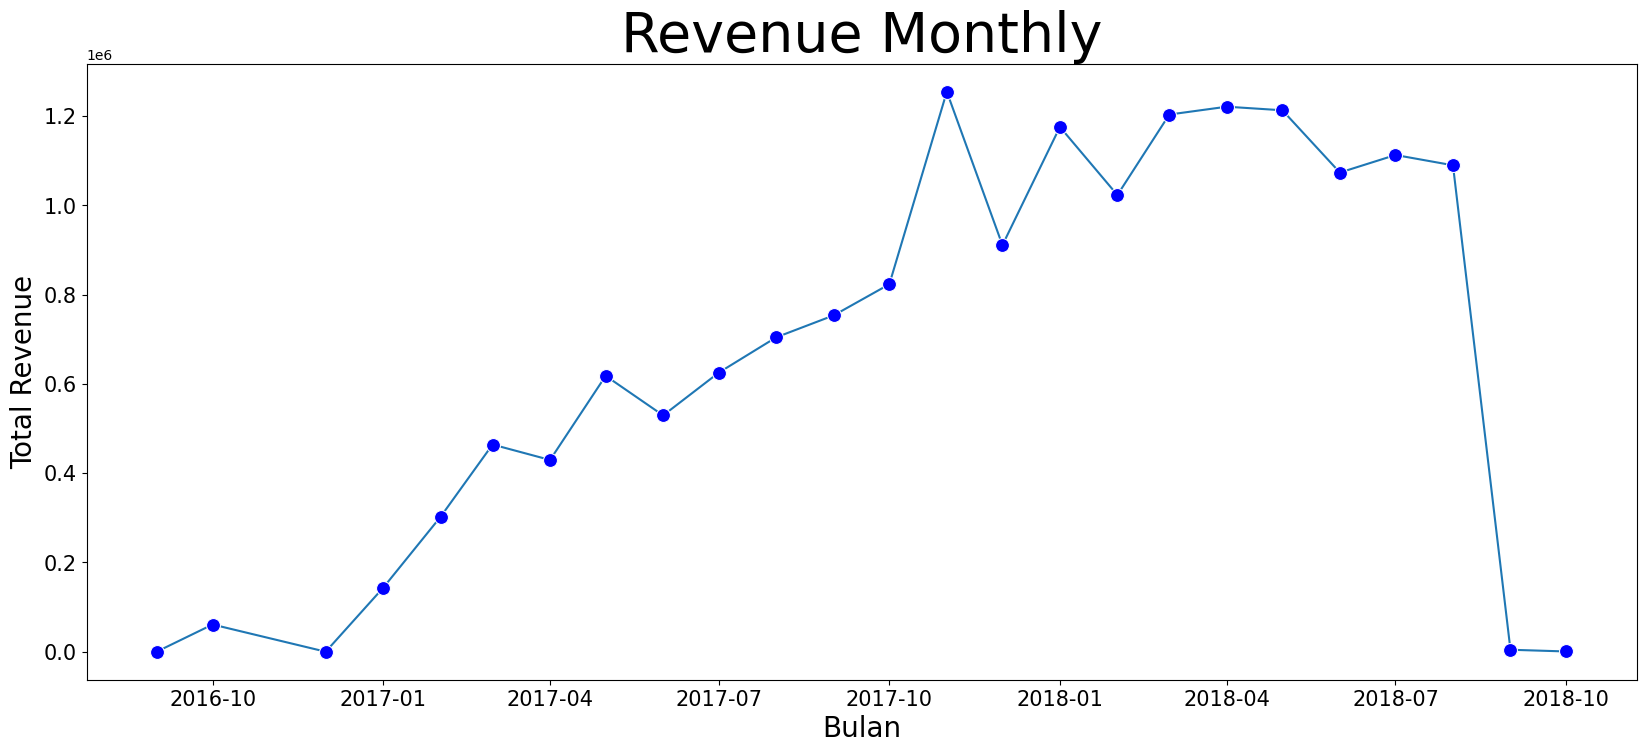

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='month_year', y='total_revenue', data=revenue_months,
             marker='o', markerfacecolor='blue', markersize=10)
plot.axes.set_title("Revenue Monthly",fontsize=40)
plot.set_xlabel("Bulan",fontsize=20)
plot.set_ylabel("Total Revenue",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
# fig = plt.subplots(figsize=(20, 5))
# plot = sns.lineplot(x='month_year', y='total_sales', data=revenue_months,
#              marker='o', markerfacecolor='blue', markersize=10
#              ).set(title='Sales Monthly', xlabel='Date', ylabel='Total Sales')
# # plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
# sns.set_theme(style='white', font_scale=1)

In [ ]:
# Mencari growth dari revenue bulanan
revenue_months['percent_change'] = revenue_months['total_revenue'].pct_change(1)
revenue_months

month_year  total_revenue  percent_change
0  2016-09-01         388.47             NaN
1  2016-10-01       60984.87      155.987335
2  2016-12-01          19.62       -0.999678
3  2017-01-01      143268.69     7301.175841
4  2017-02-01      302489.70        1.111345
5  2017-03-01      464122.07        0.534340
6  2017-04-01      429571.76       -0.074442
7  2017-05-01      618023.53        0.438697
8  2017-06-01      529381.98       -0.143427
9  2017-07-01      625202.02        0.181004
10 2017-08-01      704311.39        0.126534
11 2017-09-01      753466.97        0.069792
12 2017-10-01      823231.14        0.092591
13 2017-11-01     1254470.05        0.523837
14 2017-12-01      910812.65       -0.273946
15 2018-01-01     1175600.86        0.290716
16 2018-02-01     1023007.52       -0.129800
17 2018-03-01     1203361.35        0.176298
18 2018-04-01     1220934.62        0.014603
19 2018-05-01     1212886.10       -0.006592
20 2018-06-01     1073369.56       -0.115029
21 2018-07-01     1112712.64        0.036654
22 2018-08-01     1089674.69       -0.020704
23 2018-09-01        4439.54       -0.995926
24 2018-10-01         589.67       -0.867178

In [ ]:
# Hanya mengambil dari tahun 2017 bulan Februari
revenue_months_2017_2 = revenue_months[revenue_months['month_year']>='2017-02-01']
revenue_months_2017_2

month_year  total_revenue  percent_change
4  2017-02-01      302489.70        1.111345
5  2017-03-01      464122.07        0.534340
6  2017-04-01      429571.76       -0.074442
7  2017-05-01      618023.53        0.438697
8  2017-06-01      529381.98       -0.143427
9  2017-07-01      625202.02        0.181004
10 2017-08-01      704311.39        0.126534
11 2017-09-01      753466.97        0.069792
12 2017-10-01      823231.14        0.092591
13 2017-11-01     1254470.05        0.523837
14 2017-12-01      910812.65       -0.273946
15 2018-01-01     1175600.86        0.290716
16 2018-02-01     1023007.52       -0.129800
17 2018-03-01     1203361.35        0.176298
18 2018-04-01     1220934.62        0.014603
19 2018-05-01     1212886.10       -0.006592
20 2018-06-01     1073369.56       -0.115029
21 2018-07-01     1112712.64        0.036654
22 2018-08-01     1089674.69       -0.020704
23 2018-09-01        4439.54       -0.995926
24 2018-10-01         589.67       -0.867178

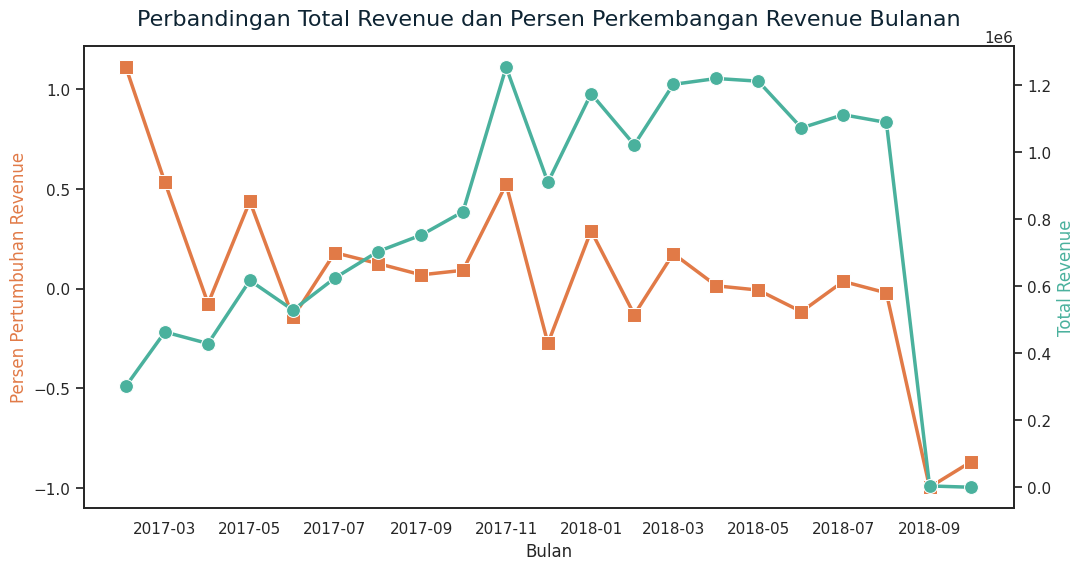

In [ ]:
# Visualisasi Perbandingan Revenue bulanan dan Growth nya

sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = revenue_months_2017_2["month_year"], y = revenue_months_2017_2["percent_change"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = revenue_months_2017_2["month_year"], y = revenue_months_2017_2["total_revenue"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('Bulan')
ax_1.set_ylabel('Persen Pertumbuhan Revenue', color='#E17A47')
ax_2.set_ylabel('Total Revenue', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Total Revenue dan Persen Perkembangan Revenue Bulanan",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()

### revenue-years

In [ ]:
# Revenue Setiap Tahun
revenue_years = revenue_date.groupby('year').agg(total_revenue = ('total_revenue','sum'))
revenue_years.reset_index(inplace=True)
revenue_years = revenue_years.sort_values('year', ascending=True)
revenue_years

year  total_revenue
0  2016       61392.96
1  2017     7558351.95
2  2018     9116576.55

In [ ]:
# Melihat tipe data
revenue_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3 non-null      int64  
 1   total_revenue  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0 bytes


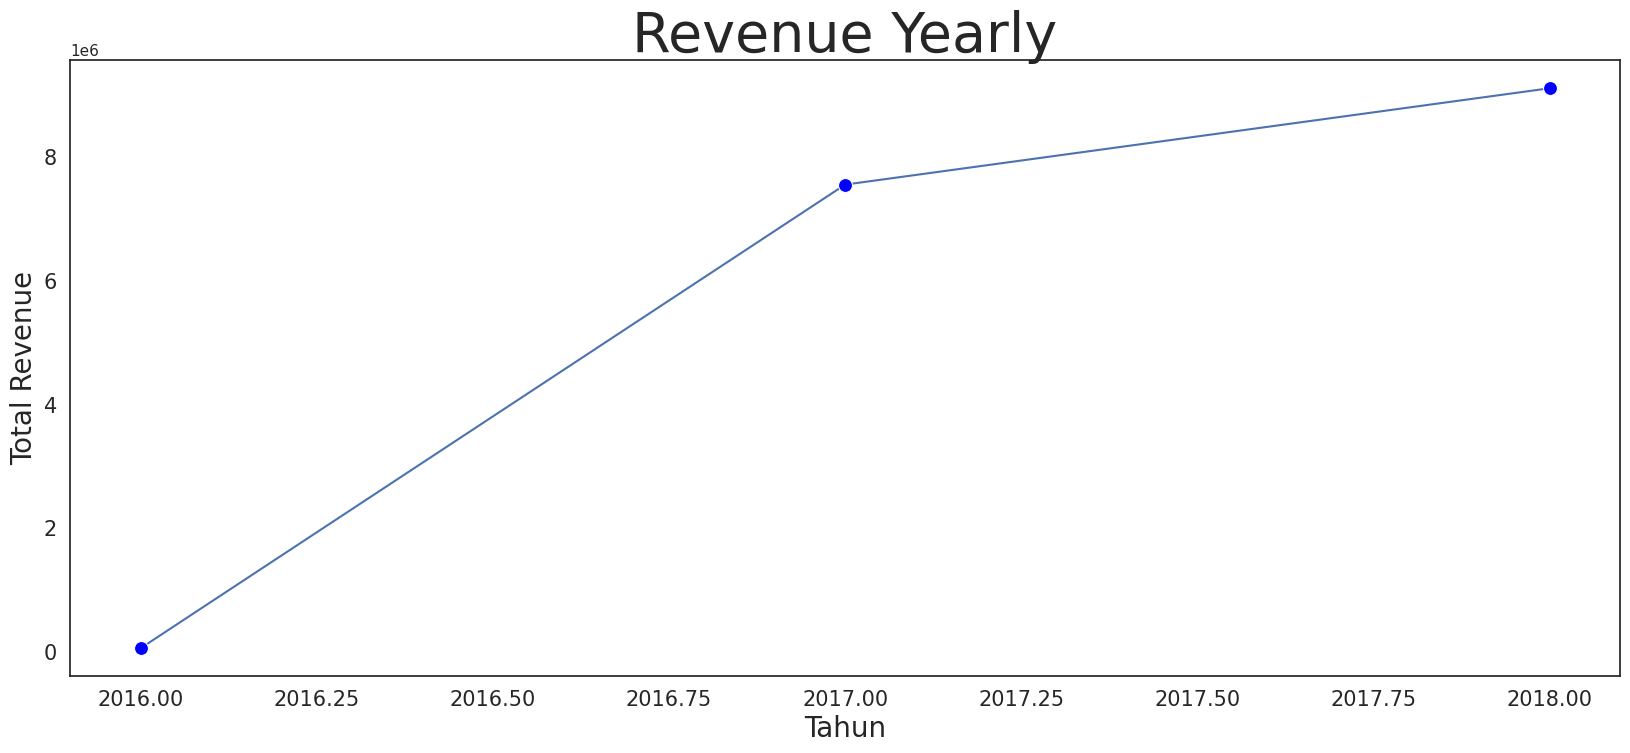

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='year', y='total_revenue', data=revenue_years,
             marker='o', markerfacecolor='blue', markersize=10)
plot.axes.set_title("Revenue Yearly",fontsize=40)
plot.set_xlabel("Tahun",fontsize=20)
plot.set_ylabel("Total Revenue",fontsize=20)
plot.tick_params(labelsize=15)
# plot.set_xticks([0, 1, 2])
# plot.set_xticklabels([2016, 2017, 2018])
sns.set_theme(style='white', font_scale=1)

In [ ]:
# Membuat persen pertumbuhan revenue
revenue_years['percent_change'] = revenue_years['total_revenue'].pct_change(1)
revenue_years

year  total_revenue  percent_change
0  2016       61392.96             NaN
1  2017     7558351.95      122.114311
2  2018     9116576.55        0.206159

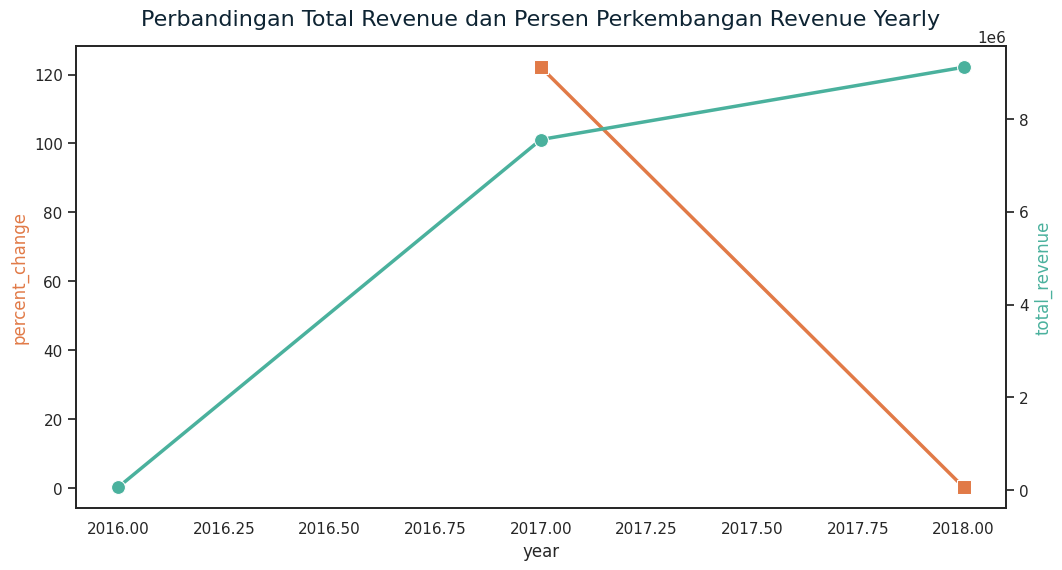

In [ ]:
# https://sains.id/visualisasi-data/1376/membuat-dual-y-axis-line-plot-dengan-matplotlib-dan-seaborn/
sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = revenue_years["year"], y = revenue_years["percent_change"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = revenue_years["year"], y = revenue_years["total_revenue"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('year')
ax_1.set_ylabel('percent_change', color='#E17A47')
ax_2.set_ylabel('total_revenue', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Total Revenue dan Persen Perkembangan Revenue Yearly",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()

### Orders-month

In [ ]:
# Membuat total orders berdasarkan order id dan tanggal transaksi
orders = df_cleaned.groupby(['order_id',
                             'order_purchase_timestamp']).agg(
                                total_order = ('payment_value','count'))
orders.reset_index(inplace=True)
orders.head()

order_id order_purchase_timestamp  total_order
0  00010242fe8c5a6d1ba2dd792cb16214      2017-09-13 08:59:02            1
1  00018f77f2f0320c557190d7a144bdd3      2017-04-26 10:53:06            1
2  000229ec398224ef6ca0657da4fc703e      2018-01-14 14:33:31            1
3  00024acbcdf0a6daa1e931b038114c75      2018-08-08 10:00:35            1
4  00042b26cf59d7ce69dfabb4e55b4fd9      2017-02-04 13:57:51            1

In [ ]:
# Menambahkan kolom tahun dan bulan_tahun
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
orders.head()

order_id order_purchase_timestamp  total_order  \
0  00010242fe8c5a6d1ba2dd792cb16214      2017-09-13 08:59:02            1   
1  00018f77f2f0320c557190d7a144bdd3      2017-04-26 10:53:06            1   
2  000229ec398224ef6ca0657da4fc703e      2018-01-14 14:33:31            1   
3  00024acbcdf0a6daa1e931b038114c75      2018-08-08 10:00:35            1   
4  00042b26cf59d7ce69dfabb4e55b4fd9      2017-02-04 13:57:51            1   

   year month_year  
0  2017    2017-09  
1  2017    2017-04  
2  2018    2018-01  
3  2018    2018-08  
4  2017    2017-02

In [ ]:
# Order Setiap Bulan
orders_months = orders.groupby('month_year').agg(total_order = ('total_order','sum'))
orders_months.reset_index(inplace=True)
orders_months = orders_months.sort_values('month_year', ascending=True)
orders_months

month_year  total_order
0     2016-09            4
1     2016-10          350
2     2016-12            1
3     2017-01          869
4     2017-02         1930
5     2017-03         2898
6     2017-04         2620
7     2017-05         4055
8     2017-06         3503
9     2017-07         4454
10    2017-08         4697
11    2017-09         4623
12    2017-10         5012
13    2017-11         8086
14    2017-12         6058
15    2018-01         7813
16    2018-02         7078
17    2018-03         7686
18    2018-04         7432
19    2018-05         7333
20    2018-06         6623
21    2018-07         6675
22    2018-08         6909
23    2018-09           16
24    2018-10            4

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
orders_months['month_year'] = orders_months['month_year'].astype(str)
orders_months['month_year'] = pd.to_datetime(orders_months['month_year'])
orders_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   25 non-null     datetime64[ns]
 1   total_order  25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 600.0 bytes


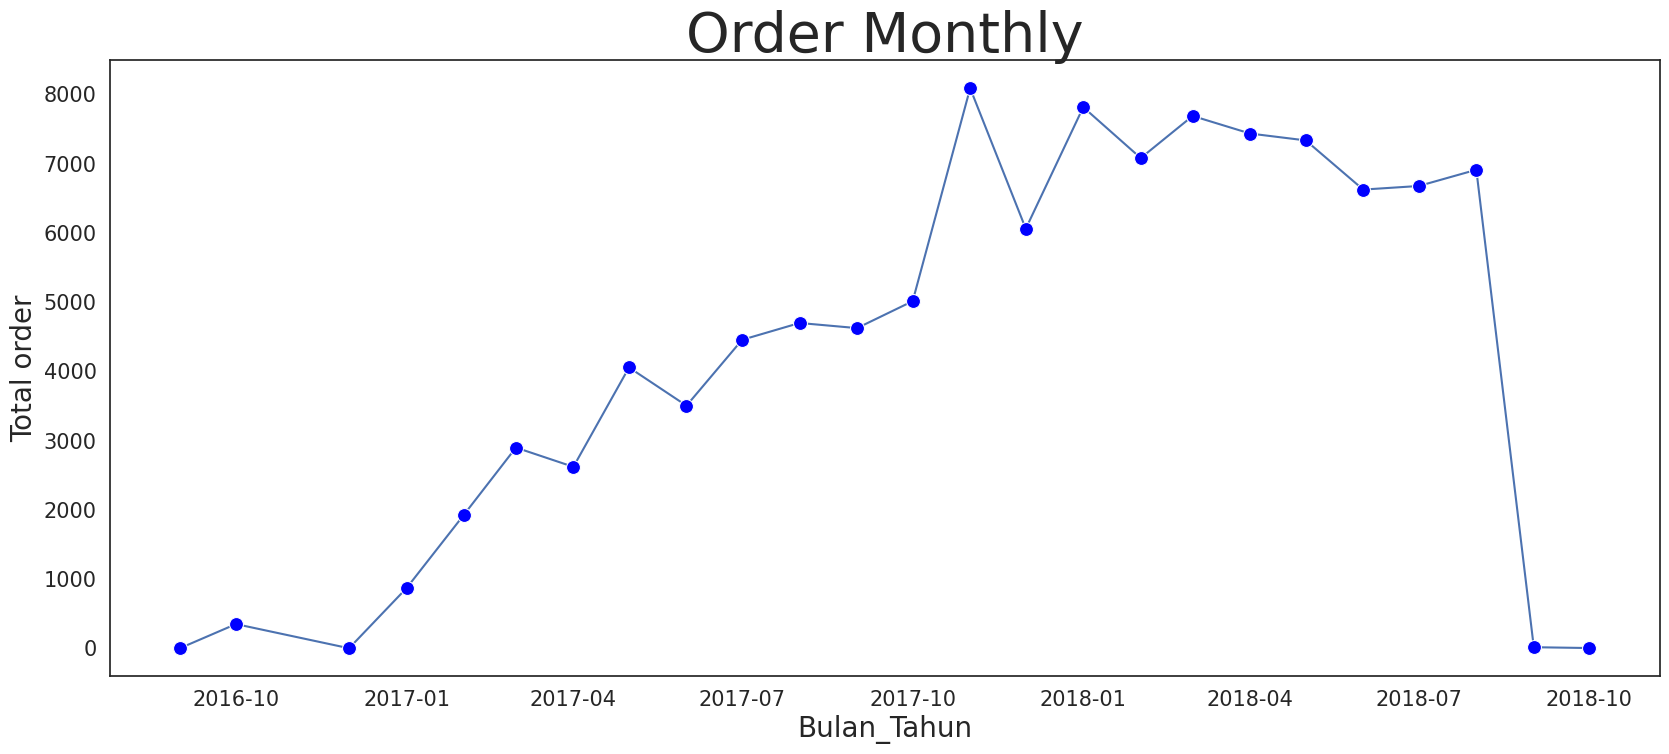

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='month_year', y='total_order', data=orders_months,
             marker='o', markerfacecolor='blue', markersize=10)
plot.axes.set_title("Order Monthly",fontsize=40)
plot.set_xlabel("Bulan_Tahun",fontsize=20)
plot.set_ylabel("Total order",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
# Mencari growth dari order bulanan
orders_months['percent_change'] = orders_months['total_order'].pct_change(1)
orders_months

month_year  total_order  percent_change
0  2016-09-01            4             NaN
1  2016-10-01          350       86.500000
2  2016-12-01            1       -0.997143
3  2017-01-01          869      868.000000
4  2017-02-01         1930        1.220944
5  2017-03-01         2898        0.501554
6  2017-04-01         2620       -0.095928
7  2017-05-01         4055        0.547710
8  2017-06-01         3503       -0.136128
9  2017-07-01         4454        0.271482
10 2017-08-01         4697        0.054558
11 2017-09-01         4623       -0.015755
12 2017-10-01         5012        0.084144
13 2017-11-01         8086        0.613328
14 2017-12-01         6058       -0.250804
15 2018-01-01         7813        0.289700
16 2018-02-01         7078       -0.094074
17 2018-03-01         7686        0.085900
18 2018-04-01         7432       -0.033047
19 2018-05-01         7333       -0.013321
20 2018-06-01         6623       -0.096823
21 2018-07-01         6675        0.007851
22 2018-08-01         6909        0.035056
23 2018-09-01           16       -0.997684
24 2018-10-01            4       -0.750000

In [ ]:
# Hanya mengambil dari tahun 2017 bulan Februari
orders_months_2017_2 = orders_months[orders_months['month_year']>='2017-02-01']
orders_months_2017_2

month_year  total_order  percent_change
4  2017-02-01         1930        1.220944
5  2017-03-01         2898        0.501554
6  2017-04-01         2620       -0.095928
7  2017-05-01         4055        0.547710
8  2017-06-01         3503       -0.136128
9  2017-07-01         4454        0.271482
10 2017-08-01         4697        0.054558
11 2017-09-01         4623       -0.015755
12 2017-10-01         5012        0.084144
13 2017-11-01         8086        0.613328
14 2017-12-01         6058       -0.250804
15 2018-01-01         7813        0.289700
16 2018-02-01         7078       -0.094074
17 2018-03-01         7686        0.085900
18 2018-04-01         7432       -0.033047
19 2018-05-01         7333       -0.013321
20 2018-06-01         6623       -0.096823
21 2018-07-01         6675        0.007851
22 2018-08-01         6909        0.035056
23 2018-09-01           16       -0.997684
24 2018-10-01            4       -0.750000

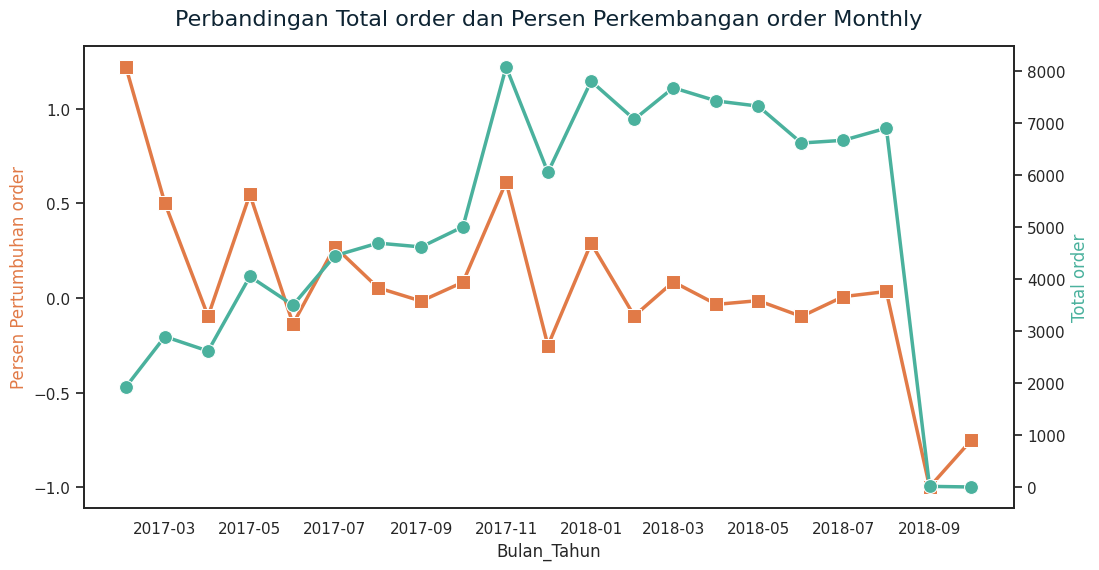

In [ ]:
# Visualisasi Perbandingan order bulanan dan Growth nya
sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = orders_months_2017_2["month_year"], y = orders_months_2017_2["percent_change"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = orders_months_2017_2["month_year"], y = orders_months_2017_2["total_order"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('Bulan_Tahun')
ax_1.set_ylabel('Persen Pertumbuhan order', color='#E17A47')
ax_2.set_ylabel('Total order', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Total order dan Persen Perkembangan order Monthly",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()

### Orders-Years

In [ ]:
# Order Setiap Tahun
orders_year = orders.groupby('year').agg(total_order = ('total_order','sum'))
orders_year.reset_index(inplace=True)
orders_year = orders_year.sort_values('year', ascending=True)
orders_year

year  total_order
0  2016          355
1  2017        48805
2  2018        57569

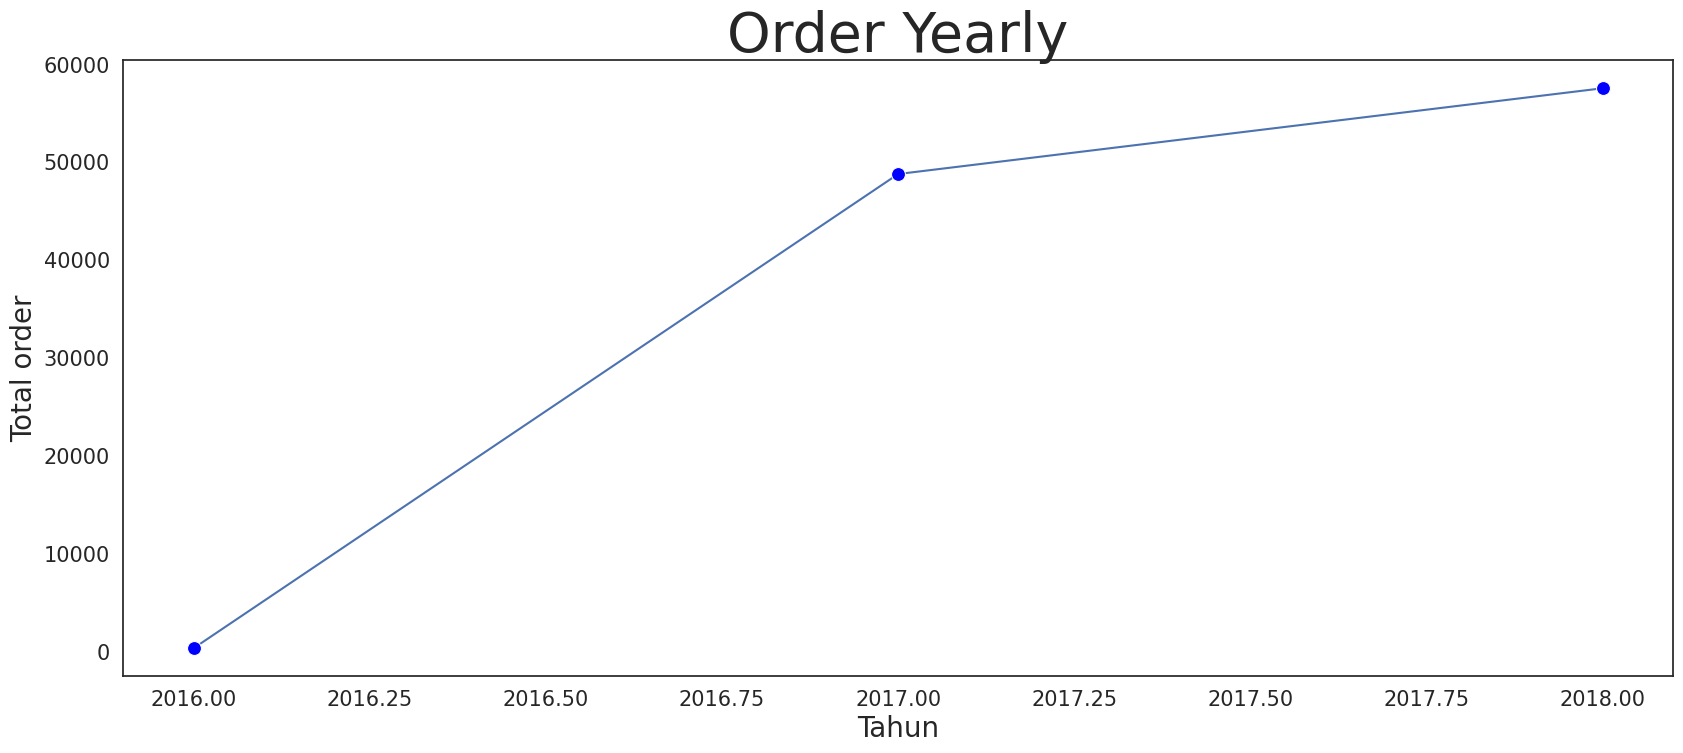

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='year', y='total_order', data=orders_year,
             marker='o', markerfacecolor='blue', markersize=10)
plot.axes.set_title("Order Yearly",fontsize=40)
plot.set_xlabel("Tahun",fontsize=20)
plot.set_ylabel("Total order",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
# Mencari growth dari order Tahunan
orders_year['percent_change'] = orders_year['total_order'].pct_change(1)
orders_year

year  total_order  percent_change
0  2016          355             NaN
1  2017        48805      136.478873
2  2018        57569        0.179572

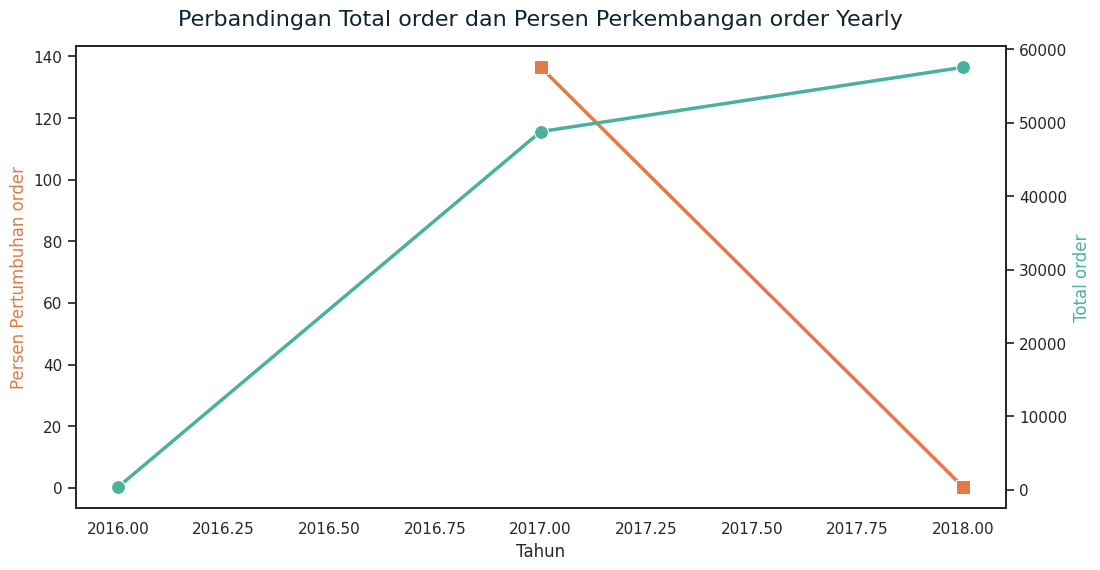

In [ ]:
# Visualisasi Perbandingan order bulanan dan Growth nya
sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = orders_year["year"], y = orders_year["percent_change"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = orders_year["year"], y = orders_year["total_order"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('Tahun')
ax_1.set_ylabel('Persen Pertumbuhan order', color='#E17A47')
ax_2.set_ylabel('Total order', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Total order dan Persen Perkembangan order Yearly",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()

## Revenue and Order Terhadap Order Status Bulanan dan tahunan

In [ ]:
# Copy data awal menjadi data yang akan diubah
df_status = df_cleaned.copy()
df_status.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    price product_category_name  payment_sequential payment_type  \
0   29.99            housewares                 1.0  credit_card   
1   29.99            housewares                 2.0      voucher   
2   29.99            housewares                 3.0      voucher   
3  118.70             perfumery                 1.0       boleto   
4  159.90                  auto                 1.0  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                   1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                   1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                   1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                   1.0         141.46  af07308b275d755c9edb36a90c618231   
4                   3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                      3149     sao paulo             SP  
2                      3149     sao paulo             SP  
3                     47813     barreiras             BA  
4                     75265    vianopolis             GO

In [ ]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106729 entries, 0 to 106728
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                106729 non-null  int64         
 1   order_id                  106729 non-null  object        
 2   customer_id               106729 non-null  object        
 3   order_status              106729 non-null  object        
 4   order_purchase_timestamp  106729 non-null  datetime64[ns]
 5   price                     106729 non-null  float64       
 6   product_category_name     106729 non-null  object        
 7   payment_sequential        106729 non-null  float64       
 8   payment_type              106729 non-null  object        
 9   payment_installments      106729 non-null  float64       
 10  payment_value             106729 non-null  float64       
 11  customer_unique_id        106729 non-null  object        
 12  cu

In [ ]:
df_status.order_status.value_counts()

delivered      103572
shipped          1178
canceled          667
unavailable       650
invoiced          332
processing        323
created             5
approved            2
Name: order_status, dtype: int64

In [ ]:
# Buat data total order berdasarkan
# tanggal transaksi, order id dan status order
df_status_order = df_status.groupby(['order_purchase_timestamp',
                                     'order_id',
                                     'order_status']).agg(
                                total_order = ('payment_value','count'))
df_status_order.reset_index(inplace=True)
df_status_order.head()

order_purchase_timestamp                          order_id order_status  \
0      2016-09-04 21:15:19  2e7a8482f6fb09756ca50c10d7bfc047      shipped   
1      2016-09-05 00:15:34  e5fa5a7210941f7d56d0208e4e071d35     canceled   
2      2016-09-13 15:24:19  809a282bbd5dbcabb6f2f724fca862ec     canceled   
3      2016-10-02 22:07:52  71303d7e93b399f5bcd537d124c0bcfa     canceled   
4      2016-10-03 09:44:50  3b697a20d9e427646d92567910af6d57    delivered   

   total_order  
0            2  
1            1  
2            1  
3            1  
4            1

In [ ]:
# Menambahkan kolom year dan month_year
df_status_order['year'] = df_status_order['order_purchase_timestamp'].dt.year
df_status_order['month_year'] = df_status_order['order_purchase_timestamp'].dt.to_period('M')
df_status_order.head()

order_purchase_timestamp                          order_id order_status  \
0      2016-09-04 21:15:19  2e7a8482f6fb09756ca50c10d7bfc047      shipped   
1      2016-09-05 00:15:34  e5fa5a7210941f7d56d0208e4e071d35     canceled   
2      2016-09-13 15:24:19  809a282bbd5dbcabb6f2f724fca862ec     canceled   
3      2016-10-02 22:07:52  71303d7e93b399f5bcd537d124c0bcfa     canceled   
4      2016-10-03 09:44:50  3b697a20d9e427646d92567910af6d57    delivered   

   total_order  year month_year  
0            2  2016    2016-09  
1            1  2016    2016-09  
2            1  2016    2016-09  
3            1  2016    2016-10  
4            1  2016    2016-10

### Order Bulanan

In [ ]:
# pivot table menjadi total order per bulan dan status order
df_status_order_month = df_status_order.pivot_table(columns='order_status', index='month_year',
                                            values='total_order', aggfunc= 'sum')
# reset index
df_status_order_month.reset_index(inplace=True)

# Mengubah data type month_year dari period[M] ke datetime
df_status_order_month['month_year'] = df_status_order_month['month_year'].astype(str)
df_status_order_month['month_year'] = pd.to_datetime(df_status_order_month['month_year'])

# Impute NaN value dengan 0
df_status_order_month.fillna(value=0, inplace=True)
df_status_order_month

order_status month_year  approved  canceled  created  delivered  invoiced  \
0            2016-09-01       0.0       2.0      0.0        0.0       0.0   
1            2016-10-01       0.0      25.0      0.0      288.0      18.0   
2            2016-12-01       0.0       0.0      0.0        1.0       0.0   
3            2017-01-01       0.0       3.0      0.0      818.0      12.0   
4            2017-02-01       1.0      17.0      0.0     1792.0      11.0   
5            2017-03-01       0.0      33.0      0.0     2759.0       3.0   
6            2017-04-01       1.0      18.0      0.0     2484.0      16.0   
7            2017-05-01       0.0      31.0      0.0     3895.0      17.0   
8            2017-06-01       0.0      19.0      0.0     3388.0      12.0   
9            2017-07-01       0.0      36.0      0.0     4284.0       7.0   
10           2017-08-01       0.0      35.0      0.0     4540.0      20.0   
11           2017-09-01       0.0      20.0      0.0     4478.0      17.0   
12           2017-10-01       0.0      31.0      0.0     4847.0      18.0   
13           2017-11-01       0.0      38.0      2.0     7813.0      39.0   
14           2017-12-01       0.0      11.0      2.0     5892.0      13.0   
15           2018-01-01       0.0      35.0      0.0     7600.0      17.0   
16           2018-02-01       0.0      76.0      1.0     6902.0       6.0   
17           2018-03-01       0.0      27.0      0.0     7470.0      25.0   
18           2018-04-01       0.0      15.0      0.0     7287.0      15.0   
19           2018-05-01       0.0      31.0      0.0     7198.0      27.0   
20           2018-06-01       0.0      18.0      0.0     6553.0       3.0   
21           2018-07-01       0.0      42.0      0.0     6537.0      13.0   
22           2018-08-01       0.0      85.0      0.0     6746.0      23.0   
23           2018-09-01       0.0      15.0      0.0        0.0       0.0   
24           2018-10-01       0.0       4.0      0.0        0.0       0.0   

order_status  processing  shipped  unavailable  
0                    0.0      2.0          0.0  
1                    2.0      9.0          8.0  
2                    0.0      0.0          0.0  
3                    9.0     16.0         11.0  
4                   37.0     24.0         48.0  
5                   24.0     46.0         33.0  
6                   10.0     81.0         10.0  
7                   24.0     57.0         31.0  
8                   12.0     48.0         24.0  
9                   11.0     59.0         57.0  
10                  18.0     42.0         42.0  
11                  24.0     38.0         46.0  
12                  21.0     35.0         60.0  
13                  35.0     73.0         86.0  
14                  35.0     60.0         45.0  
15                  30.0     80.0         51.0  
16                   6.0     57.0         30.0  
17                   9.0    138.0         17.0  
18                   8.0    102.0          5.0  
19                   6.0     55.0         16.0  
20                   0.0     45.0          4.0  
21                   2.0     62.0         19.0  
22                   0.0     48.0          7.0  
23                   0.0      1.0          0.0  
24                   0.0      0.0          0.0

Notes:
- Satukan yang invoiced, processing, created, approved menjadi processed
- Satukan yang delivered & shipped menjadi delivered-or-shipped

In [ ]:
# Gabungkan kolom invoiced, processing, created, approved
# menjadi processed
df_status_order_month['being processed'] = (df_status_order_month['invoiced'] +
                                      df_status_order_month['processing'] +
                                      df_status_order_month['created'] +
                                      df_status_order_month['approved'])
# Gabungkan kolom delivered & shipped
# menjadi delivered-or-shipped
df_status_order_month['delivered-or-shipped'] = (df_status_order_month['delivered'] +
                                      df_status_order_month['shipped'])
# delete kolom invoiced, processing, created, approved, delivered & shipped
df_status_order_month.drop(['invoiced', 'processing',
                            'created', 'approved',
                            'delivered', 'shipped'], axis=1, inplace=True)

df_status_order_month

order_status month_year  canceled  unavailable  being processed  \
0            2016-09-01       2.0          0.0              0.0   
1            2016-10-01      25.0          8.0             20.0   
2            2016-12-01       0.0          0.0              0.0   
3            2017-01-01       3.0         11.0             21.0   
4            2017-02-01      17.0         48.0             49.0   
5            2017-03-01      33.0         33.0             27.0   
6            2017-04-01      18.0         10.0             27.0   
7            2017-05-01      31.0         31.0             41.0   
8            2017-06-01      19.0         24.0             24.0   
9            2017-07-01      36.0         57.0             18.0   
10           2017-08-01      35.0         42.0             38.0   
11           2017-09-01      20.0         46.0             41.0   
12           2017-10-01      31.0         60.0             39.0   
13           2017-11-01      38.0         86.0             76.0   
14           2017-12-01      11.0         45.0             50.0   
15           2018-01-01      35.0         51.0             47.0   
16           2018-02-01      76.0         30.0             13.0   
17           2018-03-01      27.0         17.0             34.0   
18           2018-04-01      15.0          5.0             23.0   
19           2018-05-01      31.0         16.0             33.0   
20           2018-06-01      18.0          4.0              3.0   
21           2018-07-01      42.0         19.0             15.0   
22           2018-08-01      85.0          7.0             23.0   
23           2018-09-01      15.0          0.0              0.0   
24           2018-10-01       4.0          0.0              0.0   

order_status  delivered-or-shipped  
0                              2.0  
1                            297.0  
2                              1.0  
3                            834.0  
4                           1816.0  
5                           2805.0  
6                           2565.0  
7                           3952.0  
8                           3436.0  
9                           4343.0  
10                          4582.0  
11                          4516.0  
12                          4882.0  
13                          7886.0  
14                          5952.0  
15                          7680.0  
16                          6959.0  
17                          7608.0  
18                          7389.0  
19                          7253.0  
20                          6598.0  
21                          6599.0  
22                          6794.0  
23                             1.0  
24                             0.0

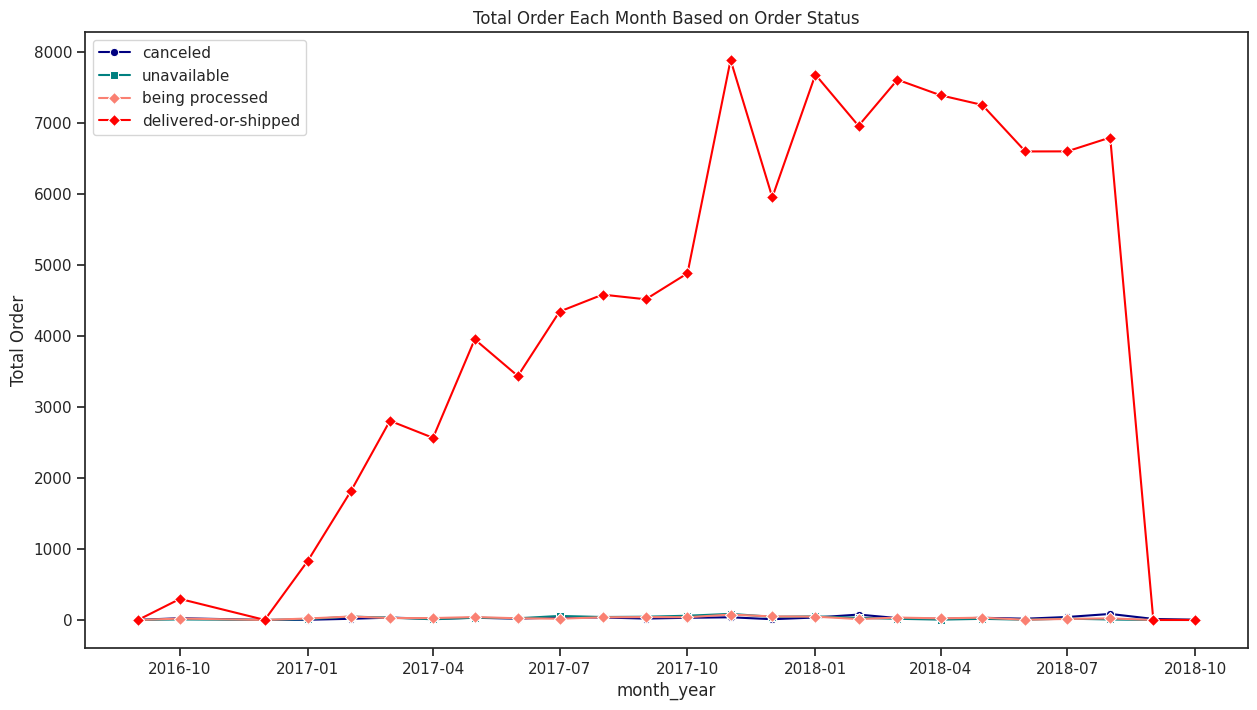

In [ ]:
#  Set the style and font sizes
sns.set_style('ticks')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(15,8))

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='month_year', y='canceled', data=df_status_order_month, marker='o', color='navy', label='canceled')
sns.lineplot(x='month_year', y='unavailable', data=df_status_order_month, marker='s', color='teal', label='unavailable')
sns.lineplot(x='month_year', y='being processed', data=df_status_order_month, marker='D', color='salmon', label='being processed')
sns.lineplot(x='month_year', y='delivered-or-shipped', data=df_status_order_month, marker='D', color='red', label='delivered-or-shipped')

# Set plot title and axes labels
plt.title('Total Order Each Month Based on Order Status')
plt.xlabel('month_year')
plt.ylabel('Total Order')

# Add a legend
plt.legend(loc='upper left')

# # Add a grid
# plt.grid(True)

# # Remove the top and right spines
# sns.despine()

# Show the plot
plt.show()

### Order Tahunan

In [ ]:
# pivot table menjadi total order per bulan dan status order
df_status_order_year = df_status_order.pivot_table(columns='order_status', index='year',
                                            values='total_order', aggfunc= 'sum')
# reset index
df_status_order_year.reset_index(inplace=True)

# Impute NaN value dengan 0
df_status_order_year.fillna(value=0, inplace=True)
df_status_order_year

order_status  year  approved  canceled  created  delivered  invoiced  \
0             2016       0.0      27.0      0.0      289.0      18.0   
1             2017       2.0     292.0      4.0    46990.0     185.0   
2             2018       0.0     348.0      1.0    56293.0     129.0   

order_status  processing  shipped  unavailable  
0                    2.0     11.0          8.0  
1                  260.0    579.0        493.0  
2                   61.0    588.0        149.0

Notes:
- Satukan yang invoiced, processing, created, approved menjadi processed
- Satukan yang delivered & shipped menjadi delivered-or-shipped

In [ ]:
# Gabungkan kolom invoiced, processing, created, approved
# menjadi processed
df_status_order_year['being processed'] = (df_status_order_year['invoiced'] +
                                      df_status_order_year['processing'] +
                                      df_status_order_year['created'] +
                                      df_status_order_year['approved'])
# Gabungkan kolom delivered & shipped
# menjadi delivered-or-shipped
df_status_order_year['delivered-or-shipped'] = (df_status_order_year['delivered'] +
                                      df_status_order_year['shipped'])
# delete kolom invoiced, processing, created, approved, delivered & shipped
df_status_order_year.drop(['invoiced', 'processing',
                            'created', 'approved',
                            'delivered', 'shipped'], axis=1, inplace=True)

df_status_order_year

order_status  year  canceled  unavailable  being processed  \
0             2016      27.0          8.0             20.0   
1             2017     292.0        493.0            451.0   
2             2018     348.0        149.0            191.0   

order_status  delivered-or-shipped  
0                            300.0  
1                          47569.0  
2                          56881.0

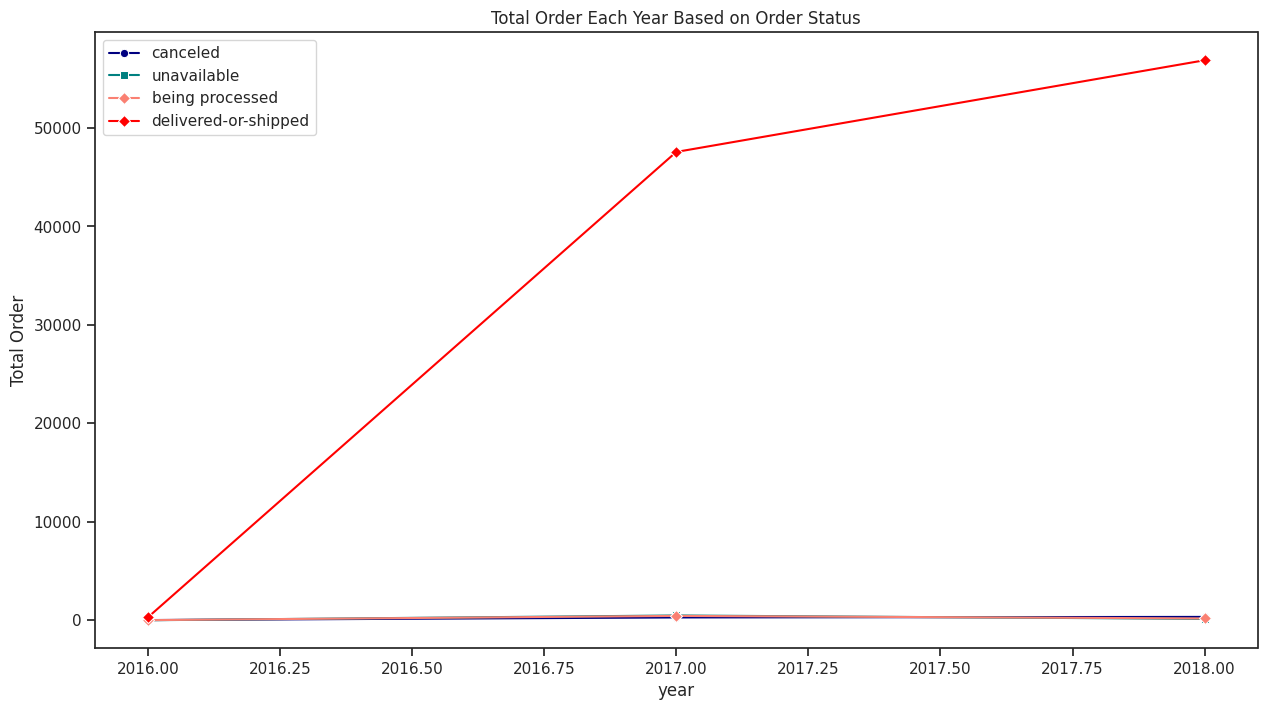

In [ ]:
#  Set the style and font sizes
sns.set_style('ticks')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(15,8))

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='year', y='canceled', data=df_status_order_year, marker='o', color='navy', label='canceled')
sns.lineplot(x='year', y='unavailable', data=df_status_order_year, marker='s', color='teal', label='unavailable')
sns.lineplot(x='year', y='being processed', data=df_status_order_year, marker='D', color='salmon', label='being processed')
sns.lineplot(x='year', y='delivered-or-shipped', data=df_status_order_year, marker='D', color='red', label='delivered-or-shipped')

# Set plot title and axes labels
plt.title('Total Order Each Year Based on Order Status')
plt.xlabel('year')
plt.ylabel('Total Order')

# Add a legend
plt.legend(loc='upper left')

# # Add a grid
# plt.grid(True)

# # Remove the top and right spines
# sns.despine()

# Show the plot
plt.show()

Masalahnya berarti bukan di delivery,  memang engga ada barang yang dijual

## Payment Type dan Orders Bulanan dan Tahunan

In [ ]:
# Copy data awal menjadi data yang akan diubah
df_pay = df_cleaned.copy()
df_pay.head()

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   
3           3  53cdb2fc8bc7dce0b6741e2150273451   
4           4  47770eb9100c2d0c44946d9cf07ec65d   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
3  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
4  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   

    price product_category_name  payment_sequential payment_type  \
0   29.99            housewares                 1.0  credit_card   
1   29.99            housewares                 2.0      voucher   
2   29.99            housewares                 3.0      voucher   
3  118.70             perfumery                 1.0       boleto   
4  159.90                  auto                 1.0  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                   1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                   1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                   1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   
3                   1.0         141.46  af07308b275d755c9edb36a90c618231   
4                   3.0         179.12  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                      3149     sao paulo             SP  
2                      3149     sao paulo             SP  
3                     47813     barreiras             BA  
4                     75265    vianopolis             GO

In [ ]:
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106729 entries, 0 to 106728
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                106729 non-null  int64         
 1   order_id                  106729 non-null  object        
 2   customer_id               106729 non-null  object        
 3   order_status              106729 non-null  object        
 4   order_purchase_timestamp  106729 non-null  datetime64[ns]
 5   price                     106729 non-null  float64       
 6   product_category_name     106729 non-null  object        
 7   payment_sequential        106729 non-null  float64       
 8   payment_type              106729 non-null  object        
 9   payment_installments      106729 non-null  float64       
 10  payment_value             106729 non-null  float64       
 11  customer_unique_id        106729 non-null  object        
 12  cu

In [ ]:
df_pay.payment_type.value_counts()

credit_card    78915
boleto         20266
voucher         5974
debit_card      1571
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
# Buat data total order berdasarkan
# tanggal transaksi, order id dan status order
df_pay_type_order = df_status.groupby(['order_purchase_timestamp',
                                       'order_id',
                                       'payment_type']).agg(
                                total_order = ('payment_value','count'))
df_pay_type_order.reset_index(inplace=True)
df_pay_type_order.head()

order_purchase_timestamp                          order_id payment_type  \
0      2016-09-04 21:15:19  2e7a8482f6fb09756ca50c10d7bfc047  credit_card   
1      2016-09-05 00:15:34  e5fa5a7210941f7d56d0208e4e071d35  credit_card   
2      2016-09-13 15:24:19  809a282bbd5dbcabb6f2f724fca862ec  credit_card   
3      2016-10-02 22:07:52  71303d7e93b399f5bcd537d124c0bcfa  credit_card   
4      2016-10-03 09:44:50  3b697a20d9e427646d92567910af6d57       boleto   

   total_order  
0            2  
1            1  
2            1  
3            1  
4            1

In [ ]:
# Menambahkan kolom year dan month_year
df_pay_type_order['year'] = df_pay_type_order['order_purchase_timestamp'].dt.year
df_pay_type_order['month_year'] = df_pay_type_order['order_purchase_timestamp'].dt.to_period('M')
df_pay_type_order.head()

order_purchase_timestamp                          order_id payment_type  \
0      2016-09-04 21:15:19  2e7a8482f6fb09756ca50c10d7bfc047  credit_card   
1      2016-09-05 00:15:34  e5fa5a7210941f7d56d0208e4e071d35  credit_card   
2      2016-09-13 15:24:19  809a282bbd5dbcabb6f2f724fca862ec  credit_card   
3      2016-10-02 22:07:52  71303d7e93b399f5bcd537d124c0bcfa  credit_card   
4      2016-10-03 09:44:50  3b697a20d9e427646d92567910af6d57       boleto   

   total_order  year month_year  
0            2  2016    2016-09  
1            1  2016    2016-09  
2            1  2016    2016-09  
3            1  2016    2016-10  
4            1  2016    2016-10

### Order Bulanan

In [ ]:
# pivot table menjadi total order per bulan dan status order
df_pay_type_order_month = df_pay_type_order.pivot_table(columns='payment_type',
                                                        index='month_year',
                                                        values='total_order',
                                                        aggfunc= 'sum')
# reset index
df_pay_type_order_month.reset_index(inplace=True)

# Mengubah data type month_year dari period[M] ke datetime
df_pay_type_order_month['month_year'] = df_pay_type_order_month['month_year'].astype(str)
df_pay_type_order_month['month_year'] = pd.to_datetime(df_pay_type_order_month['month_year'])

# Impute NaN value dengan 0
df_pay_type_order_month.fillna(value=0, inplace=True)
df_pay_type_order_month

payment_type month_year  boleto  credit_card  debit_card  not_defined  voucher
0            2016-09-01     0.0          4.0         0.0          0.0      0.0
1            2016-10-01    63.0        262.0         2.0          0.0     23.0
2            2016-12-01     0.0          1.0         0.0          0.0      0.0
3            2017-01-01   201.0        597.0         9.0          0.0     62.0
4            2017-02-01   402.0       1395.0        13.0          0.0    120.0
5            2017-03-01   601.0       2060.0        33.0          0.0    204.0
6            2017-04-01   510.0       1881.0        27.0          0.0    202.0
7            2017-05-01   793.0       2938.0        31.0          0.0    293.0
8            2017-06-01   719.0       2515.0        28.0          0.0    241.0
9            2017-07-01   870.0       3178.0        23.0          0.0    383.0
10           2017-08-01   962.0       3378.0        34.0          0.0    323.0
11           2017-09-01   928.0       3355.0        44.0          0.0    296.0
12           2017-10-01  1024.0       3639.0        53.0          0.0    296.0
13           2017-11-01  1547.0       6073.0        71.0          0.0    395.0
14           2017-12-01  1183.0       4489.0        64.0          0.0    322.0
15           2018-01-01  1557.0       5691.0       114.0          0.0    451.0
16           2018-02-01  1345.0       5355.0        69.0          0.0    309.0
17           2018-03-01  1381.0       5827.0        79.0          0.0    399.0
18           2018-04-01  1326.0       5628.0       101.0          0.0    377.0
19           2018-05-01  1302.0       5646.0        51.0          0.0    334.0
20           2018-06-01  1123.0       4973.0       188.0          0.0    339.0
21           2018-07-01  1262.0       4881.0       249.0          0.0    283.0
22           2018-08-01  1167.0       5149.0       288.0          2.0    303.0
23           2018-09-01     0.0          0.0         0.0          1.0     15.0
24           2018-10-01     0.0          0.0         0.0          0.0      4.0

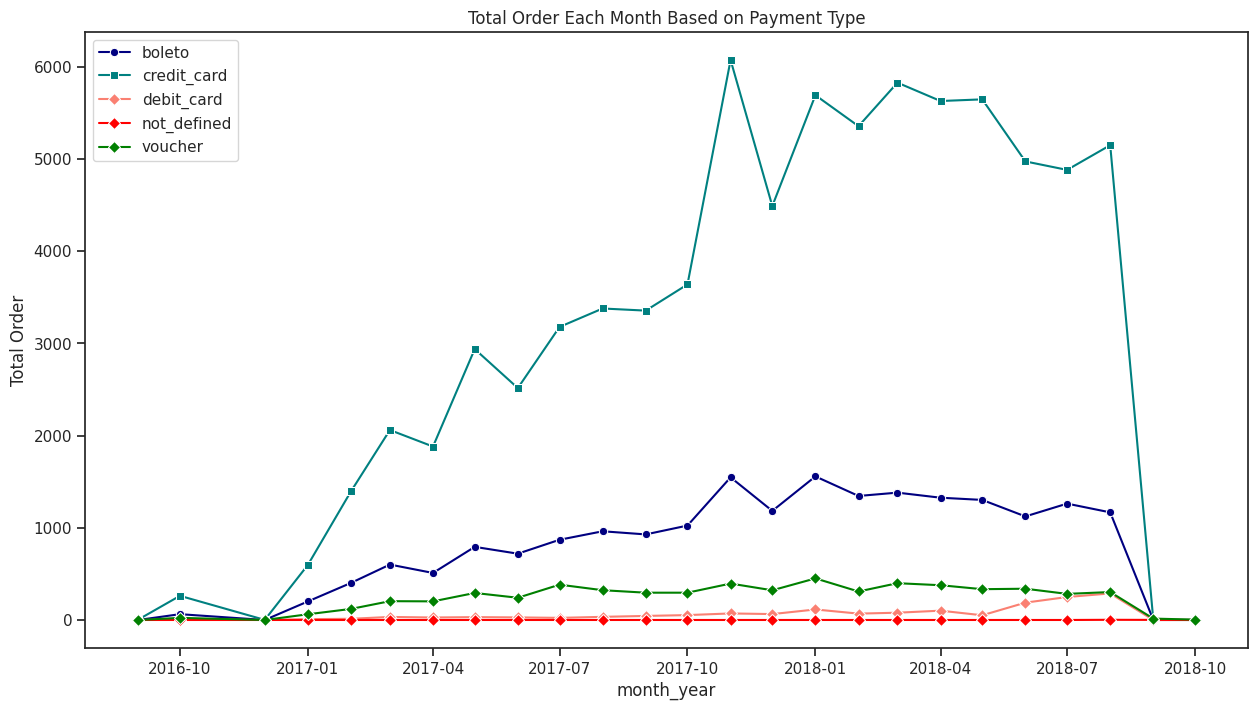

In [ ]:
#  Set the style and font sizes
sns.set_style('ticks')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(15,8))

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='month_year', y='boleto', data=df_pay_type_order_month, marker='o', color='navy', label='boleto')
sns.lineplot(x='month_year', y='credit_card', data=df_pay_type_order_month, marker='s', color='teal', label='credit_card')
sns.lineplot(x='month_year', y='debit_card', data=df_pay_type_order_month, marker='D', color='salmon', label='debit_card')
sns.lineplot(x='month_year', y='not_defined', data=df_pay_type_order_month, marker='D', color='red', label='not_defined')
sns.lineplot(x='month_year', y='voucher', data=df_pay_type_order_month, marker='D', color='green', label='voucher')

# Set plot title and axes labels
plt.title('Total Order Each Month Based on Payment Type')
plt.xlabel('month_year')
plt.ylabel('Total Order')

# Add a legend
plt.legend(loc='upper left')

# # Add a grid
# plt.grid(True)

# # Remove the top and right spines
# sns.despine()

# Show the plot
plt.show()

### Order Tahunan

In [ ]:
# pivot table menjadi total order per bulan dan status order
df_pay_type_order_year = df_pay_type_order.pivot_table(columns='payment_type',
                                                        index='year',
                                                        values='total_order',
                                                        aggfunc= 'sum')
# reset index
df_pay_type_order_year.reset_index(inplace=True)

# Impute NaN value dengan 0
df_pay_type_order_year.fillna(value=0, inplace=True)
df_pay_type_order_year

payment_type  year   boleto  credit_card  debit_card  not_defined  voucher
0             2016     63.0        267.0         2.0          0.0     23.0
1             2017   9740.0      35498.0       430.0          0.0   3137.0
2             2018  10463.0      43150.0      1139.0          3.0   2814.0

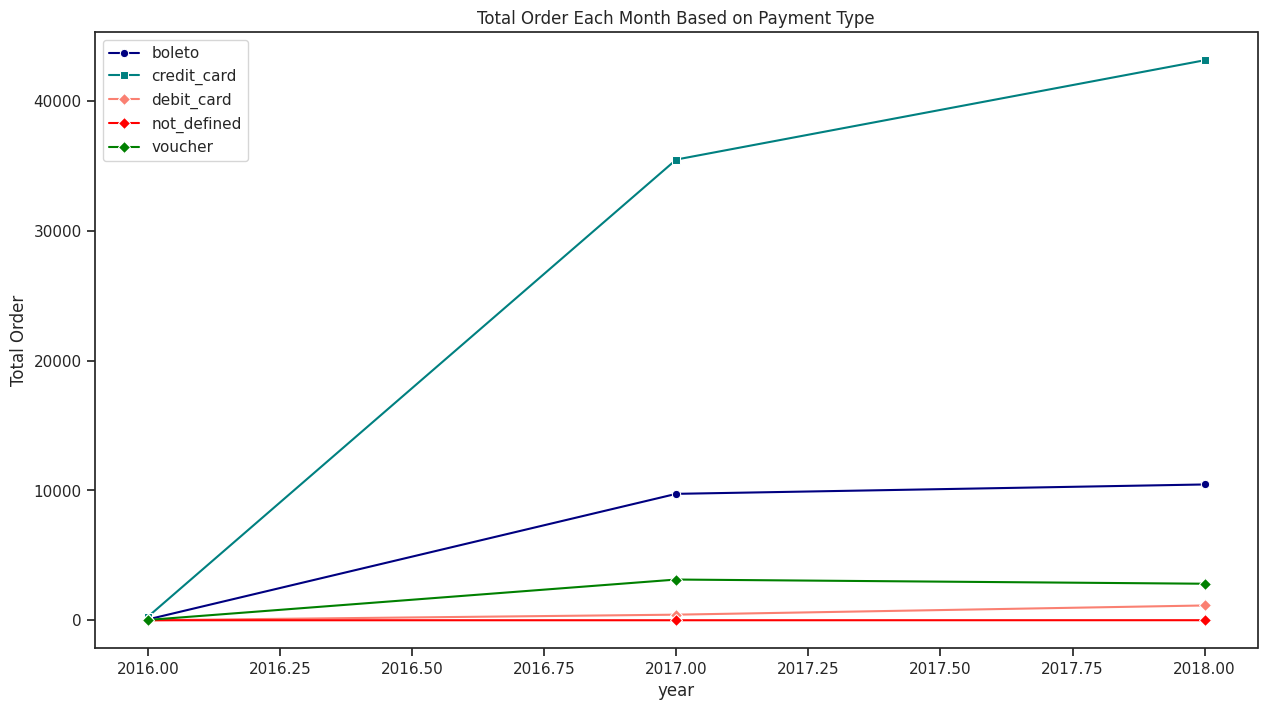

In [ ]:
#  Set the style and font sizes
sns.set_style('ticks')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(15,8))

# Create a Seaborn line plot with different markers for each product
sns.lineplot(x='year', y='boleto', data=df_pay_type_order_year, marker='o', color='navy', label='boleto')
sns.lineplot(x='year', y='credit_card', data=df_pay_type_order_year, marker='s', color='teal', label='credit_card')
sns.lineplot(x='year', y='debit_card', data=df_pay_type_order_year, marker='D', color='salmon', label='debit_card')
sns.lineplot(x='year', y='not_defined', data=df_pay_type_order_year, marker='D', color='red', label='not_defined')
sns.lineplot(x='year', y='voucher', data=df_pay_type_order_year, marker='D', color='green', label='voucher')

# Set plot title and axes labels
plt.title('Total Order Each Month Based on Payment Type')
plt.xlabel('year')
plt.ylabel('Total Order')

# Add a legend
plt.legend(loc='upper left')

# # Add a grid
# plt.grid(True)

# # Remove the top and right spines
# sns.despine()

# Show the plot
plt.show()

## Annual & Monthly Total Revenue Pada Top 5 City

In [ ]:
# Customer City
df_sale_city = df_cleaned.copy()
df_sale_city['year'] = df_sale_city['order_purchase_timestamp'].dt.year
df_sale_city['month_year'] = df_sale_city['order_purchase_timestamp'].dt.to_period('M')
df_sale_city = df_sale_city.groupby(['year',
                                     'month_year',
                                     'customer_city']).agg(total_revenue = ('payment_value','sum'))

df_sale_city.head()

# First way
# df_sale_city['payment_value'].groupby('year', group_keys=False).nlargest(3)

# second way
# g = df_sale_city['payment_value'].groupby('year', group_keys=False)
# res = g.apply(lambda x: x.sort_values(ascending=False).head(3))
# res

# third way
# df_sale_city.reset_index(inplace=True)
# df_sale_city.sort_values(['year','payment_value'],ascending=False).groupby('customer_city').head(3)




total_revenue
year month_year customer_city                     
2016 2016-09    boa vista                   272.46
                passo fundo                  75.06
                sao jose dos campos          40.95
     2016-10    alem paraiba                 89.38
                ananindeua                  237.45

### Total Revenue Top 5 City per Tahun

In [ ]:
# fourth way
df_sale_city_year = df_sale_city.groupby(['year']).apply(lambda x: (x.groupby('customer_city')
                                      .sum()
                                      .sort_values('total_revenue', ascending=False))
                                     .head(5))
df_sale_city_year

total_revenue
year customer_city                
2016 rio de janeiro        8848.50
     sao paulo             5224.42
     belo horizonte        1933.66
     quissama              1400.74
     porto alegre          1276.09
2017 sao paulo           959399.55
     rio de janeiro      597392.16
     belo horizonte      186993.54
     brasilia            167773.31
     porto alegre        114307.43
2018 sao paulo          1360727.41
     rio de janeiro      597079.01
     belo horizonte      246582.03
     brasilia            204686.48
     curitiba            150513.81

In [ ]:
# reset index
df_sale_city_year.reset_index(inplace=True)
# urutkan dari tahun dan total revenue terkecil
df_sale_city_year = df_sale_city_year.sort_values(['year','total_revenue'], ascending=True)
df_sale_city_year

year   customer_city  total_revenue
4   2016    porto alegre        1276.09
3   2016        quissama        1400.74
2   2016  belo horizonte        1933.66
1   2016       sao paulo        5224.42
0   2016  rio de janeiro        8848.50
9   2017    porto alegre      114307.43
8   2017        brasilia      167773.31
7   2017  belo horizonte      186993.54
6   2017  rio de janeiro      597392.16
5   2017       sao paulo      959399.55
14  2018        curitiba      150513.81
13  2018        brasilia      204686.48
12  2018  belo horizonte      246582.03
11  2018  rio de janeiro      597079.01
10  2018       sao paulo     1360727.41

<Axes: xlabel='year', ylabel='total_revenue'>

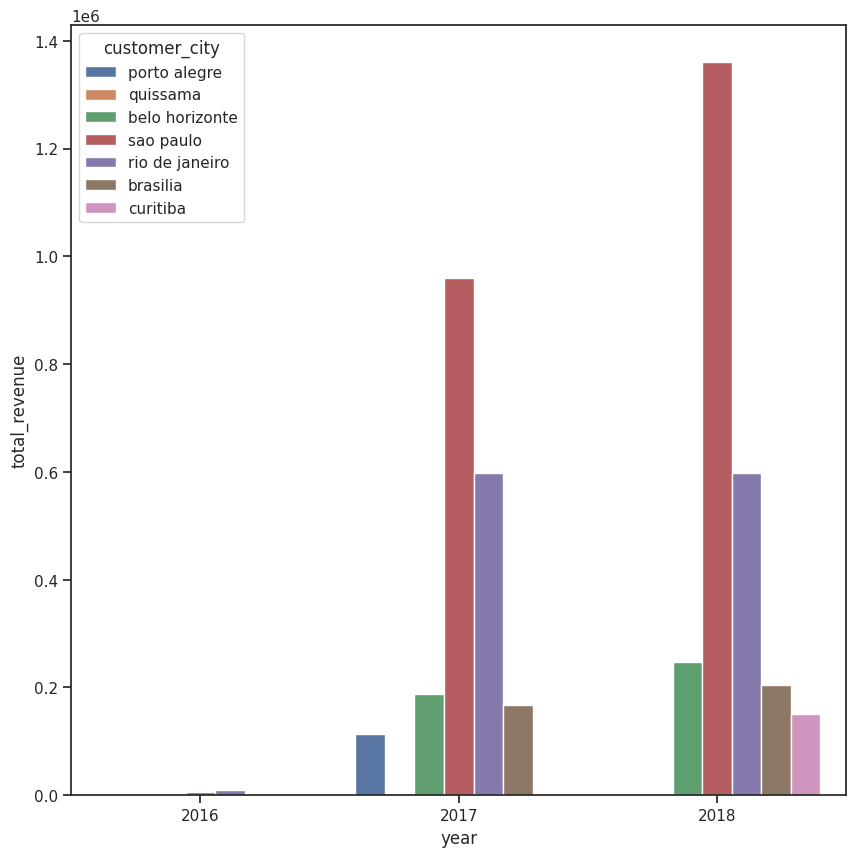

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.barplot(
              x='year',
              y='total_revenue',
              hue='customer_city',
              data=df_sale_city_year,
              ax=ax
            )

### Total Revenue Top 3 City per Bulan

In [ ]:
df_sale_city_month = df_sale_city.groupby(['month_year']).apply(lambda x: (x.groupby('customer_city')
                                      .sum()
                                      .sort_values('total_revenue', ascending=False))
                                     .head(3))
df_sale_city_month

total_revenue
month_year customer_city                     
2016-09    boa vista                   272.46
           passo fundo                  75.06
           sao jose dos campos          40.95
2016-10    rio de janeiro             8848.50
           sao paulo                  5224.42
...                                       ...
2018-09    mafra                       414.04
           belo horizonte              390.70
2018-10    picos                       222.03
           registro                    197.55
           sorocaba                     89.71

[73 rows x 1 columns]

In [ ]:
# reset index
df_sale_city_month.reset_index(inplace=True)
# urutkan dari tahun dan total revenue terkecil
df_sale_city_month = df_sale_city_month.sort_values(['month_year','total_revenue'], ascending=True)
df_sale_city_month

month_year        customer_city  total_revenue
2     2016-09  sao jose dos campos          40.95
1     2016-09          passo fundo          75.06
0     2016-09            boa vista         272.46
5     2016-10       belo horizonte        1933.66
4     2016-10            sao paulo        5224.42
..        ...                  ...            ...
68    2018-09                mafra         414.04
67    2018-09         praia grande        2266.61
72    2018-10             sorocaba          89.71
71    2018-10             registro         197.55
70    2018-10                picos         222.03

[73 rows x 3 columns]

In [ ]:
# # Mengubah data type month_year dari period[M] ke int
# df_sale_city_month['month_year'] = df_sale_city_month['month_year'].astype(int)
# # df_sale_city_month['month_year'] = pd.to_datetime(df_sale_city_month['month_year'])
# df_sale_city_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 2 to 70
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_year     73 non-null     int64  
 1   customer_city  73 non-null     object 
 2   total_revenue  73 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
# Ambil tahun 2018
df_sale_city_month_2018 = df_sale_city_month[df_sale_city_month['month_year'] >= '2018-01']
df_sale_city_month_2018

month_year   customer_city  total_revenue
45    2018-01  belo horizonte       31190.40
44    2018-01  rio de janeiro       86589.23
43    2018-01       sao paulo      155875.41
48    2018-02  belo horizonte       26114.32
47    2018-02  rio de janeiro       74688.78
46    2018-02       sao paulo      144593.51
51    2018-03  belo horizonte       37222.07
50    2018-03  rio de janeiro       70393.92
49    2018-03       sao paulo      183577.14
54    2018-04  belo horizonte       30998.96
53    2018-04  rio de janeiro       81366.54
52    2018-04       sao paulo      178706.71
57    2018-05        brasilia       30352.09
56    2018-05  rio de janeiro       80058.07
55    2018-05       sao paulo      197329.52
60    2018-06  belo horizonte       34575.15
59    2018-06  rio de janeiro       62417.42
58    2018-06       sao paulo      152098.93
63    2018-07        brasilia       27615.70
62    2018-07  rio de janeiro       67058.56
61    2018-07       sao paulo      158401.12
66    2018-08  belo horizonte       31352.88
65    2018-08  rio de janeiro       74455.32
64    2018-08       sao paulo      189871.48
69    2018-09  belo horizonte         390.70
68    2018-09           mafra         414.04
67    2018-09    praia grande        2266.61
72    2018-10        sorocaba          89.71
71    2018-10        registro         197.55
70    2018-10           picos         222.03

<Axes: xlabel='month_year', ylabel='total_revenue'>

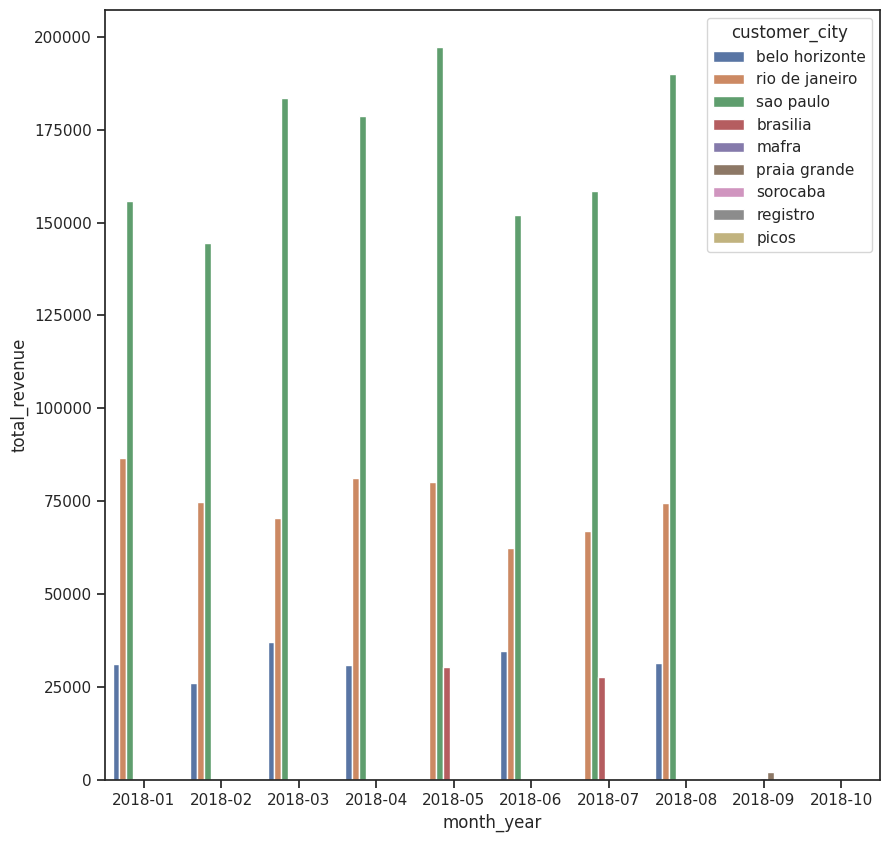

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.barplot(
              x='month_year',
              y='total_revenue',
              hue='customer_city',
              data=df_sale_city_month_2018,
              ax=ax
            )

## Annual & Monthly Total Revenue Top 5Product Category

In [ ]:
df_cleaned.head(3)

Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  e481f51cbdc54678b7cc49136f2d6af7   
2           2  e481f51cbdc54678b7cc49136f2d6af7   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   

   price product_category_name  payment_sequential payment_type  \
0  29.99            housewares                 1.0  credit_card   
1  29.99            housewares                 2.0      voucher   
2  29.99            housewares                 3.0      voucher   

   payment_installments  payment_value                customer_unique_id  \
0                   1.0          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                   1.0          18.59  7c396fd4830fd04220f754e42b4e5bff   
2                   1.0           2.00  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix customer_city customer_state  
0                      3149     sao paulo             SP  
1                      3149     sao paulo             SP  
2                      3149     sao paulo             SP

In [ ]:
# product
df_prod = df_cleaned.copy()
df_prod['year'] = df_prod['order_purchase_timestamp'].dt.year
df_prod['month_year'] = df_prod['order_purchase_timestamp'].dt.to_period('M')
df_prod = df_prod.groupby(['year',
                          'month_year',
                          'product_category_name']).agg(total_revenue = ('payment_value','sum'))

df_prod.head()

# First way
# df_prod['payment_value'].groupby('year', group_keys=False).nlargest(3)

# second way
# g = df_prod['payment_value'].groupby('year', group_keys=False)
# res = g.apply(lambda x: x.sort_values(ascending=False).head(3))
# res

# third way
# df_prod.reset_index(inplace=True)
# df_prod.sort_values(['year','payment_value'],ascending=False).groupby('product_category_name').head(3)




total_revenue
year month_year product_category_name               
2016 2016-09    bed_bath_table                 40.95
                furniture_decor               272.46
                telephony                      75.06
     2016-10    air_conditioning             1904.91
                audio                         183.03

### Total Revenue Top 5 product_category_name

In [ ]:
# fourth way
df_prod_year = df_prod.groupby(['year']).apply(lambda x: (x.groupby('product_category_name')
                                      .sum()
                                      .sort_values('total_revenue', ascending=False))
                                     .head(5))
df_prod_year

total_revenue
year product_category_name               
2016 furniture_decor              8266.99
     perfumery                    6303.68
     health_beauty                5502.14
     toys                         4986.08
     consoles_games               4089.42
2017 bed_bath_table             883605.24
     health_beauty              565931.40
     sports_leisure             548603.85
     watches_gifts              543197.88
     computers_accessories      490828.39
2018 health_beauty              907406.85
     bed_bath_table             872110.44
     watches_gifts              793229.99
     sports_leisure             643030.65
     computers_accessories      630958.95

In [ ]:
# reset index
df_prod_year.reset_index(inplace=True)
# urutkan dari tahun dan total revenue terkecil
df_prod_year = df_prod_year.sort_values(['year','total_revenue'], ascending=True)
df_prod_year

year  product_category_name  total_revenue
4   2016         consoles_games        4089.42
3   2016                   toys        4986.08
2   2016          health_beauty        5502.14
1   2016              perfumery        6303.68
0   2016        furniture_decor        8266.99
9   2017  computers_accessories      490828.39
8   2017          watches_gifts      543197.88
7   2017         sports_leisure      548603.85
6   2017          health_beauty      565931.40
5   2017         bed_bath_table      883605.24
14  2018  computers_accessories      630958.95
13  2018         sports_leisure      643030.65
12  2018          watches_gifts      793229.99
11  2018         bed_bath_table      872110.44
10  2018          health_beauty      907406.85

<Axes: xlabel='year', ylabel='total_revenue'>

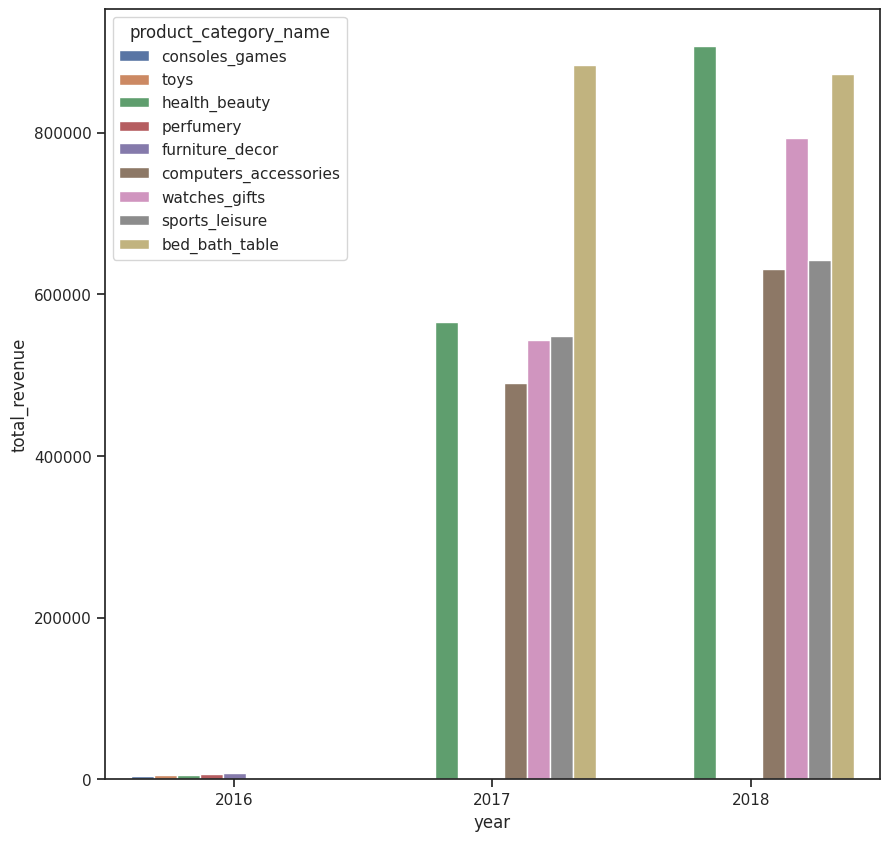

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.barplot(
              x='year',
              y='total_revenue',
              hue='product_category_name',
              data=df_prod_year,
              ax=ax
            )

### Total Revenue Top 3 product_category_name per bulan

In [ ]:
df_prod_month = df_prod.groupby(['month_year']).apply(lambda x: (x.groupby('product_category_name')
                                      .sum()
                                      .sort_values('total_revenue', ascending=False))
                                     .head(3))
df_prod_month

total_revenue
month_year product_category_name                                 
2016-09    furniture_decor                                 272.46
           telephony                                        75.06
           bed_bath_table                                   40.95
2016-10    furniture_decor                                7994.53
           perfumery                                      6303.68
...                                                           ...
2018-08    bed_bath_table                               104909.17
           watches_gifts                                 83292.02
2018-09    bed_bath_table                                 4273.08
           kitchen_dining_laundry_garden_furniture         166.46
2018-10    bed_bath_table                                  589.67

[70 rows x 1 columns]

In [ ]:
# reset index
df_prod_month.reset_index(inplace=True)
# urutkan dari tahun dan total revenue terkecil
df_prod_month = df_prod_month.sort_values(['month_year','total_revenue'], ascending=True)
df_prod_month

month_year                    product_category_name  total_revenue
2     2016-09                           bed_bath_table          40.95
1     2016-09                                telephony          75.06
0     2016-09                          furniture_decor         272.46
5     2016-10                            health_beauty        5502.14
4     2016-10                                perfumery        6303.68
..        ...                                      ...            ...
65    2018-08                           bed_bath_table      104909.17
64    2018-08                            health_beauty      140600.14
68    2018-09  kitchen_dining_laundry_garden_furniture         166.46
67    2018-09                           bed_bath_table        4273.08
69    2018-10                           bed_bath_table         589.67

[70 rows x 3 columns]

In [ ]:
# # Mengubah data type month_year dari period[M] ke int
# df_sale_city_month['month_year'] = df_sale_city_month['month_year'].astype(int)
# # df_sale_city_month['month_year'] = pd.to_datetime(df_sale_city_month['month_year'])
# df_sale_city_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 2 to 70
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_year     73 non-null     int64  
 1   customer_city  73 non-null     object 
 2   total_revenue  73 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
# Ambil tahun 2018
df_prod_month_2018 = df_prod_month[df_prod_month['month_year'] >= '2018-01']
df_prod_month_2018

month_year                    product_category_name  total_revenue
45    2018-01                    computers_accessories      105831.48
44    2018-01                           sports_leisure      109740.18
43    2018-01                           bed_bath_table      141248.96
48    2018-02                           bed_bath_table       97181.96
47    2018-02                            health_beauty       99563.04
46    2018-02                    computers_accessories      125692.37
51    2018-03                    computers_accessories      105031.84
50    2018-03                            watches_gifts      108157.74
49    2018-03                           bed_bath_table      117395.74
54    2018-04                            watches_gifts      104304.17
53    2018-04                            health_beauty      108666.24
52    2018-04                           bed_bath_table      110604.53
57    2018-05                           bed_bath_table      104153.08
56    2018-05                            health_beauty      115660.82
55    2018-05                            watches_gifts      135989.99
60    2018-06                            watches_gifts       98725.54
59    2018-06                           bed_bath_table      101892.11
58    2018-06                            health_beauty      127536.67
63    2018-07                           bed_bath_table       89862.14
62    2018-07                            watches_gifts      109133.55
61    2018-07                            health_beauty      125979.53
66    2018-08                            watches_gifts       83292.02
65    2018-08                           bed_bath_table      104909.17
64    2018-08                            health_beauty      140600.14
68    2018-09  kitchen_dining_laundry_garden_furniture         166.46
67    2018-09                           bed_bath_table        4273.08
69    2018-10                           bed_bath_table         589.67

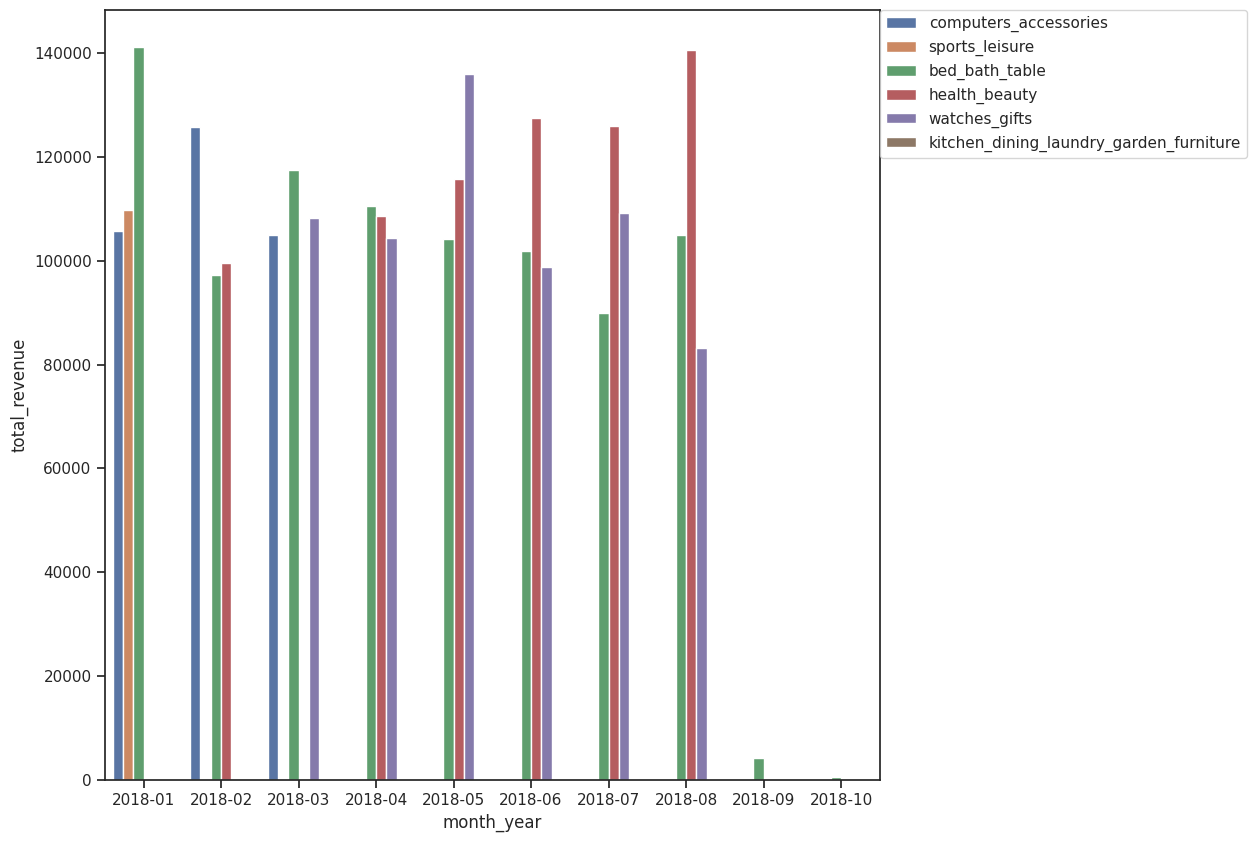

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.barplot(
              x='month_year',
              y='total_revenue',
              hue='product_category_name',
              data=df_prod_month_2018,
              ax=ax
            )
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
plt.show()

## Annual & Monthly Customer Activity Growth Analysis

In [ ]:
# Melihat jumlah customer lewat customer id
df_cleaned['customer_id'].nunique()

95143

In [ ]:
# Melihat jumlah customer lewat customer unique id
df_cleaned['customer_unique_id'].nunique()

92095

In [ ]:
# Melihat jumlah order
df_cleaned['order_id'].nunique()

95143

### Rata-rata monthly active user per tahun

In [ ]:
# Rata-rata monthly active user per tahun
mau = df_cleaned.copy()
mau = df_cleaned.groupby(['order_purchase_timestamp']).agg(total_user=('customer_unique_id', 'count'))
mau.reset_index(inplace=True)
mau.head()

order_purchase_timestamp  total_user
0      2016-09-04 21:15:19           2
1      2016-09-05 00:15:34           1
2      2016-09-13 15:24:19           1
3      2016-10-02 22:07:52           1
4      2016-10-03 09:44:50           1

In [ ]:
# Menambahkan kolom year dan month_year
mau['year'] = mau['order_purchase_timestamp'].dt.year
mau['month_year'] = mau['order_purchase_timestamp'].dt.to_period('M')

In [ ]:
mau.head()

order_purchase_timestamp  total_user  year month_year
0      2016-09-04 21:15:19           2  2016    2016-09
1      2016-09-05 00:15:34           1  2016    2016-09
2      2016-09-13 15:24:19           1  2016    2016-09
3      2016-10-02 22:07:52           1  2016    2016-10
4      2016-10-03 09:44:50           1  2016    2016-10

In [ ]:
# Total Active User setiap bulan
mau_monthly = mau.groupby(['year','month_year']).agg(total_user_mau=('total_user', np.sum))
mau_monthly.reset_index(inplace=True)
mau_monthly = mau_monthly.sort_values('month_year', ascending=True)
mau_monthly

year month_year  total_user_mau
0   2016    2016-09               4
1   2016    2016-10             350
2   2016    2016-12               1
3   2017    2017-01             869
4   2017    2017-02            1930
5   2017    2017-03            2898
6   2017    2017-04            2620
7   2017    2017-05            4055
8   2017    2017-06            3503
9   2017    2017-07            4454
10  2017    2017-08            4697
11  2017    2017-09            4623
12  2017    2017-10            5012
13  2017    2017-11            8086
14  2017    2017-12            6058
15  2018    2018-01            7813
16  2018    2018-02            7078
17  2018    2018-03            7686
18  2018    2018-04            7432
19  2018    2018-05            7333
20  2018    2018-06            6623
21  2018    2018-07            6675
22  2018    2018-08            6909
23  2018    2018-09              16
24  2018    2018-10               4

In [ ]:
# Rata-rata active user setiap bulan per tahun
avg_mau_yearly = mau_monthly.groupby('year').agg(avg_mau=('total_user_mau', np.mean))
avg_mau_yearly.reset_index(inplace=True)
avg_mau_yearly = avg_mau_yearly.sort_values('year', ascending=True)
avg_mau_yearly

year      avg_mau
0  2016   118.333333
1  2017  4067.083333
2  2018  5756.900000

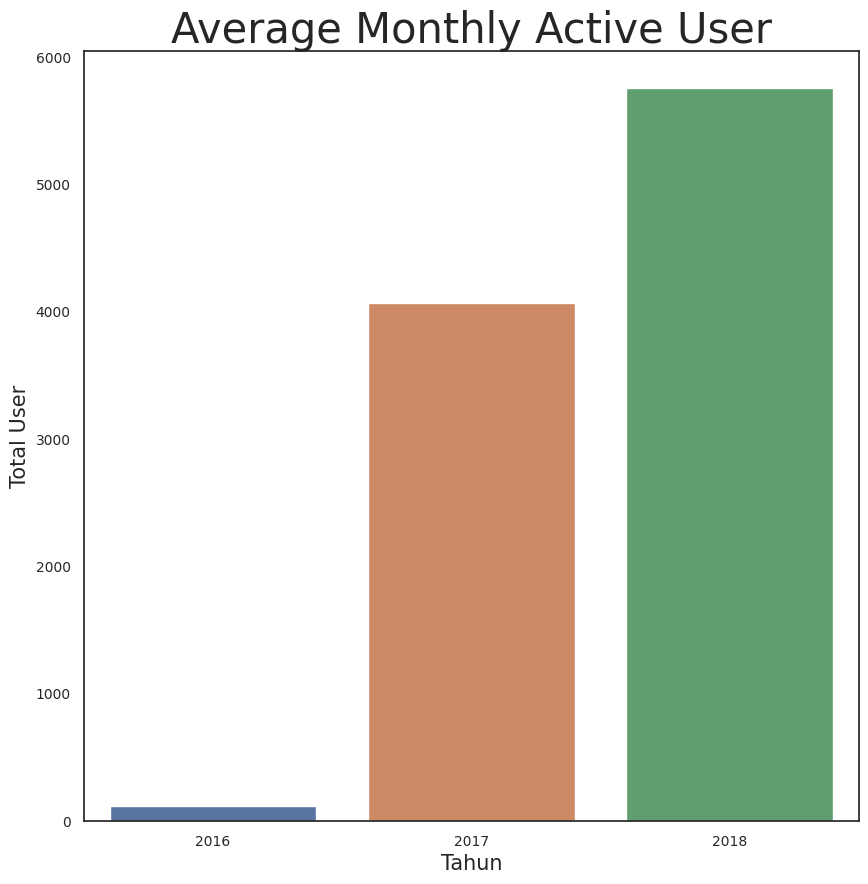

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
plot = sns.barplot(
              x='year',
              y='avg_mau',
              data=avg_mau_yearly,
              ax=ax
            )
plot.axes.set_title("Average Monthly Active User",fontsize=30)
plot.set_xlabel("Tahun",fontsize=15)
plot.set_ylabel("Total User",fontsize=15)
plot.tick_params(labelsize=10)
sns.set_theme(style='white', font_scale=1)

### New Total Customer Each Month & year

In [ ]:
cust_first_order = df_cleaned.copy()
cust_first_order = cust_first_order.groupby('customer_unique_id').agg(first_date_purchase=('order_purchase_timestamp','min'))
cust_first_order.head()

first_date_purchase
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42

In [ ]:
# Total New Customer Each Year
cust_first_order['year'] = cust_first_order['first_date_purchase'].dt.year

first_order_yearly = cust_first_order.groupby('year').agg(Total_new_customer=('customer_unique_id','count'))
first_order_yearly.reset_index(inplace=True)
first_order_yearly

year  Total_new_customer
0  2016                 325
1  2017               43708
2  2018               52062

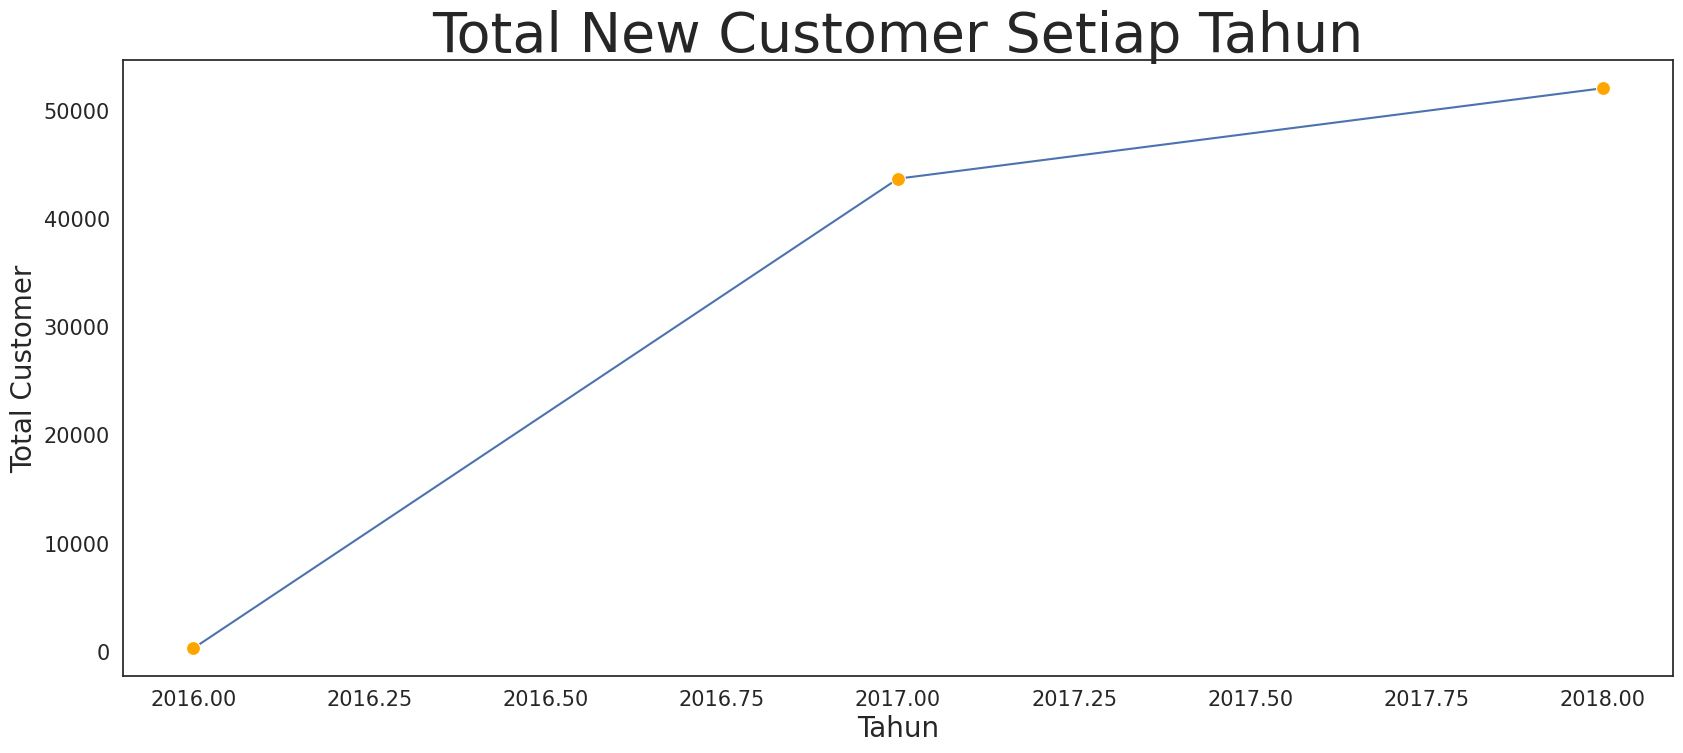

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='year', y='Total_new_customer', data=first_order_yearly,
             marker='o', markerfacecolor='orange', markersize=10)
plot.axes.set_title("Total New Customer Setiap Tahun",fontsize=40)
plot.set_xlabel("Tahun",fontsize=20)
plot.set_ylabel("Total Customer",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
# Total New Customer Each Month
cust_first_order.reset_index(inplace=True)
cust_first_order['month_year'] = cust_first_order['first_date_purchase'].dt.to_period('M')

first_order_monthly = cust_first_order.groupby('month_year').agg(Total_new_customer=('customer_unique_id','count'))
first_order_monthly.reset_index(inplace=True)
first_order_monthly

month_year  Total_new_customer
0     2016-09                   3
1     2016-10                 321
2     2016-12                   1
3     2017-01                 764
4     2017-02                1752
5     2017-03                2636
6     2017-04                2352
7     2017-05                3596
8     2017-06                3139
9     2017-07                3894
10    2017-08                4184
11    2017-09                4130
12    2017-10                4470
13    2017-11                7304
14    2017-12                5487
15    2018-01                7025
16    2018-02                6451
17    2018-03                6965
18    2018-04                6711
19    2018-05                6622
20    2018-06                5940
21    2018-07                6071
22    2018-08                6271
23    2018-09                   5
24    2018-10                   1

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
first_order_monthly['month_year'] = first_order_monthly['month_year'].astype(str)
first_order_monthly['month_year'] = pd.to_datetime(first_order_monthly['month_year'])
first_order_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month_year          25 non-null     datetime64[ns]
 1   Total_new_customer  25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


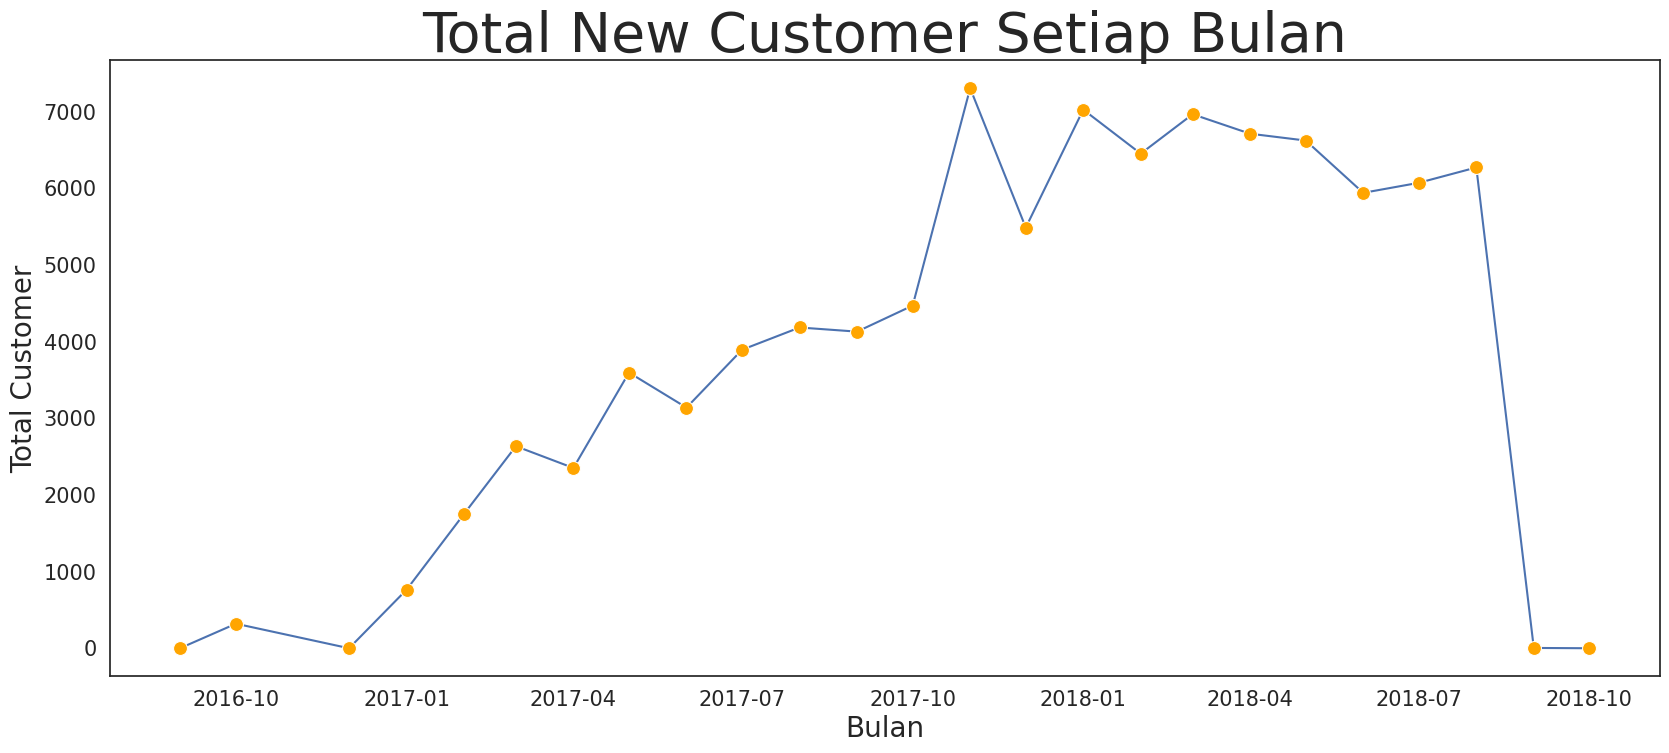

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='month_year', y='Total_new_customer', data=first_order_monthly,
             marker='o', markerfacecolor='orange', markersize=10)
plot.axes.set_title("Total New Customer Setiap Bulan",fontsize=40)
plot.set_xlabel("Bulan",fontsize=20)
plot.set_ylabel("Total Customer",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

### Customer Repeat Order Each Month & year

In [ ]:
cust_order = df_cleaned.copy()
cust_order = cust_order.groupby(['customer_unique_id',
                                 'order_purchase_timestamp']).agg(Total_order=('order_id','count'))
cust_order.head()

Total_order
customer_unique_id               order_purchase_timestamp             
0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27                 1
0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27                 1
0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03                 1
0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41                 1
0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42                 1

In [ ]:
cust_order.reset_index(inplace=True)
cust_order['month_year'] = cust_order['order_purchase_timestamp'].dt.to_period('M')
cust_order['year'] = cust_order['order_purchase_timestamp'].dt.year

cust_order.head()

customer_unique_id order_purchase_timestamp  Total_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27            1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27            1   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03            1   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41            1   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42            1   

  month_year  year  
0    2018-05  2018  
1    2018-05  2018  
2    2017-03  2017  
3    2017-10  2017  
4    2017-11  2017

In [ ]:
cust_repeat_order = cust_order.groupby(['year','month_year','customer_unique_id' ]).agg(Total_repeat_order=('Total_order','sum'))
cust_repeat_order = cust_repeat_order[cust_repeat_order['Total_repeat_order'] > 1]
cust_repeat_order.reset_index(inplace=True)
cust_repeat_order.head()

year month_year                customer_unique_id  Total_repeat_order
0  2016    2016-09  b7d76e111c89f7ebf14761390f0f7d17                   2
1  2016    2016-10  0ecf7f65b5ff3b9e61b637e59f495e0a                   2
2  2016    2016-10  1881f0742867dc75d6e0bcc24f866710                   2
3  2016    2016-10  221234182f828fb9f2a4ba9c89874ede                   2
4  2016    2016-10  2f96790fba243100730c8d1185dd2f25                   2

In [ ]:
total_cust_ro_monthly = cust_repeat_order.groupby(['month_year']).agg(cust_repeat_order=('customer_unique_id','count'))
total_cust_ro_monthly.reset_index(inplace=True)
total_cust_ro_monthly

month_year  cust_repeat_order
0     2016-09                  1
1     2016-10                 22
2     2017-01                 63
3     2017-02                119
4     2017-03                173
5     2017-04                165
6     2017-05                298
7     2017-06                219
8     2017-07                326
9     2017-08                315
10    2017-09                291
11    2017-10                346
12    2017-11                508
13    2017-12                331
14    2018-01                500
15    2018-02                417
16    2018-03                443
17    2018-04                421
18    2018-05                391
19    2018-06                380
20    2018-07                371
21    2018-08                344
22    2018-09                  2

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
total_cust_ro_monthly['month_year'] = total_cust_ro_monthly['month_year'].astype(str)
total_cust_ro_monthly['month_year'] = pd.to_datetime(total_cust_ro_monthly['month_year'])
total_cust_ro_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month_year         23 non-null     datetime64[ns]
 1   cust_repeat_order  23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 496.0 bytes


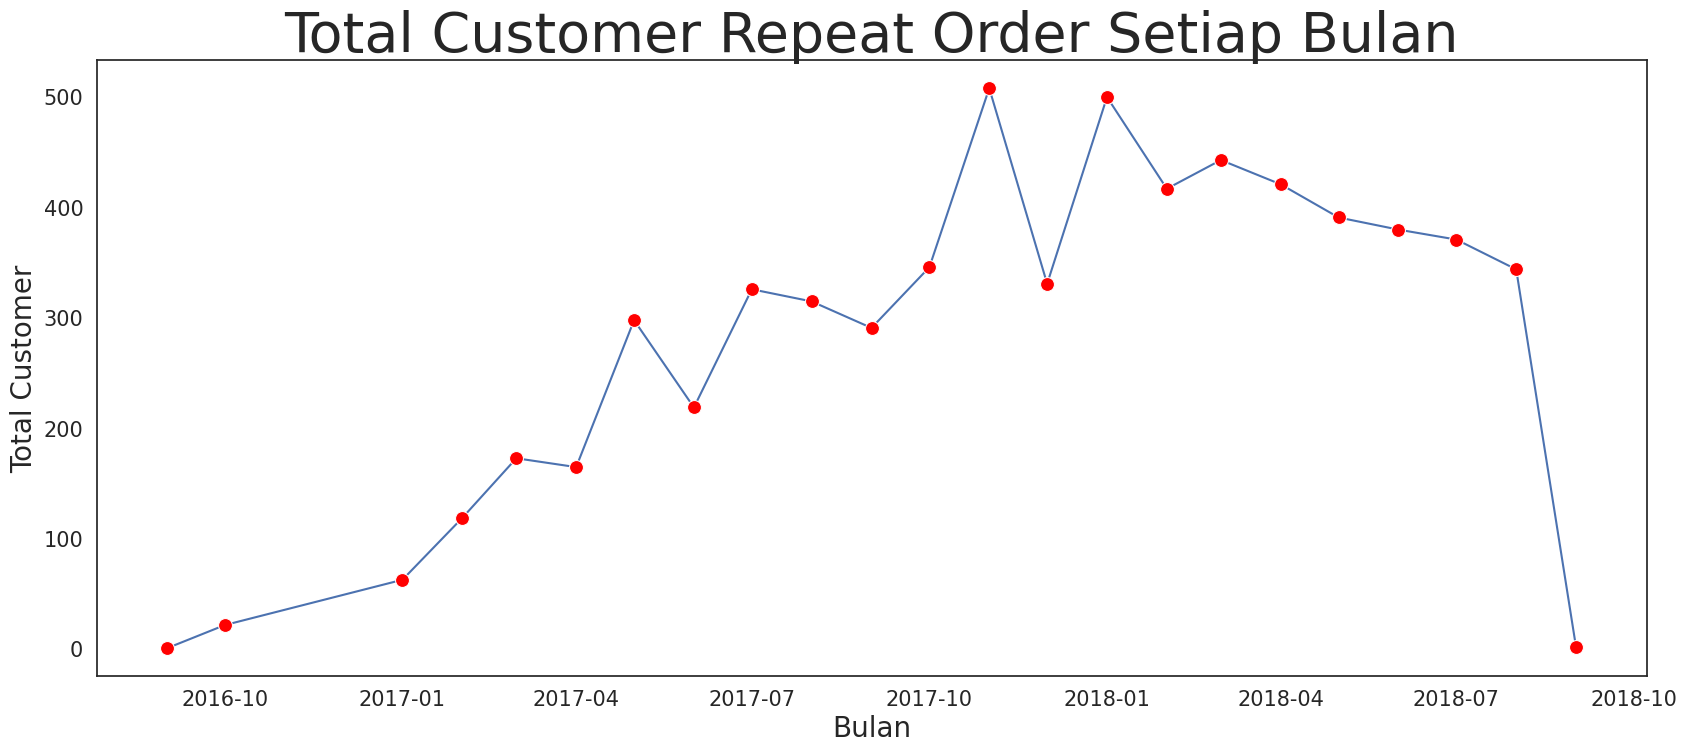

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='month_year', y='cust_repeat_order', data=total_cust_ro_monthly,
             marker='o', markerfacecolor='red', markersize=10)
plot.axes.set_title("Total Customer Repeat Order Setiap Bulan",fontsize=40)
plot.set_xlabel("Bulan",fontsize=20)
plot.set_ylabel("Total Customer",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
total_cust_ro_yearly = cust_repeat_order.groupby(['year']).agg(cust_repeat_order=('customer_unique_id','count'))
total_cust_ro_yearly.reset_index(inplace=True)
total_cust_ro_yearly

year  cust_repeat_order
0  2016                 23
1  2017               3154
2  2018               3269

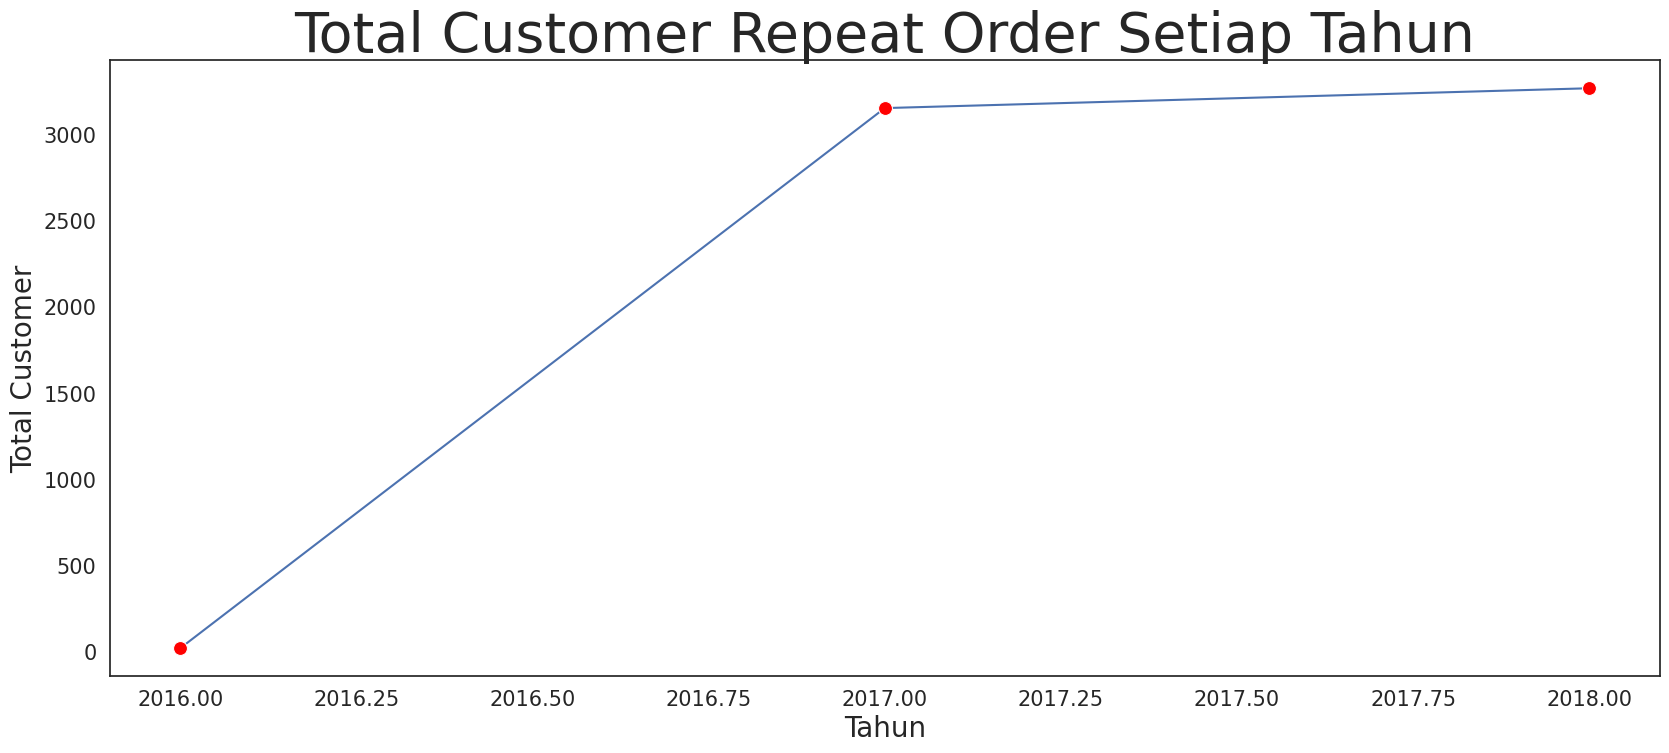

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='year', y='cust_repeat_order', data=total_cust_ro_yearly,
             marker='o', markerfacecolor='red', markersize=10)
plot.axes.set_title("Total Customer Repeat Order Setiap Tahun",fontsize=40)
plot.set_xlabel("Tahun",fontsize=20)
plot.set_ylabel("Total Customer",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

### Average customer order in each Month & year

In [ ]:
order_create = df_cleaned.copy()
order_create = order_create.groupby(['order_purchase_timestamp',
                                      'customer_unique_id']).agg(Total_order=('order_id','count'))
order_create.head()

Total_order
order_purchase_timestamp customer_unique_id                           
2016-09-04 21:15:19      b7d76e111c89f7ebf14761390f0f7d17            2
2016-09-05 00:15:34      4854e9b3feff728c13ee5fc7d1547e92            1
2016-09-13 15:24:19      009b0127b727ab0ba422f6d9604487c7            1
2016-10-02 22:07:52      0eb1ee9dba87f5b36b4613a65074337c            1
2016-10-03 09:44:50      32ea3bdedab835c3aa6cb68ce66565ef            1

In [ ]:
order_create.reset_index(inplace=True)
order_create['month_year'] = order_create['order_purchase_timestamp'].dt.to_period('M')
order_create['year'] = order_create['order_purchase_timestamp'].dt.year

order_create.head()

order_purchase_timestamp                customer_unique_id  Total_order  \
0      2016-09-04 21:15:19  b7d76e111c89f7ebf14761390f0f7d17            2   
1      2016-09-05 00:15:34  4854e9b3feff728c13ee5fc7d1547e92            1   
2      2016-09-13 15:24:19  009b0127b727ab0ba422f6d9604487c7            1   
3      2016-10-02 22:07:52  0eb1ee9dba87f5b36b4613a65074337c            1   
4      2016-10-03 09:44:50  32ea3bdedab835c3aa6cb68ce66565ef            1   

  month_year  year  
0    2016-09  2016  
1    2016-09  2016  
2    2016-09  2016  
3    2016-10  2016  
4    2016-10  2016

In [ ]:
avg_order_monthly = order_create.groupby(['month_year']).agg(average_order_per_cust=('Total_order','mean'))
avg_order_monthly.reset_index(inplace=True)
avg_order_monthly

month_year  average_order_per_cust
0     2016-09                1.333333
1     2016-10                1.080247
2     2016-12                1.000000
3     2017-01                1.095839
4     2017-02                1.086712
5     2017-03                1.082960
6     2017-04                1.093033
7     2017-05                1.101005
8     2017-06                1.082509
9     2017-07                1.111277
10    2017-08                1.090550
11    2017-09                1.082923
12    2017-10                1.085083
13    2017-11                1.075409
14    2017-12                1.071264
15    2018-01                1.077655
16    2018-02                1.056576
17    2018-03                1.069282
18    2018-04                1.072748
19    2018-05                1.067550
20    2018-06                1.076211
21    2018-07                1.065103
22    2018-08                1.061780
23    2018-09                1.000000
24    2018-10                1.000000

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
avg_order_monthly['month_year'] = avg_order_monthly['month_year'].astype(str)
avg_order_monthly['month_year'] = pd.to_datetime(avg_order_monthly['month_year'])
avg_order_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month_year              25 non-null     datetime64[ns]
 1   average_order_per_cust  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


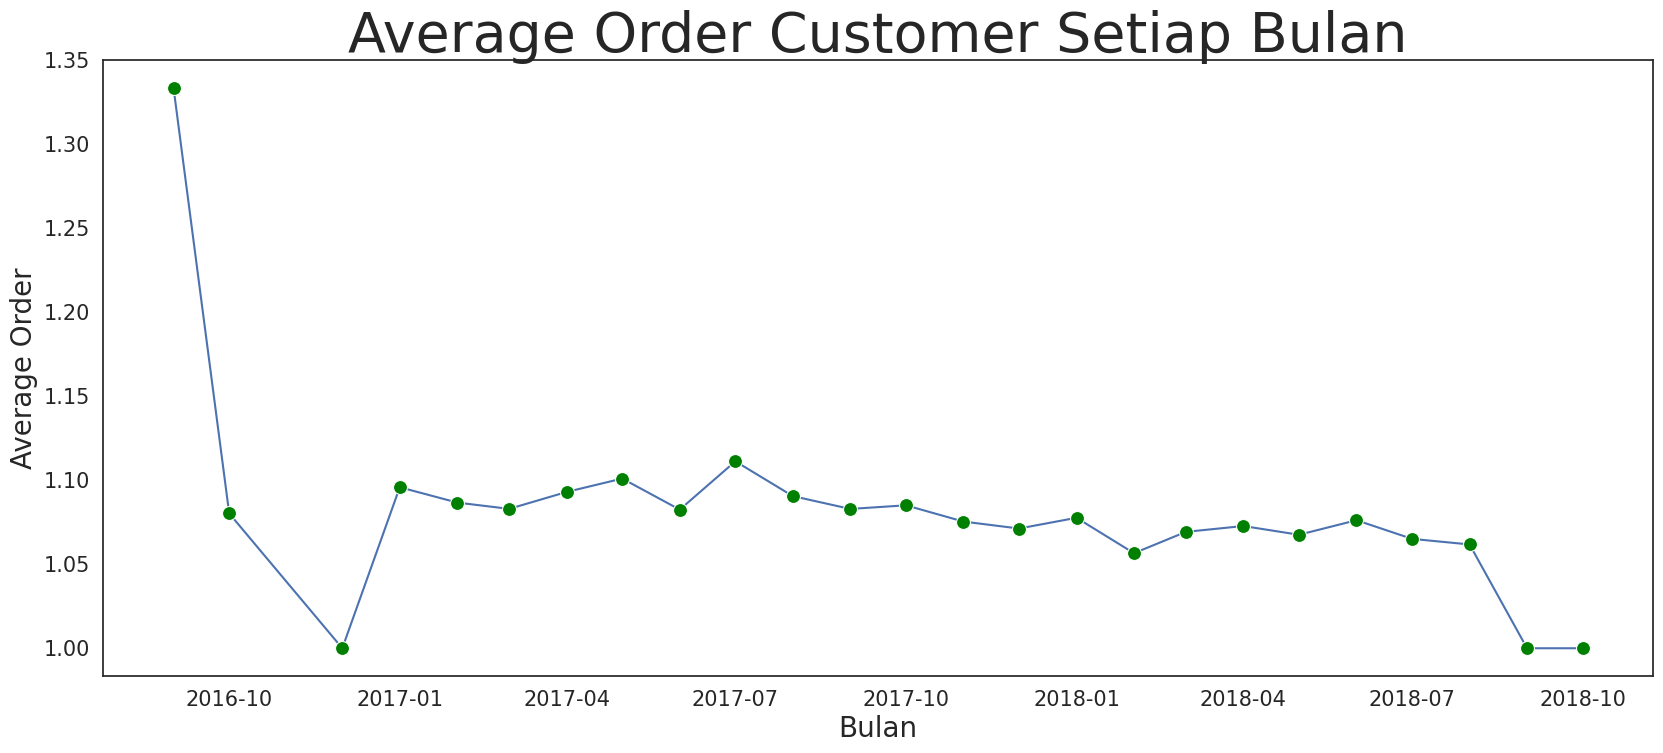

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='month_year', y='average_order_per_cust', data=avg_order_monthly,
             marker='o', markerfacecolor='green', markersize=10)
plot.axes.set_title("Average Order Customer Setiap Bulan",fontsize=40)
plot.set_xlabel("Bulan",fontsize=20)
plot.set_ylabel("Average Order",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

In [ ]:
avg_order_yearly = order_create.groupby(['year']).agg(average_order_per_cust=('Total_order','mean'))
avg_order_yearly.reset_index(inplace=True)
avg_order_yearly

year  average_order_per_cust
0  2016                1.082317
1  2017                1.086052
2  2018                1.068427

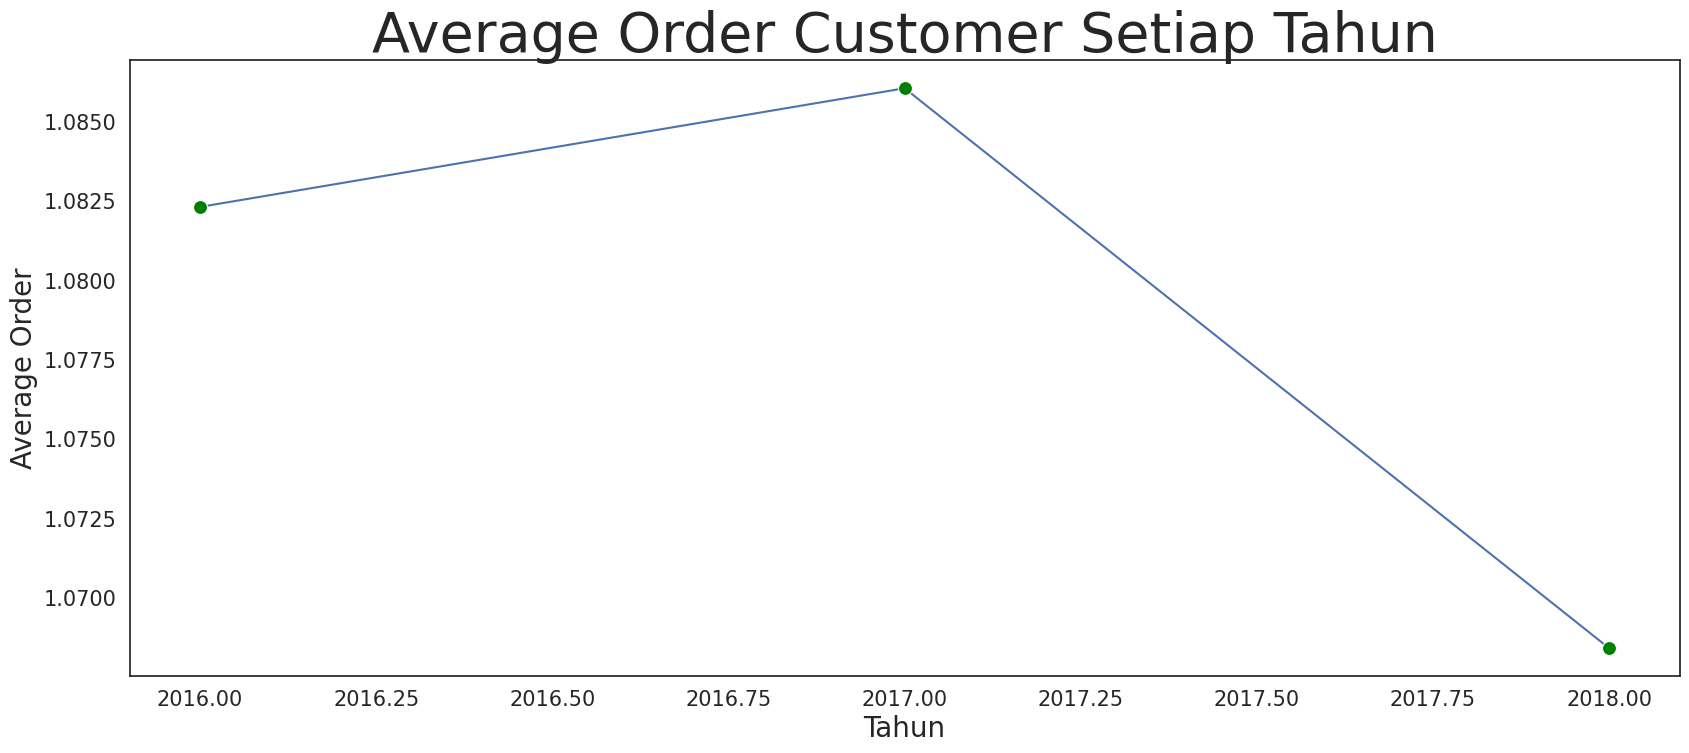

In [ ]:
# Visualisasi Data
fig = plt.subplots(figsize=(20, 8))
plot = sns.lineplot(x='year', y='average_order_per_cust', data=avg_order_yearly,
             marker='o', markerfacecolor='green', markersize=10)
plot.axes.set_title("Average Order Customer Setiap Tahun",fontsize=40)
plot.set_xlabel("Tahun",fontsize=20)
plot.set_ylabel("Average Order",fontsize=20)
plot.tick_params(labelsize=15)
sns.set_theme(style='white', font_scale=1)

### Join table-table yang sudah dibuat

In [ ]:
first_order_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month_year          25 non-null     datetime64[ns]
 1   Total_new_customer  25 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Monthly
import functools
dfs = [mau_monthly[['month_year', 'total_user_mau']],
       first_order_monthly[['month_year', 'Total_new_customer']],
       total_cust_ro_monthly[['month_year', 'cust_repeat_order']],
       avg_order_monthly[['month_year', 'average_order_per_cust']]
       ]

df_final_monthly_cust = functools.reduce(lambda left, right: pd.merge(left,right,on='month_year'), dfs)
df_final_monthly_cust

Empty DataFrame
Columns: [total_user_mau, Total_new_customer, cust_repeat_order, month_year, average_order_per_cust]
Index: []

In [ ]:
mau_monthly.head(2)

year month_year  total_user_mau
0  2016    2016-09               4
1  2016    2016-10             350

In [ ]:
first_order_monthly.head(2)

month_year  Total_new_customer
0 2016-09-01                   3
1 2016-10-01                 321

In [ ]:
total_cust_ro_monthly.head(2)

month_year  cust_repeat_order
0 2016-09-01                  1
1 2016-10-01                 22

In [ ]:
avg_order_monthly.head(2)

month_year  average_order_per_cust
0 2016-09-01                1.333333
1 2016-10-01                1.080247

In [ ]:
# yearly
import functools
dfs = [avg_mau_yearly[['year', 'avg_mau']],
       first_order_yearly[['year', 'Total_new_customer']],
       total_cust_ro_yearly[['year', 'cust_repeat_order']],
       avg_order_yearly[['year', 'average_order_per_cust']]]

df_final_yearly_cust = functools.reduce(lambda left, right: pd.merge(left,right,on='year'), dfs)
df_final_yearly_cust

year      avg_mau  Total_new_customer  cust_repeat_order  \
0  2016   118.333333                 325                 23   
1  2017  4067.083333               43708               3154   
2  2018  5756.900000               52062               3269   

   average_order_per_cust  
0                1.082317  
1                1.086052  
2                1.068427

## Compare average of sales made to first vs repeat order customer

### Customer Repeat Order

In [ ]:
# Copy dataframe awal untuk diolah data
cust_sales = df_cleaned.copy()
# Groupby customer dan order time untuk melihat total revenue dan total order
cust_sales = cust_sales.groupby(['customer_unique_id',
                                 'order_purchase_timestamp']).agg(Total_order=('order_id','count'),
                                                                  sales=('payment_value', 'sum'))
# Lihat data
cust_sales.head()

Total_order   sales
customer_unique_id               order_purchase_timestamp                     
0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27                 1  141.90
0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27                 1   27.19
0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03                 1   86.22
0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41                 1   43.62
0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42                 1  196.89

In [ ]:
# reset index hasil groupby
cust_sales.reset_index(inplace=True)
# buat kolom month_year dan year dari order_purchase_timestamp
cust_sales['month_year'] = cust_sales['order_purchase_timestamp'].dt.to_period('M')
cust_sales['year'] = cust_sales['order_purchase_timestamp'].dt.year
# Lihat data
cust_sales.head()

customer_unique_id order_purchase_timestamp  Total_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27            1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27            1   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03            1   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41            1   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42            1   

    sales month_year  year  
0  141.90    2018-05  2018  
1   27.19    2018-05  2018  
2   86.22    2017-03  2017  
3   43.62    2017-10  2017  
4  196.89    2017-11  2017

#### Average Sales Customer Repeat Order Monthly

In [ ]:
# Lihat total sales dan total order > 1
ro_sales_monthly = cust_sales.groupby(['month_year',
                                       'customer_unique_id']).agg(Total_repeat_order=('Total_order','sum'),
                                                                  sales=('sales', 'sum'))
ro_sales_monthly = ro_sales_monthly[ro_sales_monthly['Total_repeat_order'] > 1]
ro_sales_monthly.reset_index(inplace=True)
ro_sales_monthly.head()

month_year                customer_unique_id  Total_repeat_order   sales
0    2016-09  b7d76e111c89f7ebf14761390f0f7d17                   2  272.46
1    2016-10  0ecf7f65b5ff3b9e61b637e59f495e0a                   2  180.82
2    2016-10  1881f0742867dc75d6e0bcc24f866710                   2   51.05
3    2016-10  221234182f828fb9f2a4ba9c89874ede                   2  766.48
4    2016-10  2f96790fba243100730c8d1185dd2f25                   2  280.44

In [ ]:
# Average sales customer repeat order monthly
avg_sales_ro_monthly = ro_sales_monthly .groupby(['month_year']).agg(average_sales=('sales','mean'))
avg_sales_ro_monthly.reset_index(inplace=True)
avg_sales_ro_monthly

month_year  average_sales
0     2016-09     272.460000
1     2016-10     271.485000
2     2017-01     289.650476
3     2017-02     299.836975
4     2017-03     281.201445
5     2017-04     324.178303
6     2017-05     307.781779
7     2017-06     281.643151
8     2017-07     308.393712
9     2017-08     307.210127
10    2017-09     341.998282
11    2017-10     352.450809
12    2017-11     340.376299
13    2017-12     322.556012
14    2018-01     338.143620
15    2018-02     304.133621
16    2018-03     315.984086
17    2018-04     369.057981
18    2018-05     409.171253
19    2018-06     365.026368
20    2018-07     361.931132
21    2018-08     483.401424
22    2018-09     179.210000

#### Average Sales Customer Repeat Order Yearly

In [ ]:
# Lihat total sales dan total order > 1
ro_sales_yearly = cust_sales.groupby(['year',
                                      'customer_unique_id']).agg(Total_repeat_order=('Total_order','sum'),
                                                                  sales=('sales', 'sum'))
ro_sales_yearly = ro_sales_yearly[ro_sales_yearly['Total_repeat_order'] > 1]
ro_sales_yearly.reset_index(inplace=True)
ro_sales_yearly.head()


year                customer_unique_id  Total_repeat_order   sales
0  2016  0ecf7f65b5ff3b9e61b637e59f495e0a                   2  180.82
1  2016  1881f0742867dc75d6e0bcc24f866710                   2   51.05
2  2016  221234182f828fb9f2a4ba9c89874ede                   2  766.48
3  2016  2f96790fba243100730c8d1185dd2f25                   2  280.44
4  2016  30fceee7cb0dbe6926f2b1128f2b3648                   2  384.38

In [ ]:
# Average sales customer repeat order yearly
avg_sales_ro_yearly = ro_sales_yearly.groupby(['year']).agg(average_sales=('sales','mean'))
avg_sales_ro_yearly.reset_index(inplace=True)
avg_sales_ro_yearly

year  average_sales
0  2016     271.527391
1  2017     324.609505
2  2018     362.074158

### Customer One Time Order

In [ ]:
# Copy dataframe awal untuk diolah data
cust_onetime = df_cleaned.copy()
# Groupby customer dan order time untuk melihat total revenue dan total order
cust_onetime = cust_onetime.groupby(['customer_unique_id']).agg(Total_order=('order_id','count'),
                                                                sales=('payment_value', 'sum'),
                                                                order_date=('order_purchase_timestamp','min'))
# Lihat data
cust_onetime.head()

Total_order   sales          order_date
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2            1  141.90 2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f            1   27.19 2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064            1   86.22 2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078            1   43.62 2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255            1  196.89 2017-11-14 19:45:42

In [ ]:
# reset index hasil groupby
cust_onetime.reset_index(inplace=True)
# buat kolom month_year dan year dari order_date
cust_onetime['month_year'] = cust_onetime['order_date'].dt.to_period('M')
cust_onetime['year'] = cust_onetime['order_date'].dt.year
# Lihat data
cust_onetime.head()

customer_unique_id  Total_order   sales          order_date  \
0  0000366f3b9a7992bf8c76cfdf3221e2            1  141.90 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            1   27.19 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064            1   86.22 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078            1   43.62 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255            1  196.89 2017-11-14 19:45:42   

  month_year  year  
0    2018-05  2018  
1    2018-05  2018  
2    2017-03  2017  
3    2017-10  2017  
4    2017-11  2017

In [ ]:
# Pilih Customer yang hanya Total_order = 1
cust_onetime = cust_onetime[cust_onetime['Total_order'] == 1]
cust_onetime.head()

customer_unique_id  Total_order   sales          order_date  \
0  0000366f3b9a7992bf8c76cfdf3221e2            1  141.90 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            1   27.19 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064            1   86.22 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078            1   43.62 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255            1  196.89 2017-11-14 19:45:42   

  month_year  year  
0    2018-05  2018  
1    2018-05  2018  
2    2017-03  2017  
3    2017-10  2017  
4    2017-11  2017

#### Average Sales Customer One Time Order Monthly

In [ ]:
# Group by customer one time berdasarkan month_year
ot_sales_monthly = cust_onetime.groupby(['month_year']).agg(average_sales=('sales', 'mean'))
ot_sales_monthly.reset_index(inplace=True)
ot_sales_monthly

month_year  average_sales
0     2016-09      58.005000
1     2016-10     186.100172
2     2017-01     179.241985
3     2017-02     164.764053
4     2017-03     168.132686
5     2017-04     170.487768
6     2017-05     159.330060
7     2017-06     158.390000
8     2017-07     144.664015
9     2017-08     155.261663
10    2017-09     168.008294
11    2017-10     166.920820
12    2017-11     156.546385
13    2017-12     153.163421
14    2018-01     151.118321
15    2018-02     146.420079
16    2018-03     160.485854
17    2018-04     165.586004
18    2018-05     164.660213
19    2018-06     163.250800
20    2018-07     166.422593
21    2018-08     151.648043
22    2018-09     615.270000
23    2018-10      89.710000

#### Average Sales Customer One Time Order Yearly

In [ ]:
# Group by customer one time berdasarkan year
ot_sales_yearly = cust_onetime.groupby(['year']).agg(average_sales=('sales', 'mean'))
ot_sales_yearly.reset_index(inplace=True)
ot_sales_yearly

year  average_sales
0  2016     185.225802
1  2017     159.595427
2  2018     158.675730

### Lihat Perbandingan average_sales repeat order customer dan one time order customer

#### Monthly

In [ ]:
# Monthly
import functools
dfs = [avg_sales_ro_monthly[['month_year', 'average_sales']],
       ot_sales_monthly[['month_year', 'average_sales']]]

df_monthly_avg_sales_cust = functools.reduce(lambda left, right: pd.merge(left,right,on='month_year'), dfs)
df_monthly_avg_sales_cust

month_year  average_sales_x  average_sales_y
0     2016-09       272.460000        58.005000
1     2016-10       271.485000       186.100172
2     2017-01       289.650476       179.241985
3     2017-02       299.836975       164.764053
4     2017-03       281.201445       168.132686
5     2017-04       324.178303       170.487768
6     2017-05       307.781779       159.330060
7     2017-06       281.643151       158.390000
8     2017-07       308.393712       144.664015
9     2017-08       307.210127       155.261663
10    2017-09       341.998282       168.008294
11    2017-10       352.450809       166.920820
12    2017-11       340.376299       156.546385
13    2017-12       322.556012       153.163421
14    2018-01       338.143620       151.118321
15    2018-02       304.133621       146.420079
16    2018-03       315.984086       160.485854
17    2018-04       369.057981       165.586004
18    2018-05       409.171253       164.660213
19    2018-06       365.026368       163.250800
20    2018-07       361.931132       166.422593
21    2018-08       483.401424       151.648043
22    2018-09       179.210000       615.270000

In [ ]:
# Rename column name
df_monthly_avg_sales_cust.rename(columns = {'average_sales_x':'average_sales_repeat_order_cust',
                                          'average_sales_y':'average_sales_onetime_order_cust'},
                               inplace = True)
df_monthly_avg_sales_cust

month_year  average_sales_repeat_order_cust  \
0     2016-09                       272.460000   
1     2016-10                       271.485000   
2     2017-01                       289.650476   
3     2017-02                       299.836975   
4     2017-03                       281.201445   
5     2017-04                       324.178303   
6     2017-05                       307.781779   
7     2017-06                       281.643151   
8     2017-07                       308.393712   
9     2017-08                       307.210127   
10    2017-09                       341.998282   
11    2017-10                       352.450809   
12    2017-11                       340.376299   
13    2017-12                       322.556012   
14    2018-01                       338.143620   
15    2018-02                       304.133621   
16    2018-03                       315.984086   
17    2018-04                       369.057981   
18    2018-05                       409.171253   
19    2018-06                       365.026368   
20    2018-07                       361.931132   
21    2018-08                       483.401424   
22    2018-09                       179.210000   

    average_sales_onetime_order_cust  
0                          58.005000  
1                         186.100172  
2                         179.241985  
3                         164.764053  
4                         168.132686  
5                         170.487768  
6                         159.330060  
7                         158.390000  
8                         144.664015  
9                         155.261663  
10                        168.008294  
11                        166.920820  
12                        156.546385  
13                        153.163421  
14                        151.118321  
15                        146.420079  
16                        160.485854  
17                        165.586004  
18                        164.660213  
19                        163.250800  
20                        166.422593  
21                        151.648043  
22                        615.270000

In [ ]:
# Mengubah data type month_year dari period[M] ke datetime
df_monthly_avg_sales_cust['month_year'] = df_monthly_avg_sales_cust['month_year'].astype(str)
df_monthly_avg_sales_cust['month_year'] = pd.to_datetime(df_monthly_avg_sales_cust['month_year'])
df_monthly_avg_sales_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   month_year                        23 non-null     datetime64[ns]
 1   average_sales_repeat_order_cust   23 non-null     float64       
 2   average_sales_onetime_order_cust  23 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 736.0 bytes


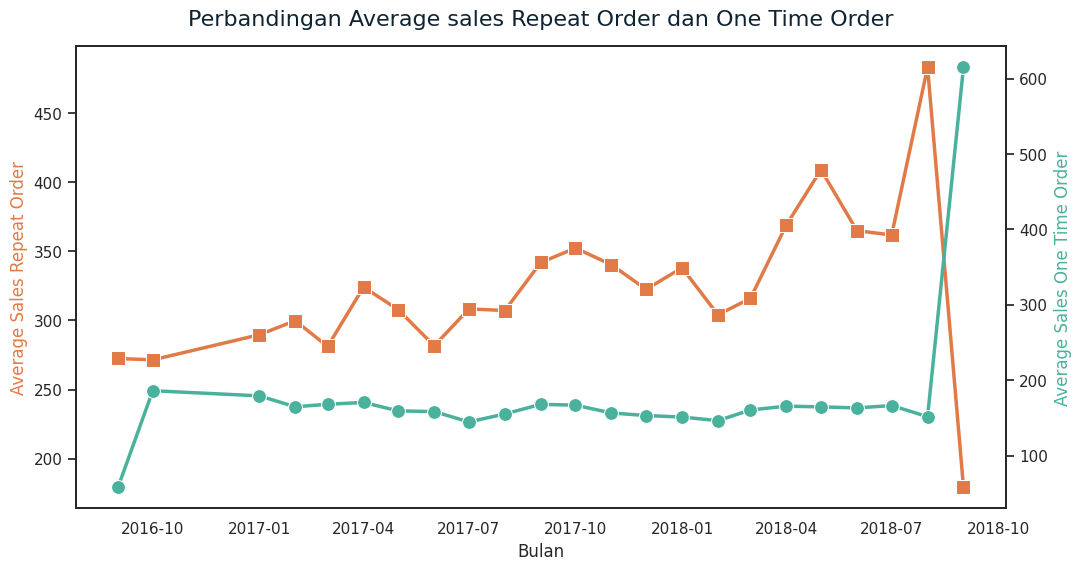

In [ ]:
# Visualisasi Perbandingan Average Sales Repeat Order dan One Time Order

sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = df_monthly_avg_sales_cust["month_year"], y = df_monthly_avg_sales_cust["average_sales_repeat_order_cust"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = df_monthly_avg_sales_cust["month_year"], y = df_monthly_avg_sales_cust["average_sales_onetime_order_cust"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('Bulan')
ax_1.set_ylabel('Average Sales Repeat Order', color='#E17A47')
ax_2.set_ylabel('Average Sales One Time Order', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Average sales Repeat Order dan One Time Order",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()

#### Yearly

In [ ]:
# yearly
import functools
dfs = [avg_sales_ro_yearly[['year', 'average_sales']],
       ot_sales_yearly[['year', 'average_sales']]]

df_yearly_avg_sales_cust = functools.reduce(lambda left, right: pd.merge(left,right,on='year'), dfs)
df_yearly_avg_sales_cust

year  average_sales_x  average_sales_y
0  2016       271.527391       185.225802
1  2017       324.609505       159.595427
2  2018       362.074158       158.675730

In [ ]:
# Rename column name
df_yearly_avg_sales_cust.rename(columns = {'average_sales_x':'average_sales_repeat_order_cust',
                                          'average_sales_y':'average_sales_onetime_order_cust'},
                               inplace = True)
df_yearly_avg_sales_cust

year  average_sales_repeat_order_cust  average_sales_onetime_order_cust
0  2016                       271.527391                        185.225802
1  2017                       324.609505                        159.595427
2  2018                       362.074158                        158.675730

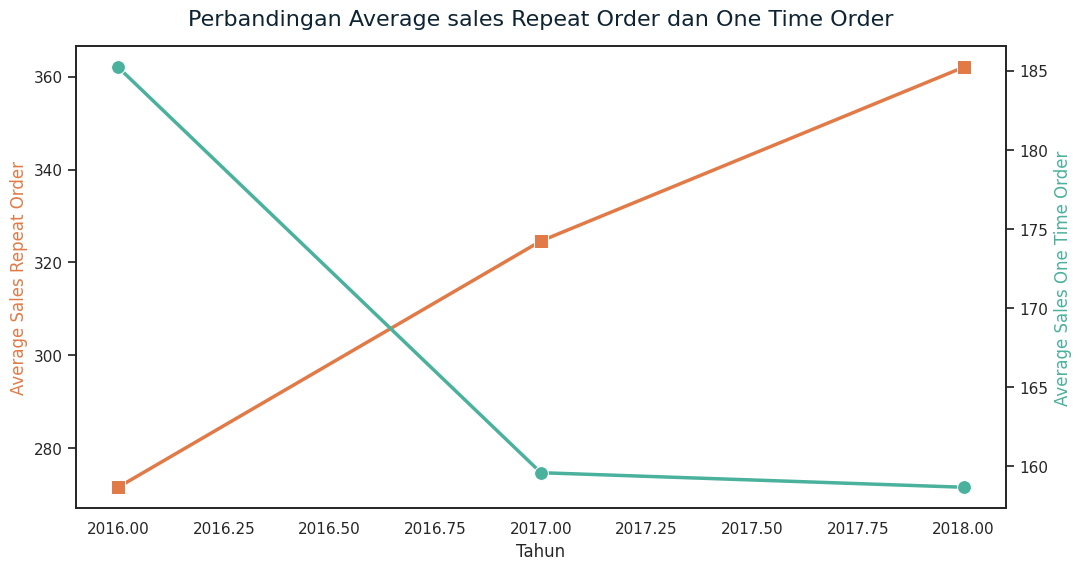

In [ ]:
# Visualisasi Perbandingan Average Sales Repeat Order dan One Time Order

sns.set(style="white")
fig, ax_1 = plt.subplots(figsize=(12, 6))
# applies twinx pada ax_2
ax_2 = ax_1.twinx()
# set ax = ax_1 untuk plot pertama
sns.lineplot(x = df_yearly_avg_sales_cust["year"], y = df_yearly_avg_sales_cust["average_sales_repeat_order_cust"], color = '#E17A47',
             ax = ax_1, lw=2.5, marker="s", markersize=10)
# set ax = ax_2 untuk plot kedua
sns.lineplot(x = df_yearly_avg_sales_cust["year"], y = df_yearly_avg_sales_cust["average_sales_onetime_order_cust"], color = '#4AB19D',
             ax = ax_2, marker='o', lw=2.5, markersize=10)
# Menambahkan judul pada axis
ax_1.set_xlabel('Tahun')
ax_1.set_ylabel('Average Sales Repeat Order', color='#E17A47')
ax_2.set_ylabel('Average Sales One Time Order', color='#4AB19D')
# Menambahkan judul Plot
ax_1.set_title(label="Perbandingan Average sales Repeat Order dan One Time Order",
             fontsize=16,
             color="#0E2433",
             pad=15)
plt.show()